In [2]:
%matplotlib inline
import seaborn as sns
from IPython.display import SVG
import operator

import json,string,re,operator,sys,math, pandas as pd,vincent
from pprint import pprint
from collections import Counter
from nltk.corpus import stopwords
from nltk import bigrams,trigrams
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
import matplotlib as mpl

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import plotly.express as px
import codecs

/home/iykeln/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# functions Sections -
    ## some functions by Marco Bonzanini (https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/)

In [3]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def add_column_for_name(df, names_list, text_column):
    """
    Add column(s) that indicates whether name(s) is/are in text_column
    Args:
        df: pandas dataframe
        names_list: list of strings (names) 
        text_column: column containing text
    Returns:
        df with column of Booleans 
    """
    for name in names_list:
        df_data[name] = df_data['text'].apply(lambda tweet: word_in_text(name, tweet))
    return df

def remove_retweets(df, column, list_of_str):
    """
    Function to remove tweets that contain string in list_of_str
    """
    for string in list_of_str:
        df = df[df['text'].str.contains(string)==False]
    return df
    
def print_val_counts_for_True(df, list_of_cols):
    """
    Print number of Trues for columns in list_of_cols in dataframe df
    """
    for name in list_of_cols:
        try:
            print(name, df[name].value_counts()[True])
        except:
            continue

def word_in_text(word, text):
    """
    Function to make text lower case and return True if a term is present, False otherwise
    """
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

def lower_text(list_text):
    """
    Make text lowercase
    """
    new_list_text = []
    for word in list_text:
        new_word = word.lower()
        new_list_text.append(new_word)
    return new_list_text

def extract_link(text):
    """
    Extracting links from tweets
    """
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

# Functions for tokenizing and preprocessing

def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase = False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

def tweet_tokenize(text):
    """
    Tokenize text
    """
    tweet_tokens = preprocess(text, lowercase = False)
    return tweet_tokens

def itertools_flatten(list_of_list):
    """
    Flatten out list of lists
    """
    from itertools import chain
    return list(chain(*list_of_list))

def most_frequent(terms_all, names_list):
    """
    Returns most frequent terms, aside from stop words. terms_all is a list with all the terms
    """
    count_all = Counter()
    full_stop = stop + names_list
    interesting_terms = [term for term in terms_all if term not in full_stop]

    # Update the counter
    count_all.update(interesting_terms)
    return count_all.most_common(20)
    
def make_col_lowercase(df, list_of_cols):
    """
    Function to get lowercase of columns in list_of_cols
    Args:
        df: pandas dataframe
        list_of_cols: list of column names (string)
    """
    for string in list_of_cols:
        df['lower_'+ string] = df[string].apply(lambda tweet: lower_text(tweet))
    return df

def is_json(my_json):
    try:
        json.loads(my_json)
    except ValueError as e:
        return False
    return True

# view top 5 tweets and selected features then break

In [4]:
br = 0
with open('./dataset/stream_Anambra.json', 'r') as f:
    for line in f:
        if br == 5:
            break
        tweet = json.loads(line)
#        print(json.dumps(tweet, indent=4))                         # pretty-print
        print(tweet['id'],tweet['user']['name'],tweet['user']['location'],tweet['user']['created_at'],
              tweet['created_at'],' '.join(preprocess(tweet['text'])))
        br += 1

930056843525246976 Oluwatomiwa Lagos, Nigeria Tue Nov 23 15:56:42 +0000 2010 Sat Nov 18 09:19:00 +0000 2017 #AnambraDecides2017 Anambra will fare bether under OSELOKA but instead of APC . . . I would rather prefer we remain with OBIANO . . . the devil I know is bether than the angel with dubious character . Anambra will never toe the path of Imo state . TUFIAKWA .
931856843525555576 Oluwatomiwa Lagos, Nigeria Tue Nov 23 15:56:42 +0000 2010 Sat Nov 18 06:13:00 +0000 2017 At the visit of @MBuhari to Ebonyi , Elechi , former Governor of Ebonyi decamped to APC from PDP Also in Anambra State , the son of Odumegwu , the founder of APGA dumped APGA for APC Baba Buhari please visit all States
931856855525246976 Oluwatomiwa Lagos, Nigeria Tue Nov 23 15:56:42 +0000 2010 Sat Nov 18 07:15:00 +0000 2017 #AnambraDecides2017 Anambra people pls go out and vote for Obaze Oseloka PDP . If you refuse to vote the election will be manipulated against you . #PDPGSFFOROBAZE Vote and Stay to ensure your votes

# filter the selected tweet features and write csv file

In [5]:
# g = codecs.open('./dataset/filtered_attributes_stream_Anambra.csv', 'w',encoding='utf-8',errors='ignore')
# with codecs.open('./dataset/stream_Anambra.json','r',encoding='utf-8',errors='ignore') as f:
#     for line in f:
#         if is_json(line) == True:
#             tweet = json.loads(line,strict=False)
            
#         tweet_id = tweet.get('id','None')
#         tweet_date = tweet.get('created_at','None')
#         query_string = 'anambra'
#         tweet_user = tweet.get('user','None')
        
#         if tweet_user != None:
#             try:
#                 loc = tweet_user['location']
#                 user = tweet_user['name']
#             except:
#                 loc = None
#                 user = None
                
#             g.write('{0}\t{1}\t{2}\t{3}\t{4}\t{5}\n'.format(tweet_id,tweet_date,query_string,loc,user, 
#                                                         ' '.join(preprocess(tweet.get('text','None')))))
#         else:
            
#             loc = None
#             user = None
            
#             g.write('{0}\t{1}\t{2}\t{3}\t{4}\t{5}\n'.format(tweet_id,tweet_date,query_string,loc,user, 
#                                                         ' '.join(preprocess(tweet.get('text','None')))))
            
# g.close()


# convert twitter data to dataframe

In [6]:
cols = ['id','date','query_string','location','user','text']
df_data = pd.read_csv("./dataset/filtered_attributes_stream_Anambra.csv",header=None, names=cols,sep='\t')
df_data.head(20)

id                            date query_string  \
0   930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1   931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2   931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3   931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4   931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   
5   931856843525888876  Sat Nov 18 11:13:00 +0000 2017      anambra   
6   931856844445246976  Sat Nov 18 11:16:00 +0000 2017      anambra   
7   931859999525246976  Sat Nov 18 11:23:00 +0000 2017      anambra   
8   931856843525211116  Sat Nov 18 11:10:00 +0000 2017      anambra   
9   931856843534436976  Sat Nov 18 09:20:00 +0000 2017      anambra   
10  931856843525246976  Sat Nov 18 12:09:19 +0000 2017      anambra   
11  931856852366843904  Sat Nov 18 12:09:21 +0000 2017      anambra   
12  931856855936176128  Sat Nov 18 12:09:22 +0000 2017      anambra   
13  931856856250646528  Sat Nov 18 12:09:22 +0000 2017      anambra   
14  931856856435306496  Sat Nov 18 12:09:22 +0000 2017      anambra   
15  931856860185071617  Sat Nov 18 12:09:23 +0000 2017      anambra   
16  931856862680637440  Sat Nov 18 12:09:23 +0000 2017      anambra   
17  931856872545636357  Sat Nov 18 12:09:26 +0000 2017      anambra   
18  931856874550497280  Sat Nov 18 12:09:26 +0000 2017      anambra   
19  931856888060358656  Sat Nov 18 12:09:29 +0000 2017      anambra   

              location                  user  \
0       Lagos, Nigeria           Oluwatomiwa   
1       Lagos, Nigeria           Oluwatomiwa   
2       Lagos, Nigeria           Oluwatomiwa   
3       Lagos, Nigeria           Oluwatomiwa   
4       Lagos, Nigeria           Oluwatomiwa   
5       Lagos, Nigeria           Oluwatomiwa   
6       Lagos, Nigeria           Oluwatomiwa   
7       Lagos, Nigeria           Oluwatomiwa   
8       Lagos, Nigeria           Oluwatomiwa   
9       Lagos, Nigeria           Oluwatomiwa   
10      Lagos, Nigeria           Oluwatomiwa   
11              Biafra    Onyemaechi Collins   
12               Lagos  Youngest Egalitarian   
13                None                Nelson   
14       Port Harcourt       Francis Nzeribe   
15                None               Chilobe   
16              Biafra    Onyemaechi Collins   
17                None        Kingsley Ngene   
18  Abakaliki, Nigeria      Confidence Nwaku   
19                None     XtremeNews9ja.com   

                                                 text  
0   #AnambraDecides2017 Anambra will fare bether u...  
1   At the visit of @MBuhari to Ebonyi , Elechi , ...  
2   #AnambraDecides2017 Anambra people pls go out ...  
3   I'm rooting for you osita chidoka today as #An...  
4   #AnambraDecides2017 Today is Anambra Gubernato...  
5   #AnambraDecides2017 APC and Apga agents seen l...  
6   They have started sharing money to voters in A...  
7   Anambra election : APC , APGA agents paying 2,...  
8   Vote and write your name in order to collect m...  
9   #AnambraElectionBoycott with #AnambraDecides20...  
10  this thing they say they are doing in Anambra ...  
11  RT @NkirukaNistoran : When IPOB told people to...  
12  RT @MobilePunch : Anambra election : No money ...  
13  RT @Amaka_Ekwo : 18 NOV 2017 - #SitAtHome in A...  
14  RT @EmekaGift : Family Writers Press Update . ...  
15  RT @NDUBUISIIKEME4 : Here is 18 th November , ...  
16  RT @NkirukaNistoran : 2 . We IPOB free million...  
17  RT @Amaka_Ekwo : 18 NOV 2017 - #SitAtHome in A...  
18  RT @nigeriantribune : Anambra poll : Voting st...  
19  Anambra Election : Party agents reportedly bri...

In [7]:
df_data['text'].describe() #percentile, mean and std of the numerical values of the Series or DataFrame

count                                                 33512
unique                                                10738
top       RT @Amaka_Ekwo : 18 NOV 2017 - #SitAtHome in A...
freq                                                   1117
Name: text, dtype: object

In [8]:
df_data['text'][3] #access tweet on position ['text'] column and row #03

"I'm rooting for you osita chidoka today as #AnambraDecides . You ran a superb , issues-based campaign and I wish you all the best today . Your success is Anambra's gain ."

# Adding columns that show whether the tweet contains a name of interest:

### add columns of Booleans that indicated whether a name was in the tweet or not.

In [9]:
names_list = ['obiano','willie','obiano willie','willie obiano','willieobiano','obianowillie',
              'obaze','oseloka','obaze oseloka','oseloka obaze','oselokaobaze','obazeoseloka',
              'nwoye','tony','nwoye tony','tony nwoye','tonynwoye','nwoyetony',
              'ezeemo','godwin','godwin ezeemo','ezeemo godwin','ezeemogodwin','godwinezeemo',
              'chidoka','osita','chidoka osita','osita chidoka','ositachidoka','chidokaosita',
              'apga','pdp','apc','ppa','udp']
add_column_for_name(df_data, names_list,'text')

id                            date query_string  \
0      930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1      931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2      931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3      931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4      931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   
...                   ...                             ...          ...   
33507  932021321252220928  Sat Nov 18 23:02:53 +0000 2017      anambra   
33508  932021326239485952  Sat Nov 18 23:02:54 +0000 2017      anambra   
33509  932021345700929536  Sat Nov 18 23:02:59 +0000 2017      anambra   
33510  932021357809930242  Sat Nov 18 23:03:02 +0000 2017      anambra   
33511  932021378852835328  Sat Nov 18 23:03:07 +0000 2017      anambra   

             location            user  \
0      Lagos, Nigeria     Oluwatomiwa   
1      Lagos, Nigeria     Oluwatomiwa   
2      Lagos, Nigeria     Oluwatomiwa   
3      Lagos, Nigeria     Oluwatomiwa   
4      Lagos, Nigeria     Oluwatomiwa   
...               ...             ...   
33507            None    Gozie Chukwu   
33508     biafra land     Melody King   
33509            None    Gozie Chukwu   
33510            None  Ifeanyi Chukwu   
33511            None        omepenny   

                                                    text  obiano  willie  \
0      #AnambraDecides2017 Anambra will fare bether u...    True   False   
1      At the visit of @MBuhari to Ebonyi , Elechi , ...   False   False   
2      #AnambraDecides2017 Anambra people pls go out ...   False   False   
3      I'm rooting for you osita chidoka today as #An...   False   False   
4      #AnambraDecides2017 Today is Anambra Gubernato...   False   False   
...                                                  ...     ...     ...   
33507  RT @gozie_chukwu : @mfpcrules @OrientalTimes @...   False   False   
33508  RT @mfpcrules : #Biafrans do not vote in Anamb...   False   False   
33509  RT @gozie_chukwu : @Amaka_Ekwo @UN @_AfricanUn...   False   False   
33510  RT @Ebuka_Mbanefo : Anambra Election : IPOB th...   False   False   
33511  RT @andybes50484929 : @antonioguterres @realDo...   False   False   

       obiano willie  willie obiano  ...  osita  chidoka osita  osita chidoka  \
0              False          False  ...  False          False          False   
1              False          False  ...  False          False          False   
2              False          False  ...  False          False          False   
3              False          False  ...   True          False           True   
4              False          False  ...  False          False          False   
...              ...            ...  ...    ...            ...            ...   
33507          False          False  ...  False          False          False   
33508          False          False  ...  False          False          False   
33509          False          False  ...  False          False          False   
33510          False          False  ...  False          False          False   
33511          False          False  ...  False          False          False   

       ositachidoka  chidokaosita   apga    pdp    apc    ppa    udp  
0             False         False  False  False   True  False  False  
1             False         False   True   True   True  False  False  
2             False         False  False   True  False  False  False  
3             False         False  False  False  False  False  False  
4             False         False  False   True  False  False  False  
...             ...           ...    ...    ...    ...    ...    ...  
33507         False         False  False  False  False  False  False  
33508         False         False  False  False  False  False  False  
33509         False         False  False  False  False  False  False  
33510         False         False  False  Fal

# filter for rows that satisfy given condition - E.g.
    ## tweets where any of these 'obiano','willie','obiano willie','willie obiano','willieobiano','obianowillie'  
    ## are mentioned will return true.
    

In [10]:
df_data['willie_obiano'] = df_data['obiano']|df_data['willie']|df_data['obiano willie']|df_data['willie obiano']|df_data['willieobiano']|df_data['obianowillie']
df_data['oseloka_obaze'] = df_data['obaze'] | df_data['oseloka'] | df_data['obaze oseloka'] | df_data['oseloka obaze'] | df_data['oselokaobaze'] | df_data['obazeoseloka']
df_data['nwoye_tony'] = df_data['nwoye'] | df_data['tony'] | df_data['nwoye tony'] | df_data['tony nwoye'] | df_data['tonynwoye'] | df_data['nwoyetony']
df_data['godwin_ezeemo'] = df_data['ezeemo'] | df_data['godwin'] | df_data['godwin ezeemo'] | df_data['ezeemo godwin'] | df_data['ezeemogodwin'] | df_data['godwinezeemo']
df_data['osita_chidoka'] = df_data['chidoka'] | df_data['osita'] | df_data['chidoka osita'] | df_data['osita chidoka'] | df_data['ositachidoka'] | df_data['chidokaosita']

df_data['willie_obiano_apga'] = df_data['obiano']|df_data['willie']|df_data['obiano willie']|df_data['willie obiano']|df_data['willieobiano']|df_data['obianowillie']|df_data['apga']
df_data['oseloka_obaze_pdp'] = df_data['obaze'] | df_data['oseloka'] | df_data['obaze oseloka'] | df_data['oseloka obaze'] | df_data['oselokaobaze'] | df_data['obazeoseloka']|df_data['pdp']
df_data['nwoye_tony_apc'] = df_data['nwoye'] | df_data['tony'] | df_data['nwoye tony'] | df_data['tony nwoye'] | df_data['tonynwoye'] | df_data['nwoyetony']|df_data['apc']
df_data['godwin_ezeemo_ppa'] = df_data['ezeemo'] | df_data['godwin'] | df_data['godwin ezeemo'] | df_data['ezeemo godwin'] | df_data['ezeemogodwin'] | df_data['godwinezeemo']|df_data['ppa']
df_data['osita_chidoka_udp'] = df_data['chidoka'] | df_data['osita'] | df_data['chidoka osita'] | df_data['osita chidoka'] | df_data['ositachidoka'] | df_data['chidokaosita']|df_data['udp']

In [11]:
df_data.head()

id                            date query_string  \
0  930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1  931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2  931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3  931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4  931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   

         location         user  \
0  Lagos, Nigeria  Oluwatomiwa   
1  Lagos, Nigeria  Oluwatomiwa   
2  Lagos, Nigeria  Oluwatomiwa   
3  Lagos, Nigeria  Oluwatomiwa   
4  Lagos, Nigeria  Oluwatomiwa   

                                                text  obiano  willie  \
0  #AnambraDecides2017 Anambra will fare bether u...    True   False   
1  At the visit of @MBuhari to Ebonyi , Elechi , ...   False   False   
2  #AnambraDecides2017 Anambra people pls go out ...   False   False   
3  I'm rooting for you osita chidoka today as #An...   False   False   
4  #AnambraDecides2017 Today is Anambra Gubernato...   False   False   

   obiano willie  willie obiano  ...  willie_obiano  oseloka_obaze  \
0          False          False  ...           True           True   
1          False          False  ...          False          False   
2          False          False  ...          False           True   
3          False          False  ...          False          False   
4          False          False  ...          False          False   

   nwoye_tony  godwin_ezeemo  osita_chidoka  willie_obiano_apga  \
0       False          False          False                True   
1       False          False          False                True   
2       False          False          False               False   
3       False          False           True               False   
4       False          False          False               False   

   oseloka_obaze_pdp  nwoye_tony_apc  godwin_ezeemo_ppa  osita_chidoka_udp  
0               True            True              False              False  
1               True            True              False              False  
2               True           False              False              False  
3              False           False              False               True  
4               True           False              False              False  

[5 rows x 51 columns]

# Count number of Trues for columns in list_of_cols

In [12]:
list_of_cols = ['obiano','willie','obiano willie','willie obiano','willieobiano','obianowillie',
              'obaze','oseloka','obaze oseloka','oseloka obaze','oselokaobaze','obazeoseloka',
              'nwoye','tony','nwoye tony','tony nwoye','tonynwoye','nwoyetony',
              'ezeemo','godwin','godwin ezeemo','ezeemo godwin','ezeemogodwin','godwinezeemo',
              'chidoka','osita','chidoka osita','osita chidoka','ositachidoka','chidokaosita', 
               'willie_obiano','oseloka_obaze','nwoye_tony','godwin_ezeemo','osita_chidoka',
               'apga','pdp','apc','ppa','udp','willie_obiano_apga','oseloka_obaze_pdp','nwoye_tony_apc',
                'godwin_ezeemo_ppa','osita_chidoka_udp']
print_val_counts_for_True(df_data, list_of_cols)


obiano 1037
willie 224
willie obiano 131
willieobiano 1
obaze 229
oseloka 136
obaze oseloka 11
oseloka obaze 79
nwoye 483
tony 363
tony nwoye 237
ezeemo 116
godwin 13
godwin ezeemo 11
chidoka 249
osita 123
osita chidoka 27
willie_obiano 1057
oseloka_obaze 251
nwoye_tony 602
godwin_ezeemo 118
osita_chidoka 278
apga 1733
pdp 1138
apc 1986
ppa 94
udp 2
willie_obiano_apga 2549
oseloka_obaze_pdp 1263
nwoye_tony_apc 2470
godwin_ezeemo_ppa 160
osita_chidoka_udp 280


In [13]:
df_data.shape

(33512, 51)

# Some cleanup: removing retweets:

In [14]:
# Return df with duplicates removed. By default this keeps the first occurrence only.
unique_tweets = df_data.drop_duplicates(inplace=False, subset='text')

len(unique_tweets)

10738

In [15]:
unique_tweets = unique_tweets.drop(['obiano','willie','obiano willie','willie obiano','willieobiano','obianowillie',
              'obaze','oseloka','obaze oseloka','oseloka obaze','oselokaobaze','obazeoseloka',
              'nwoye','tony','nwoye tony','tony nwoye','tonynwoye','nwoyetony',
              'ezeemo','godwin','godwin ezeemo','ezeemo godwin','ezeemogodwin','godwinezeemo',
              'chidoka','osita','chidoka osita','osita chidoka','ositachidoka','chidokaosita'], axis=1)

In [16]:
# Remove retweets
list_of_str = ['RT', 'rt', ' RT ']
originals = remove_retweets(unique_tweets, 'text', list_of_str)
originals = originals.reset_index(drop = True)

In [17]:
wov = []
for v in originals.willie_obiano:
    if v == True:
        wov.append(1)
    else: wov.append(0)

oov = []
for v in originals.oseloka_obaze:
    if v == True:
        oov.append(1)
    else: oov.append(0)

ntv = []
for v in originals.nwoye_tony:
    if v == True:
        ntv.append(1)
    else: ntv.append(0)

gev = []
for v in originals.godwin_ezeemo:
    if v == True:
        gev.append(1)
    else: gev.append(0)

ocv = []
for v in originals.osita_chidoka:
    if v == True:
        ocv.append(1)
    else: ocv.append(0)

In [18]:
originals['wov'] = wov
originals['oov'] = oov
originals['ntv'] = ntv
originals['gev'] = gev
originals['ocv'] = ocv

In [19]:
originals.head()

id                            date query_string  \
0  930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1  931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2  931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3  931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4  931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   

         location         user  \
0  Lagos, Nigeria  Oluwatomiwa   
1  Lagos, Nigeria  Oluwatomiwa   
2  Lagos, Nigeria  Oluwatomiwa   
3  Lagos, Nigeria  Oluwatomiwa   
4  Lagos, Nigeria  Oluwatomiwa   

                                                text   apga    pdp    apc  \
0  #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1  At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2  #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
3  I'm rooting for you osita chidoka today as #An...  False  False  False   
4  #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   

     ppa  ...  willie_obiano_apga  oseloka_obaze_pdp  nwoye_tony_apc  \
0  False  ...                True               True            True   
1  False  ...                True               True            True   
2  False  ...               False               True           False   
3  False  ...               False              False           False   
4  False  ...               False               True           False   

   godwin_ezeemo_ppa  osita_chidoka_udp  wov  oov  ntv  gev  ocv  
0              False              False    1    1    0    0    0  
1              False              False    0    0    0    0    0  
2              False              False    0    1    0    0    0  
3              False               True    0    0    0    0    1  
4              False              False    0    0    0    0    0  

[5 rows x 26 columns]

In [20]:
originals.shape

(7438, 26)

# some exploratory analysis

# Counting names:

In [21]:
# Count number of Trues for columns in list_of_cols
list_of_cols = ['willie_obiano','oseloka_obaze','nwoye_tony','godwin_ezeemo','osita_chidoka',
               'apga','pdp','apc','ppa','udp','willie_obiano_apga','oseloka_obaze_pdp','nwoye_tony_apc',
                'godwin_ezeemo_ppa','osita_chidoka_udp']
print_val_counts_for_True(originals, list_of_cols)

willie_obiano 536
oseloka_obaze 149
nwoye_tony 235
godwin_ezeemo 77
osita_chidoka 119
apga 672
pdp 416
apc 399
ppa 39
udp 2
willie_obiano_apga 1084
oseloka_obaze_pdp 494
nwoye_tony_apc 582
godwin_ezeemo_ppa 92
osita_chidoka_udp 121


# Extract links:

##### Note: I added columns that indicated whether the tweet contained only one name and not the others (for example, just “obiano” and not “willie” or “obaeze” or “ezeemo”) as well as columns that indicated whether a name was present or not, regardless of whether other names were there.

In [22]:
originals['link'] = originals['text'].apply(extract_link)

In [23]:
# Getting value counts for names
list_of_cols = ['willie_obiano','oseloka_obaze','nwoye_tony','godwin_ezeemo','osita_chidoka',
               'apga','pdp','apc','ppa','udp','willie_obiano_apga','oseloka_obaze_pdp','nwoye_tony_apc',
                'godwin_ezeemo_ppa','osita_chidoka_udp']
print_val_counts_for_True(originals, list_of_cols)

willie_obiano 536
oseloka_obaze 149
nwoye_tony 235
godwin_ezeemo 77
osita_chidoka 119
apga 672
pdp 416
apc 399
ppa 39
udp 2
willie_obiano_apga 1084
oseloka_obaze_pdp 494
nwoye_tony_apc 582
godwin_ezeemo_ppa 92
osita_chidoka_udp 121


# A plot for counts for names of interest:

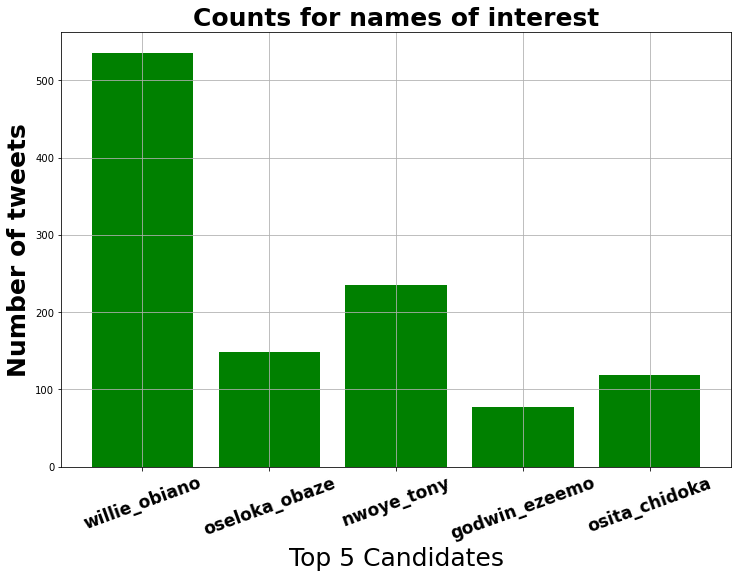

In [24]:
names = ['willie_obiano','oseloka_obaze','nwoye_tony','godwin_ezeemo','osita_chidoka']
tweets_by_name = [originals['willie_obiano'].value_counts()[True], 
                  originals['oseloka_obaze'].value_counts()[True], 
                  originals['nwoye_tony'].value_counts()[True], 
                  originals['godwin_ezeemo'].value_counts()[True],
                  originals['osita_chidoka'].value_counts()[True]]
x_pos = list(range(len(names)))
width = 0.8
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(x_pos, tweets_by_name, width, alpha=1, color='g')
ax.set_ylabel('Number of tweets', fontsize=25, fontweight='bold')
ax.set_title('Counts for names of interest', fontsize=25, fontweight='bold')
ax.set_xticks([p + 0.0 * width for p in x_pos])
ax.set_xticklabels(names,fontsize=17,fontweight='bold',rotation=20)
ax.set_xlabel('Top 5 Candidates',fontsize=25)
plt.grid()
plt.savefig('./computed_images/tweet_by_name_1.png', format='png')

# A plot on the parties of interest

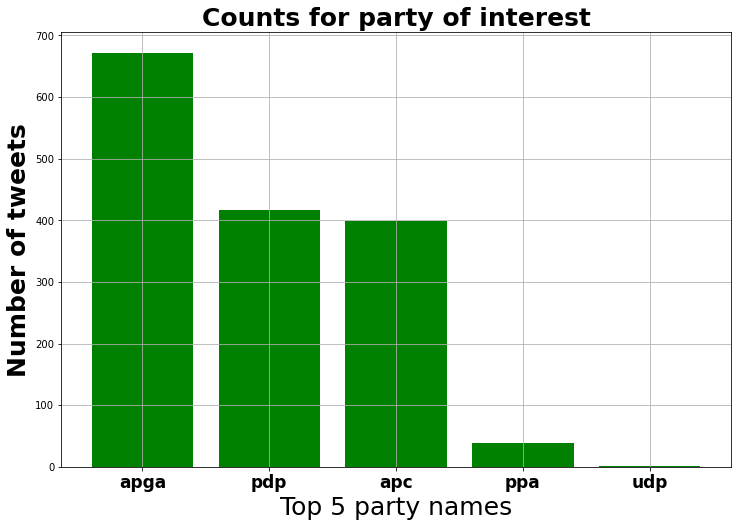

In [25]:
names = ['apga','pdp','apc','ppa','udp']
tweets_by_name = [originals['apga'].value_counts()[True], 
                  originals['pdp'].value_counts()[True], 
                  originals['apc'].value_counts()[True], 
                  originals['ppa'].value_counts()[True],
                  originals['udp'].value_counts()[True]]
x_pos = list(range(len(names)))
width = 0.8
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(x_pos, tweets_by_name, width, alpha=1, color='g')
ax.set_ylabel('Number of tweets', fontsize=25, fontweight='bold')
ax.set_title('Counts for party of interest', fontsize=25, fontweight='bold')
ax.set_xticks([p + 0.0 * width for p in x_pos])
ax.set_xticklabels(names,fontsize=17,fontweight='bold',rotation=0)
ax.set_xlabel('Top 5 party names',fontsize=25)
plt.grid()
plt.savefig('./computed_images/tweet_by_party_1.png', format='png')

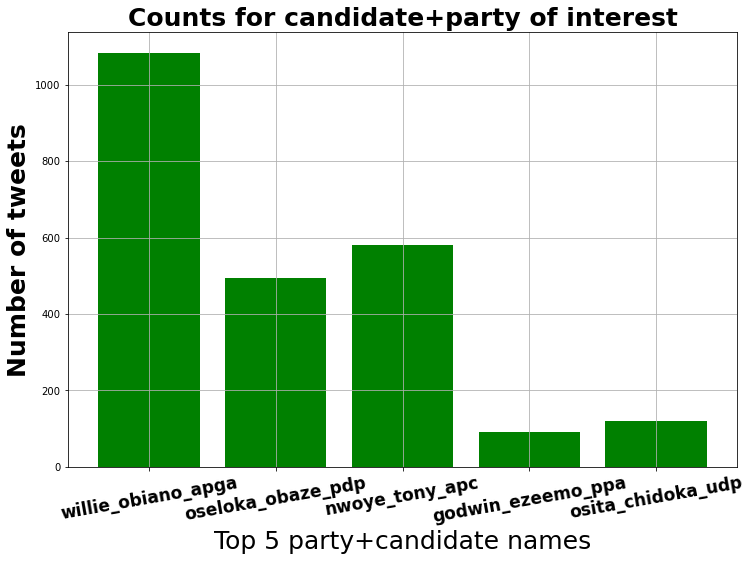

In [29]:
names = ['willie_obiano_apga','oseloka_obaze_pdp','nwoye_tony_apc','godwin_ezeemo_ppa','osita_chidoka_udp']
tweets_by_name = [originals['willie_obiano_apga'].value_counts()[True], 
                  originals['oseloka_obaze_pdp'].value_counts()[True], 
                  originals['nwoye_tony_apc'].value_counts()[True], 
                  originals['godwin_ezeemo_ppa'].value_counts()[True],
                  originals['osita_chidoka_udp'].value_counts()[True]]
x_pos = list(range(len(names)))
width = 0.8
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(x_pos, tweets_by_name, width, alpha=1, color='g')
ax.set_ylabel('Number of tweets', fontsize=25, fontweight='bold')
ax.set_title('Counts for candidate+party of interest', fontsize=25, fontweight='bold')
ax.set_xticks([p + 0.0 * width for p in x_pos])
ax.set_xticklabels(names,fontsize=17,fontweight='bold',rotation=10)
ax.set_xlabel('Top 5 party+candidate names', fontsize=25)
plt.grid()
plt.savefig('./computed_images/tweet_by_party_451.png', format='png')

# Tweets by locations

In [30]:
# names = list(originals['location'][:10])
# tweets_by_loc_counts = originals['location'].value_counts() #get the counts for the lang column
# x_pos = list(range(len(names)))
# width = 0.8
# fig, ax = plt.subplots(figsize=(15, 10))
# plt.bar(x_pos, tweets_by_loc_counts[:10], width, alpha=1, color='g')
# ax.set_ylabel('Number of tweets', fontsize=15)
# ax.set_title('Counts for names of interest', fontsize=15, fontweight='bold')
# ax.set_xticks([p + 0.4 * width for p in x_pos])
# ax.set_xticklabels(names)
# plt.grid()
# plt.savefig('./computed_images/tweet_by_loc_1', format='png')

## Adding columns for tokens for cal Most frequent words associated with candidates

In [31]:
# Add column of tokenized tweets
originals['tweet_tokens'] = originals['text'].apply(lambda tweet: tweet_tokenize(tweet))


In [32]:
originals['tweet_tokens'].head()

0    [#AnambraDecides2017, Anambra, will, fare, bet...
1    [At, the, visit, of, @MBuhari, to, Ebonyi, ,, ...
2    [#AnambraDecides2017, Anambra, people, pls, go...
3    [I'm, rooting, for, you, osita, chidoka, today...
4    [#AnambraDecides2017, Today, is, Anambra, Gube...
Name: tweet_tokens, dtype: object

# only contestants names

In [33]:
# Adding a column for the tokens and also selecting for just the English ones
originals['just_obiano_tokens'] = np.where((originals['willie_obiano'] ==True),originals['tweet_tokens'], '')
originals['just_obaze_tokens'] = np.where((originals['oseloka_obaze'] ==True), originals['tweet_tokens'], '')
originals['just_nwoye_tokens'] = np.where((originals['nwoye_tony'] ==True), originals['tweet_tokens'], '')
originals['just_ezeemo_tokens'] = np.where((originals['godwin_ezeemo'] ==True), originals['tweet_tokens'], '')
originals['just_chidoka_tokens'] = np.where((originals['osita_chidoka'] ==True), originals['tweet_tokens'], '')

In [34]:
text_obiano = " ".join(" ".join(t) for t in originals.just_obiano_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_obiano)))

text_obaze = " ".join(" ".join(t) for t in originals.just_obaze_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_obaze)))

text_nwoye = " ".join(" ".join(t) for t in originals.just_nwoye_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_nwoye)))

text_ezeemo = " ".join(" ".join(t) for t in originals.just_ezeemo_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_ezeemo)))

text_chidioka = " ".join(" ".join(t) for t in originals.just_chidoka_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_chidioka)))

There are 69012 words in the combination of all tweets.
There are 25102 words in the combination of all tweets.
There are 35885 words in the combination of all tweets.
There are 16239 words in the combination of all tweets.
There are 21428 words in the combination of all tweets.


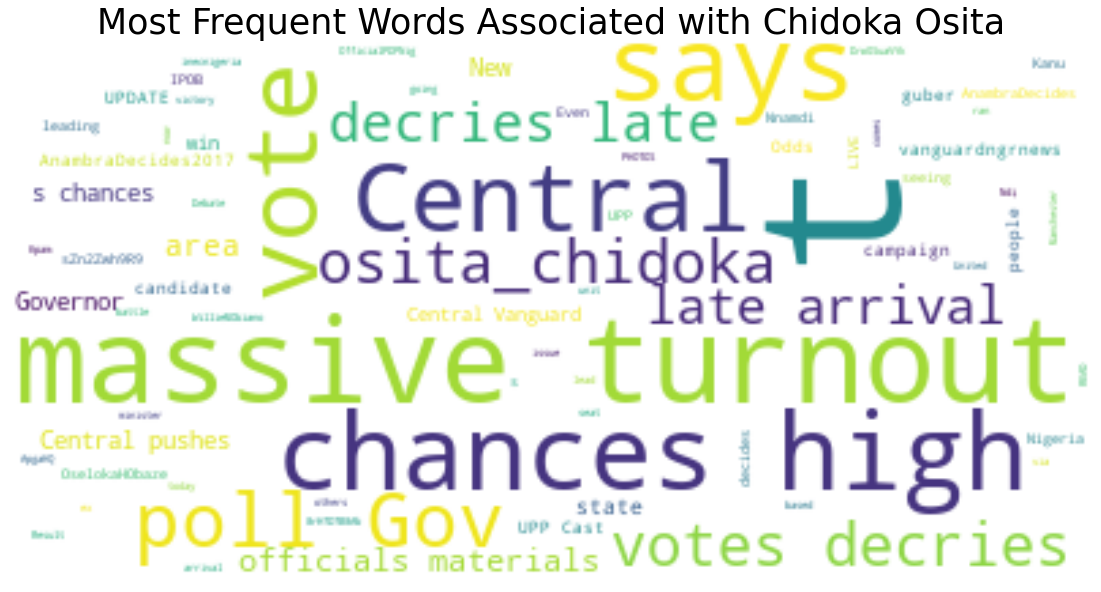

In [35]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "co",'will','anambra','election','nwoye','tony','obiano','willie','obaze','oseloka',
                 'godwin','ezeemo','chidoka','osita','apga','apc','pdp','ppa','udp','chidoka_osita'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_chidioka)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.title("Most Frequent Words Associated with Chidoka Osita", fontsize=35)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# contestants names plus party name

In [36]:
# Adding a column for the tokens and also selecting for just the English ones
originals['obiano_apga_tokens'] = np.where((originals['willie_obiano_apga'] ==True),originals['tweet_tokens'], '')
originals['obaze_pdp_tokens'] = np.where((originals['oseloka_obaze_pdp'] ==True), originals['tweet_tokens'], '')
originals['nwoye_apc_tokens'] = np.where((originals['nwoye_tony_apc'] ==True), originals['tweet_tokens'], '')
originals['ezeemo_ppa_tokens'] = np.where((originals['godwin_ezeemo_ppa'] ==True), originals['tweet_tokens'], '')
originals['chidoka_udp_tokens'] = np.where((originals['osita_chidoka_udp'] ==True), originals['tweet_tokens'], '')

In [37]:
text_obiano_apga = " ".join(" ".join(t) for t in originals.obiano_apga_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_obiano_apga)))

text_obaze_pdp = " ".join(" ".join(t) for t in originals.obaze_pdp_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_obaze_pdp)))

text_nwoye_apc = " ".join(" ".join(t) for t in originals.nwoye_apc_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_nwoye_apc)))

text_ezeemo_ppa = " ".join(" ".join(t) for t in originals.ezeemo_ppa_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_ezeemo_ppa)))

text_chidoka_udp = " ".join(" ".join(t) for t in originals.chidoka_udp_tokens)
print ("There are {} words in the combination of all tweets.".format(len(text_chidoka_udp)))

There are 129440 words in the combination of all tweets.
There are 64203 words in the combination of all tweets.
There are 75799 words in the combination of all tweets.
There are 18146 words in the combination of all tweets.
There are 21658 words in the combination of all tweets.


In [38]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "co",'will','anambra','election','nwoye','tony','obiano','willie','obaze','oseloka',
                 'godwin','ezeemo','chidoka','osita','apga','apc','pdp','ppa','udp','peter','obi','chidoka_osita'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_nwoye_apc)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.title("Most Frequent Words Associated with Chidoka Osita Cum his Party UDP", fontsize=35)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Part 2- Sentiment Analysis of Tweets

In [39]:
%matplotlib inline 
import chart_studio.plotly as py
import plotly.tools as tls
#from ggplot import *

import nltk
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import sys
# sys.path.append('../MLRecipes')
#import ml_helper as mlhelp
import pickle
import random
from textblob import TextBlob

from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk import sent_tokenize, word_tokenize, pos_tag

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# TextBlob

In [40]:
def find_pol(text):  
    return TextBlob(text).sentiment.polarity

def clean_tweet2(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [41]:
def find_subj(text):
    return TextBlob(text).sentiment.subjectivity

In [42]:
#del originals['Sentiment_polarity']
#del originals['Sentiment_subjectivity']

In [43]:
originals['Sentiment_Polarity'] = originals['text'].apply(find_pol)

In [44]:
originals['Sentiment_Subjectivity'] = originals['text'].apply(find_subj)

In [45]:
senti_vals = []
subj_vals = []
for text in originals.text:
    if TextBlob(text).sentiment.polarity > 0:
        senti_vals.append(2)
    elif TextBlob(text).sentiment.polarity < 0:
        senti_vals.append(1)
    else:
        senti_vals.append(0)
    
    if TextBlob(text).sentiment.subjectivity > 0:
        subj_vals.append(2)
    else:
        subj_vals.append(0)

In [64]:
originals['Sentiment_Polarity_Vals'] = senti_vals

In [65]:
originals['Sentiment_Subjectivity_Vals'] = subj_vals

# sentiwordnet as swn

In [66]:
lemmatizer = WordNetLemmatizer()
 
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
 
def clean_text(text):
    text = text.replace("<br />", " ")
#     text = text.decode("utf-8")
 
    return text
 
def swn_polarity(text):
    """
    Return a sentiment polarity: 0 = negative, 1 = positive
    """
 
    sentiment = 0.0
    tokens_count = 0
 
    text = clean_text(text)
 
 
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        
#         print(tagged_sentence)
        
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
 
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
 
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
 
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
        
#         return sentiment
 
    # judgment call ? Default to positive or negative
    if not tokens_count:
        return 0,sentiment
 
    # sum greater than 0 => positive sentiment
    if sentiment > 0:
        return 2,sentiment
    
    if sentiment == 0:
        return 0,sentiment
 
    # negative sentiment
    return 1,sentiment

In [67]:
print(swn_polarity('#WeJustHeard Anambra election : Drama as corps members demand feeding allowance before work'))

(0, 0.0)


In [68]:
# Since we're shuffling, you'll get diffrent results
senti_vals_wordnet = []
tweetlist = originals['text']
for tweet in tweetlist:
    sc = swn_polarity(tweet)
    
    senti_vals_wordnet.append(sc)

In [69]:
sc,pol = zip(*senti_vals_wordnet)

In [70]:
len(sc)

7438

In [71]:
originals['sc_sentiwordnet'] = sc
originals['pol_sentiwordnet'] = pol

In [72]:
originals.head()

id                            date query_string  \
0  930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1  931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2  931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3  931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4  931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   

         location         user  \
0  Lagos, Nigeria  Oluwatomiwa   
1  Lagos, Nigeria  Oluwatomiwa   
2  Lagos, Nigeria  Oluwatomiwa   
3  Lagos, Nigeria  Oluwatomiwa   
4  Lagos, Nigeria  Oluwatomiwa   

                                                text   apga    pdp    apc  \
0  #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1  At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2  #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
3  I'm rooting for you osita chidoka today as #An...  False  False  False   
4  #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   

     ppa  ...                                   obaze_pdp_tokens  \
0  False  ...  [#AnambraDecides2017, Anambra, will, fare, bet...   
1  False  ...  [At, the, visit, of, @MBuhari, to, Ebonyi, ,, ...   
2  False  ...  [#AnambraDecides2017, Anambra, people, pls, go...   
3  False  ...                                                      
4  False  ...  [#AnambraDecides2017, Today, is, Anambra, Gube...   

                                    nwoye_apc_tokens  ezeemo_ppa_tokens  \
0  [#AnambraDecides2017, Anambra, will, fare, bet...                      
1  [At, the, visit, of, @MBuhari, to, Ebonyi, ,, ...                      
2                                                                         
3                                                                         
4                                                                         

                                  chidoka_udp_tokens  Sentiment_Polarity  \
0                                                               0.000000   
1                                                               0.000000   
2                                                               0.000000   
3  [I'm, rooting, for, you, osita, chidoka, today...            0.766667   
4                                                               0.187500   

   Sentiment_Subjectivity  Sentiment_Polarity_Vals  \
0                0.000000                        0   
1                0.000000                        0   
2                0.000000                        0   
3                0.433333                        2   
4                0.437500                        2   

   Sentiment_Subjectivity_Vals  sc_sentiwordnet  pol_sentiwordnet  
0                            0                1            -1.000  
1                            0                1            -0.250  
2                            0                2             0.375  
3                            2                2             1.125  
4                            2                2             0.375  

[5 rows x 44 columns]

In [73]:
tblob_neu = (originals[originals['Sentiment_Polarity_Vals'] == 0].shape[0]/originals.shape[0])*100
tblob_neg = (originals[originals['Sentiment_Polarity_Vals'] == 1].shape[0]/originals.shape[0])*100
tblob_pos = (originals[originals['Sentiment_Polarity_Vals'] == 2].shape[0]/originals.shape[0])*100

print('tblob neu: ', originals[originals['Sentiment_Polarity_Vals'] == 0].shape[0],tblob_neu)
print('tblob neg: ', originals[originals['Sentiment_Polarity_Vals'] == 1].shape[0],tblob_neg)
print('tblob pos: ', originals[originals['Sentiment_Polarity_Vals'] == 2].shape[0],tblob_pos)

tblob neu:  3977 53.46867437483195
tblob neg:  1012 13.605808012906696
tblob pos:  2449 32.92551761226136


In [76]:
sentiwordnet_neu = (originals[originals['sc_sentiwordnet'] == 0].shape[0]/originals.shape[0])*100
sentiwordnet_neg = (originals[originals['sc_sentiwordnet'] == 1].shape[0]/originals.shape[0])*100
sentiwordnet_pos = (originals[originals['sc_sentiwordnet'] == 2].shape[0]/originals.shape[0])*100

print('sentiwordnet neu: ', originals[originals['sc_sentiwordnet'] == 0].shape[0],sentiwordnet_neu)
print('sentiwordnet neg: ', originals[originals['sc_sentiwordnet'] == 1].shape[0],sentiwordnet_neg)
print('sentiwordnet pos: ', originals[originals['sc_sentiwordnet'] == 2].shape[0],sentiwordnet_pos)

sentiwordnet neu:  3085 41.476203280451735
sentiwordnet neg:  1431 19.23904275342834
sentiwordnet pos:  2922 39.28475396611992


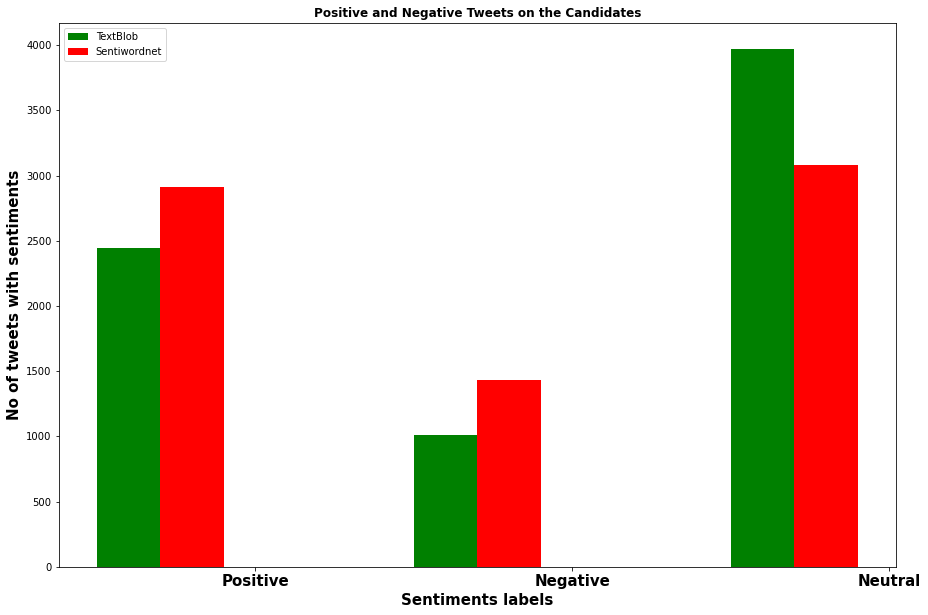

In [80]:
x=['Positive','Negative','Neutral']
ind=np.arange(len(x))
tb = [2447,1012,3971]
sw = [2916,1429,3085]
# vd = [2346,2252,2832]

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Positive and Negative Tweets on the Candidates", fontsize=12, fontweight='bold')
ax=plt.subplot(111)
ax.bar(ind-.4, tb, width=.2, color='g', align='center', label='TextBlob')
ax.bar(ind-.2, sw, width=.2, color='r', align='center', label='Sentiwordnet')
# ax.bar(ind, vd, width=.2, color='m', align='center', label='Vader')

# ax.set_xticks([p + 0.0 * width for p in ind])
ax.set_xticks(ind)
ax.set_xticklabels(x,fontsize=15,fontweight='bold',rotation=0)
ax.set_xlabel('Sentiments labels', fontsize=15, fontweight='bold')
ax.set_ylabel('No of tweets with sentiments', fontsize=15, fontweight='bold')
ax.legend(loc='best')

In [81]:
sns.distplot(originals['Sentiment_Polarity'])

/home/iykeln/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sentiment_Polarity', ylabel='Density'>

# Counts for names of interest in the positve tweets

In [103]:
pos_df = originals[originals.Sentiment_Polarity_Vals == 2]
pos_df.head(10)

id                            date query_string  \
3   931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4   931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   
9   931856900764897280  Sat Nov 18 12:09:32 +0000 2017      anambra   
12  931856960269537280  Sat Nov 18 12:09:47 +0000 2017      anambra   
13  931856960978325504  Sat Nov 18 12:09:47 +0000 2017      anambra   
17  931857130348535808  Sat Nov 18 12:10:27 +0000 2017      anambra   
38  931857343658319872  Sat Nov 18 12:11:18 +0000 2017      anambra   
43  931857536923394049  Sat Nov 18 12:12:04 +0000 2017      anambra   
44  931857580175093760  Sat Nov 18 12:12:14 +0000 2017      anambra   
54  931857908027002881  Sat Nov 18 12:13:33 +0000 2017      anambra   

                          location                 user  \
3                   Lagos, Nigeria          Oluwatomiwa   
4                   Lagos, Nigeria          Oluwatomiwa   
9                           Biafra       Biafra My Home   
12                            None       Chinedu Onyeka   
13                         Nigeria         Hisprideblog   
17                            None          Uwem Inyang   
38                    Owerri(FUTO)  Chukwuemeka Igbokwe   
43                Lagos,Nigeria 🇳🇬       Nikki Patricia   
44                 Ibadan, Nigeria   Nwachukwu Egbunike   
54  emmanuelokogba@vanguardngr.com      Okogba Emmanuel   

                                                 text   apga    pdp    apc  \
3   I'm rooting for you osita chidoka today as #An...  False  False  False   
4   #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   
9   Osumoghu Ihiala , Anambra , BIAFRA . Biafrans ...  False  False  False   
12  @Breakingpost_ng How many re they there ? How ...  False  False  False   
13  #hisprideblog Large Turnout as Anambra Voters ...  False  False  False   
17  Good luck to Anambra peeps . May the best man ...  False  False  False   
38  Large Turnout as Anambra Voters Defy IPOB Thre...  False  False  False   
43  @julietkego @obyezeks I'm proud of Anambra rig...  False  False  False   
44  Who is Ojukwu's son ? Even Emeka Odimegwu Ojuk...  False  False  False   
54  Anambra Election : Deputy Gov Nkem Okeke votes...  False  False  False   

      ppa  ...                                   obaze_pdp_tokens  \
3   False  ...                                                      
4   False  ...  [#AnambraDecides2017, Today, is, Anambra, Gube...   
9   False  ...                                                      
12  False  ...                                                      
13  False  ...                                                      
17  False  ...                                                      
38  False  ...                                                      
43  False  ...                                                      
44  False  ...                                                      
54  False  ...                                                      

    nwoye_apc_tokens  ezeemo_ppa_tokens  \
3                                         
4                                         
9                                         
12                                        
13                                        
17                                        
38                                        
43                                        
44                                        
54                                        

                                   chidoka_udp_tokens  Sentiment_Polarity  \
3   [I'm, rooting, for, you, osita, chidoka, today...            0.766667   
4                                                                0.187500   
9                                                                0.400000   
12                                                               0.416667   
13                                                               0.214286   
17                               

# Counts for names of interest in the negatives tweets

In [104]:
neg_df = originals[originals.Sentiment_Polarity_Vals == 1]
neg_df.head(10)

id                            date query_string  \
18  931857140326846464  Sat Nov 18 12:10:29 +0000 2017      anambra   
23  931857260753702912  Sat Nov 18 12:10:58 +0000 2017      anambra   
33  931857325371068416  Sat Nov 18 12:11:14 +0000 2017      anambra   
52  931857829715173376  Sat Nov 18 12:13:14 +0000 2017      anambra   
53  931857863722618880  Sat Nov 18 12:13:22 +0000 2017      anambra   
68  931858160972840960  Sat Nov 18 12:14:33 +0000 2017      anambra   
75  931858296851529733  Sat Nov 18 12:15:05 +0000 2017      anambra   
82  931858473628913665  Sat Nov 18 12:15:47 +0000 2017      anambra   
83  931858520823169025  Sat Nov 18 12:15:59 +0000 2017      anambra   
87  931858694836547584  Sat Nov 18 12:16:40 +0000 2017      anambra   

          location                 user  \
18            None               Obinna   
23         Nigeria            9jaherald   
33            None              Chilobe   
52             UAE   prince iyke prince   
53            None     It is I, LeClerc   
68  Lagos, Nigeria        Smash9ja_Ents   
75  Abuja, Nigeria              Markson   
82            None    Abdul-Salam Tukur   
83           Lagos          Chinex Obue   
87      World-Wide  BlogMallNigeria.Com   

                                                 text   apga    pdp    apc  \
18  Apc is allegedly sharing food and money 💰 to v...  False  False   True   
23  Anambra Election : Corp members fail to work w...  False  False  False   
33  UPDATE : OTUOCHA FORCED AND THREATENED TO VOTE...   True  False  False   
52  Video update of #AnambraElectionBoycott As Ana...  False  False  False   
53  Yup . Thank God for little mercies . https://t...  False  False  False   
68  Anambra Election : Youths Use Voter ’ s Card t...  False  False  False   
75  Niger Bridge Blocked Due To Anambra Election (...  False  False  False   
82  Bett y @inecnigeria ? Haba mana . . . Seriousl...  False  False  False   
83  When will this nonsense stop , how long are we...  False  False  False   
87  10 Things To Know About Anambra Election - The...  False  False  False   

      ppa  ...  obaze_pdp_tokens  \
18  False  ...                     
23  False  ...                     
33  False  ...                     
52  False  ...                     
53  False  ...                     
68  False  ...                     
75  False  ...                     
82  False  ...                     
83  False  ...                     
87  False  ...                     

                                     nwoye_apc_tokens  ezeemo_ppa_tokens  \
18  [Apc, is, allegedly, sharing, food, and, money...                      
23                                                                         
33                                                                         
52                                                                         
53                                                                         
68                                                                         
75                                                                         
82                                                                         
83                                                                         
87                                                                         

    chidoka_udp_tokens  Sentiment_Polarity  Sentiment_Subjectivity  \
18                               -0.200000                0.322222   
23                               -0.500000                0.300000   
33                               -0.150000                0.250000   
52                               -0.155556                0.288889   
53                               -0.187500                0.500000   
68                               -0.600000                1.000000   
75                               -0.125000                0.375000   
82                               -0.333333                0.666667   
83                               -0.05000

# Counts for names of interest in the neutral tweets

In [105]:
neu_df = originals[originals.Sentiment_Polarity_Vals == 0]
neu_df.head(10)

id                            date query_string  \
0   930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1   931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2   931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
5   931856843525888876  Sat Nov 18 11:13:00 +0000 2017      anambra   
6   931859999525246976  Sat Nov 18 11:23:00 +0000 2017      anambra   
7   931856843525211116  Sat Nov 18 11:10:00 +0000 2017      anambra   
8   931856843525246976  Sat Nov 18 12:09:19 +0000 2017      anambra   
10  931856909191262208  Sat Nov 18 12:09:34 +0000 2017      anambra   
11  931856949154545664  Sat Nov 18 12:09:44 +0000 2017      anambra   
14  931857069434601472  Sat Nov 18 12:10:13 +0000 2017      anambra   

          location           user  \
0   Lagos, Nigeria    Oluwatomiwa   
1   Lagos, Nigeria    Oluwatomiwa   
2   Lagos, Nigeria    Oluwatomiwa   
5   Lagos, Nigeria    Oluwatomiwa   
6   Lagos, Nigeria    Oluwatomiwa   
7   Lagos, Nigeria    Oluwatomiwa   
8   Lagos, Nigeria    Oluwatomiwa   
10           Lagos  AKEWULA BELLO   
11            None      GurusVevo   
14        Universe        Oscrape   

                                                 text   apga    pdp    apc  \
0   #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1   At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2   #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
5   #AnambraDecides2017 APC and Apga agents seen l...   True  False   True   
6   Anambra election : APC , APGA agents paying 2,...   True   True   True   
7   Vote and write your name in order to collect m...   True  False   True   
8   this thing they say they are doing in Anambra ...  False  False  False   
10             Unlike GEJ era https://t.co/zgU4Id9WH9  False  False  False   
11  Anambra Election : “ Vote & amp ; Die ” Charms...  False  False  False   
14  Anambra election litmus test for INEC , APC sa...  False   True   True   

      ppa  ...                                   obaze_pdp_tokens  \
0   False  ...  [#AnambraDecides2017, Anambra, will, fare, bet...   
1   False  ...  [At, the, visit, of, @MBuhari, to, Ebonyi, ,, ...   
2   False  ...  [#AnambraDecides2017, Anambra, people, pls, go...   
5   False  ...                                                      
6   False  ...  [Anambra, election, :, APC, ,, APGA, agents, p...   
7   False  ...                                                      
8   False  ...                                                      
10  False  ...                                                      
11  False  ...                                                      
14  False  ...  [Anambra, election, litmus, test, for, INEC, ,...   

                                     nwoye_apc_tokens  ezeemo_ppa_tokens  \
0   [#AnambraDecides2017, Anambra, will, fare, bet...                      
1   [At, the, visit, of, @MBuhari, to, Ebonyi, ,, ...                      
2                                                                          
5   [#AnambraDecides2017, APC, and, Apga, agents, ...                      
6   [Anambra, election, :, APC, ,, APGA, agents, p...                      
7   [Vote, and, write, your, name, in, order, to, ...                      
8                                                                          
10                                                                         
11                                                                         
14  [Anambra, election, litmus, test, for, INEC, ,...                      

    chidoka_udp_tokens  Sentiment_Polarity  Sentiment_Subjectivity  \
0                                      0.0                     0.0   
1                                      0.0                     0.0   
2                                      0.0                     0.0   
5                                      0.0                     0.0   
6                       

# Multi plot of Positive and Positve Polarity of name of interest

<Figure size 432x288 with 0 Axes>

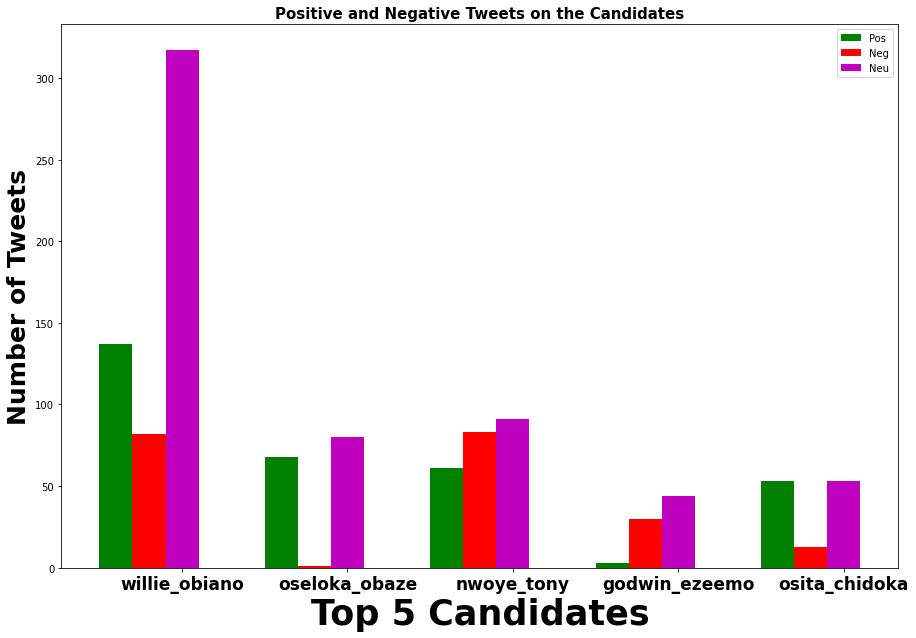

In [107]:
multiple_bars=plt.figure()
tweets_by_name_pos = [pos_df['willie_obiano'].value_counts()[True],
                  pos_df['oseloka_obaze'].value_counts()[True],
                  pos_df['nwoye_tony'].value_counts()[True],
                  pos_df['godwin_ezeemo'].value_counts()[True],
                  pos_df['osita_chidoka'].value_counts()[True]]

tweets_by_name_neg = [neg_df['willie_obiano'].value_counts()[True],
                  neg_df['oseloka_obaze'].value_counts()[True],
                  neg_df['nwoye_tony'].value_counts()[True],
                  neg_df['godwin_ezeemo'].value_counts()[True],
                  neg_df['osita_chidoka'].value_counts()[True]]

tweets_by_name_neu = [neu_df['willie_obiano'].value_counts()[True],
                  neu_df['oseloka_obaze'].value_counts()[True],
                  neu_df['nwoye_tony'].value_counts()[True],
                  neu_df['godwin_ezeemo'].value_counts()[True],
                  neu_df['osita_chidoka'].value_counts()[True]]

x=['willie_obiano','oseloka_obaze','nwoye_tony','godwin_ezeemo','osita_chidoka']
ind=np.arange(len(x))
pos = tweets_by_name_pos
neg = tweets_by_name_neg
neu = tweets_by_name_neu

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Positive and Negative Tweets on the Candidates", fontsize=15, fontweight='bold')
ax=plt.subplot(111)
ax.bar(ind-.4, pos, width=.2, color='g', align='center', label='Pos')
ax.bar(ind-.2, neg, width=.2, color='r', align='center', label='Neg')
ax.bar(ind, neu, width=.2, color='m', align='center', label='Neu')

# ax.set_xticks([p + 0.0 * width for p in ind])
ax.set_xticks(ind)
ax.set_xticklabels(x,fontsize=17,fontweight='bold',rotation=0)
ax.set_ylabel('Number of Tweets', fontsize=25, fontweight='bold')
ax.set_xlabel('Top 5 Candidates', fontsize=35, fontweight='bold')
ax.legend(loc='best')

<Figure size 432x288 with 0 Axes>

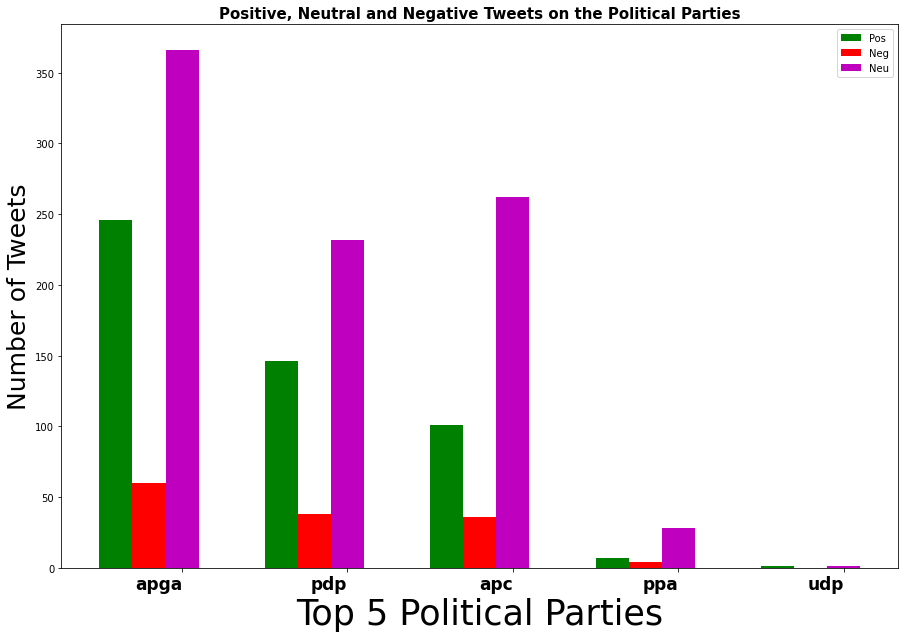

In [108]:
multiple_bars=plt.figure()

tweets_by_name_pos = [pos_df['apga'].value_counts()[True], 
                  pos_df['pdp'].value_counts()[True], 
                  pos_df['apc'].value_counts()[True], 
                  pos_df['ppa'].value_counts()[True],
                  pos_df['udp'].value_counts()[True]]

tweets_by_name_neg = [neg_df['apga'].value_counts()[True], 
                  neg_df['pdp'].value_counts()[True], 
                  neg_df['apc'].value_counts()[True], 
                  neg_df['ppa'].value_counts()[True],
                  0]

tweets_by_name_neu = [neu_df['apga'].value_counts()[True], 
                  neu_df['pdp'].value_counts()[True], 
                  neu_df['apc'].value_counts()[True], 
                  neu_df['ppa'].value_counts()[True],
                  neu_df['udp'].value_counts()[True]]

x = ['apga','pdp','apc','ppa','udp']
ind = np.arange(len(x))
pos = tweets_by_name_pos
neg = tweets_by_name_neg
neu = tweets_by_name_neu

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Positive, Neutral and Negative Tweets on the Political Parties", fontsize=15, fontweight='bold')
ax=plt.subplot(111)
ax.bar(ind-.4, pos, width=.2, color='g', align='center', label='Pos')
ax.bar(ind-.2, neg, width=.2, color='r', align='center', label='Neg')
ax.bar(ind, neu, width=.2, color='m', align='center', label='Neu')

ax.set_xticks(ind)
ax.set_xticklabels(x,fontsize=17,fontweight='bold',rotation=0,ha='right')
ax.set_ylabel('Number of Tweets', fontsize=25)
ax.set_xlabel('Top 5 Political Parties', fontsize=35)
ax.legend(loc='best')

<Figure size 432x288 with 0 Axes>

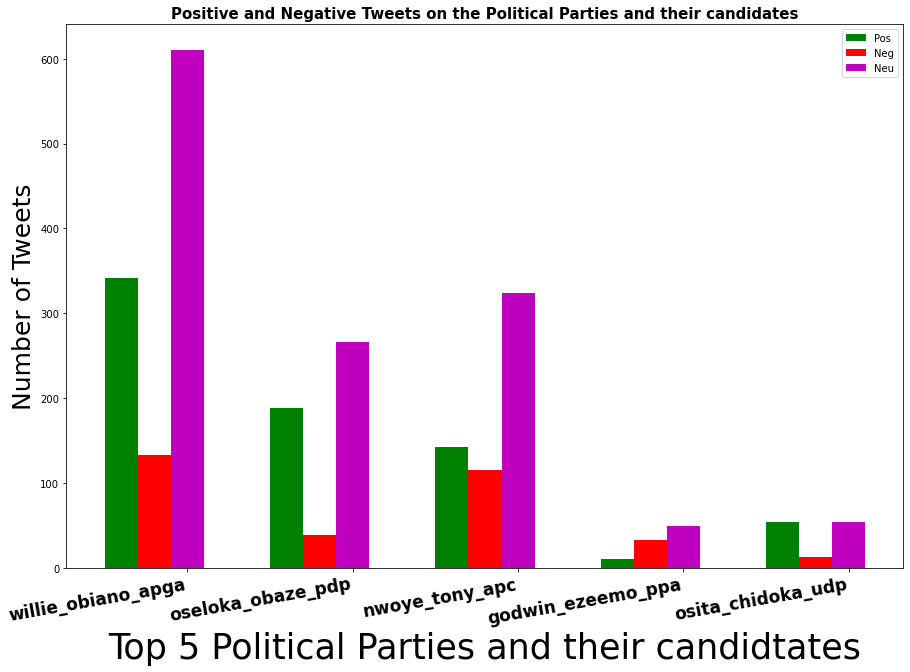

In [109]:
multiple_bars=plt.figure()

tweets_by_name_pos = [pos_df['willie_obiano_apga'].value_counts()[True], 
                  pos_df['oseloka_obaze_pdp'].value_counts()[True], 
                  pos_df['nwoye_tony_apc'].value_counts()[True], 
                  pos_df['godwin_ezeemo_ppa'].value_counts()[True],
                  pos_df['osita_chidoka_udp'].value_counts()[True]]

tweets_by_name_neg = [neg_df['willie_obiano_apga'].value_counts()[True], 
                  neg_df['oseloka_obaze_pdp'].value_counts()[True], 
                  neg_df['nwoye_tony_apc'].value_counts()[True], 
                  neg_df['godwin_ezeemo_ppa'].value_counts()[True],
                  neg_df['osita_chidoka_udp'].value_counts()[True]]

tweets_by_name_neu = [neu_df['willie_obiano_apga'].value_counts()[True], 
                  neu_df['oseloka_obaze_pdp'].value_counts()[True], 
                  neu_df['nwoye_tony_apc'].value_counts()[True], 
                  neu_df['godwin_ezeemo_ppa'].value_counts()[True],
                  neu_df['osita_chidoka_udp'].value_counts()[True]]

x = ['willie_obiano_apga','oseloka_obaze_pdp','nwoye_tony_apc','godwin_ezeemo_ppa','osita_chidoka_udp']
ind = np.arange(len(x))
pos = tweets_by_name_pos
neg = tweets_by_name_neg
neu = tweets_by_name_neu

width = 0.8
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Positive and Negative Tweets on the Political Parties and their candidates", fontsize=15, fontweight='bold')
ax=plt.subplot(111)
ax.bar(ind-.4, pos, width=.2, color='g', align='center', label='Pos')
ax.bar(ind-.2, neg, width=.2, color='r', align='center', label='Neg')
ax.bar(ind, neu, width=.2, color='m', align='center', label='Neu')

ax.set_xticks(ind)
ax.set_xticklabels(x,fontsize=17,fontweight='bold',rotation=10,ha='right')
ax.set_ylabel('Number of Tweets', fontsize=25)
ax.set_xlabel('Top 5 Political Parties and their candidtates', fontsize=35)
ax.legend(loc='best')

# Counts for names of interest in the subjectivity tweets

In [110]:
subj_df = originals[originals.Sentiment_Subjectivity_Vals == 2]
subj_df.head(10)

id                            date query_string  \
3   931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4   931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   
8   931856843525246976  Sat Nov 18 12:09:19 +0000 2017      anambra   
9   931856900764897280  Sat Nov 18 12:09:32 +0000 2017      anambra   
12  931856960269537280  Sat Nov 18 12:09:47 +0000 2017      anambra   
13  931856960978325504  Sat Nov 18 12:09:47 +0000 2017      anambra   
16  931857127441870849  Sat Nov 18 12:10:26 +0000 2017      anambra   
17  931857130348535808  Sat Nov 18 12:10:27 +0000 2017      anambra   
18  931857140326846464  Sat Nov 18 12:10:29 +0000 2017      anambra   
19  931857146102403073  Sat Nov 18 12:10:31 +0000 2017      anambra   

                 location                    user  \
3          Lagos, Nigeria             Oluwatomiwa   
4          Lagos, Nigeria             Oluwatomiwa   
8          Lagos, Nigeria             Oluwatomiwa   
9                  Biafra          Biafra My Home   
12                   None          Chinedu Onyeka   
13                Nigeria            Hisprideblog   
16            On Twitter.           der Großvater   
17                   None             Uwem Inyang   
18                   None                  Obinna   
19  In Your Daddy's Heart  YOUR DADDY's MAIN CHIC   

                                                 text   apga    pdp    apc  \
3   I'm rooting for you osita chidoka today as #An...  False  False  False   
4   #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   
8   this thing they say they are doing in Anambra ...  False  False  False   
9   Osumoghu Ihiala , Anambra , BIAFRA . Biafrans ...  False  False  False   
12  @Breakingpost_ng How many re they there ? How ...  False  False  False   
13  #hisprideblog Large Turnout as Anambra Voters ...  False  False  False   
16  Hydrocephalus . . likely . " @nairaland : 7 - ...  False  False  False   
17  Good luck to Anambra peeps . May the best man ...  False  False  False   
18  Apc is allegedly sharing food and money 💰 to v...  False  False   True   
19        Political tradefare https://t.co/0ORGRFBiDS  False  False  False   

      ppa  ...                                   obaze_pdp_tokens  \
3   False  ...                                                      
4   False  ...  [#AnambraDecides2017, Today, is, Anambra, Gube...   
8   False  ...                                                      
9   False  ...                                                      
12  False  ...                                                      
13  False  ...                                                      
16  False  ...                                                      
17  False  ...                                                      
18  False  ...                                                      
19  False  ...                                                      

                                     nwoye_apc_tokens  ezeemo_ppa_tokens  \
3                                                                          
4                                                                          
8                                                                          
9                                                                          
12                                                                         
13                                                                         
16                                                                         
17                                                                         
18  [Apc, is, allegedly, sharing, food, and, money...                      
19                                                                         

                                   chidoka_udp_tokens  Sentiment_Polarity  \
3   [I'm, rooting, for, you, osita, chidoka, today...            0.766667   
4                                           

# Counts for names of interest in the non subjectivity tweets

In [111]:
non_subj_df = originals[originals.Sentiment_Subjectivity_Vals == 0]
non_subj_df.head(10)

id                            date query_string  \
0   930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1   931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2   931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
5   931856843525888876  Sat Nov 18 11:13:00 +0000 2017      anambra   
6   931859999525246976  Sat Nov 18 11:23:00 +0000 2017      anambra   
7   931856843525211116  Sat Nov 18 11:10:00 +0000 2017      anambra   
10  931856909191262208  Sat Nov 18 12:09:34 +0000 2017      anambra   
11  931856949154545664  Sat Nov 18 12:09:44 +0000 2017      anambra   
14  931857069434601472  Sat Nov 18 12:10:13 +0000 2017      anambra   
15  931857072077066241  Sat Nov 18 12:10:13 +0000 2017      anambra   

              location              user  \
0       Lagos, Nigeria       Oluwatomiwa   
1       Lagos, Nigeria       Oluwatomiwa   
2       Lagos, Nigeria       Oluwatomiwa   
5       Lagos, Nigeria       Oluwatomiwa   
6       Lagos, Nigeria       Oluwatomiwa   
7       Lagos, Nigeria       Oluwatomiwa   
10               Lagos     AKEWULA BELLO   
11                None         GurusVevo   
14            Universe           Oscrape   
15  Abakaliki, Nigeria  Classiqmedia.com   

                                                 text   apga    pdp    apc  \
0   #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1   At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2   #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
5   #AnambraDecides2017 APC and Apga agents seen l...   True  False   True   
6   Anambra election : APC , APGA agents paying 2,...   True   True   True   
7   Vote and write your name in order to collect m...   True  False   True   
10             Unlike GEJ era https://t.co/zgU4Id9WH9  False  False  False   
11  Anambra Election : “ Vote & amp ; Die ” Charms...  False  False  False   
14  Anambra election litmus test for INEC , APC sa...  False   True   True   
15  @YulEdochie Please go out and vote your choice...  False  False  False   

      ppa  ...                                   obaze_pdp_tokens  \
0   False  ...  [#AnambraDecides2017, Anambra, will, fare, bet...   
1   False  ...  [At, the, visit, of, @MBuhari, to, Ebonyi, ,, ...   
2   False  ...  [#AnambraDecides2017, Anambra, people, pls, go...   
5   False  ...                                                      
6   False  ...  [Anambra, election, :, APC, ,, APGA, agents, p...   
7   False  ...                                                      
10  False  ...                                                      
11  False  ...                                                      
14  False  ...  [Anambra, election, litmus, test, for, INEC, ,...   
15  False  ...                                                      

                                     nwoye_apc_tokens  ezeemo_ppa_tokens  \
0   [#AnambraDecides2017, Anambra, will, fare, bet...                      
1   [At, the, visit, of, @MBuhari, to, Ebonyi, ,, ...                      
2                                                                          
5   [#AnambraDecides2017, APC, and, Apga, agents, ...                      
6   [Anambra, election, :, APC, ,, APGA, agents, p...                      
7   [Vote, and, write, your, name, in, order, to, ...                      
10                                                                         
11                                                                         
14  [Anambra, election, litmus, test, for, INEC, ,...                      
15                                                                         

    chidoka_udp_tokens  Sentiment_Polarity  Sentiment_Subjectivity  \
0                                      0.0                     0.0   
1                                      0.0                     0.0   
2                                      0.0                     0.0   
5                

In [112]:
for index, tweets in originals[originals['Sentiment_Subjectivity_Vals'] == 2].iterrows():
    print("  " +str(tweets[39]) + "  " + tweets[5])

  0.43333333333333335  I'm rooting for you osita chidoka today as #AnambraDecides . You ran a superb , issues-based campaign and I wish you all the best today . Your success is Anambra's gain .
  0.4375  #AnambraDecides2017 Today is Anambra Gubernatorial Election , one of the most anticipated elections in Nigeria and we call on @inecnigeria the @PoliceNG and other security agencies in the state to remain neutral . We urge Ndi Anambra to come out and vote . PDP . . . power to the people
  0.5  this thing they say they are doing in Anambra shey its Election they called it too ? the open sharing of rice the m … https://t.co/CgRV9ARd5T
  0.8  Osumoghu Ihiala , Anambra , BIAFRA . Biafrans didn't come out to vote . We are Biafrans and not Nigerians ! Free BIAFRA https://t.co/0TCaeP2nwB
  0.39999999999999997  @Breakingpost_ng How many re they there ? How many people re they giving the money ? Anambra people really boycotted the election !
  0.42857142857142855  #hisprideblog Large Turnout as 

  0.2888888888888889  Anambra Decides : Yul Edochie Denies Stepping Down https://t.co/TA3xoiyegZ https://t.co/UTpDVfytMK
  0.6  Anambra decides : Electoral materials arrive Ezeemo ’ s ward five hours late https://t.co/5AZdtc3xiW https://t.co/UI0W8PlSxt
  0.9  Race to Awka : Gov Willie Obiano has just voted - As the people of Anambra turn out to elect who should govern t . . . https://t.co/VgT1fupPtM
  1.0  Anambra decides : Questionable incidents going on in Anambra election – Nwoye ’ s Spokesman https://t.co/fQQBv5abMo https://t.co/KS3oOVHyet
  0.6  Anambra decides : Electoral materials arrive Ezeemo ’ s ward five hours late https://t.co/BB3mue6D0A https://t.co/f5zp4h41rE
  1.0  Anambra Governorship Election : Impressive Turnout Of Voters https://t.co/JQhc9vrk8C https://t.co/GDvYMzRaQJ
  0.125  Must See : Anambra Election : UN Foreign Election Observers Storm Nnewi ( Pictures ) https://t.co/3e0wzsS56U
  0.125  Anambra Election : UN Foreign Election Observers Storm Nnewi ( Pictures ) h

  0.1  Gubernatorial elections are technical elections . Ndi Anambra , stay awake and see the organic emergence of APC victory
  0.15  Anambra Polls : Apga In Early Lead In Four Local Government Councils https://t.co/0fzwMOjASA https://t.co/csGcb3FrHY
  0.4  It seems PDP is dead in Nigerian Politics https://t.co/t6OsRMA4ni
  0.3333333333333333  Some Anambra Youths Kill Cow & amp ; Enjoy " Nsala Day " After Boycotting Election ( Pics ) via https://t.co/URZVxJrbNM #News … https://t.co/8WASMsWhfd
  0.4  Low Turn Out And Inducement Of Voters Mars Anambra Guber Election READ MORE : https://t.co/8OW0mcF7Cc https://t.co/9guOIOj594
  0.9  Oga ur wickedness is unprecedented . . kilode https://t.co/XmwCGIz96I
  0.5  LIVE UPDATES : Governor Obiano , ex-minister Chidoka vote as APGA , PDP , APC , others battle for Anambra's guber seat i … https://t.co/vhGiJXu9Rk
  0.5  LIVE UPDATES : Governor Obiano , ex-minister Chidoka vote as APGA , PDP , APC , others battle for Anambra's guber seat i … https:/

  0.5  Live Updates : Anambra election https://t.co/7I6N9Vk86e
  0.6125  @OfficialPDPNig @ApgaHQ @inecnigeria @PoliceNG Anambra and Nigeria are entirely TWO different topics . . .
  0.35  Biafra : IPOB thanks electorates for ‘ boycotting ’ Anambra governorship election - More Trending Stories on https://t.co/lpaMGwB5ed
  0.05  Anambra election : Gunmen appear at polling unit , voting material missing in Nnewi - https://t.co/Ow9slumTEc https://t.co/f1bHLoAhn2
  1.0  Anambra election : INEC says it remains vigilant until final result is announced - https://t.co/H0iefISqoN https://t.co/fXXh5CSDAH
  0.7272727272727273  I've just posted a new blog : Anambra Poll : INEC Vigilant Until Final Result Is Announced https://t.co/Qyb17whAMt
  0.7272727272727273  I've just posted a new blog : Anambra Poll : INEC Vigilant Until Final Result Is Announced https://t.co/cYZIOIdWfa
  0.1  Anambra guber : PDP scribe Ben Obi loses ward to APGA https://t.co/m1pp6KnQEF https://t.co/YL3PLKXKez
  1.0  @YIAGA ho

In [113]:
multiple_bars=plt.figure()

tweets_by_name_subj = [subj_df['willie_obiano'].value_counts()[True], 
                  subj_df['oseloka_obaze'].value_counts()[True], 
                  subj_df['nwoye_tony'].value_counts()[True], 
                  subj_df['godwin_ezeemo'].value_counts()[True],
                  subj_df['osita_chidoka'].value_counts()[True]]

tweets_by_name_non_subj = [non_subj_df['willie_obiano'].value_counts()[True],
                  non_subj_df['oseloka_obaze'].value_counts()[True], 
                  non_subj_df['nwoye_tony'].value_counts()[True], 
                  non_subj_df['godwin_ezeemo'].value_counts()[True],
                  non_subj_df['osita_chidoka'].value_counts()[True]]

x=['willie_obiano','oseloka_obaze','nwoye_tony','godwin_ezeemo','osita_chidoka']
ind=np.arange(len(x))
subj = tweets_by_name_subj
non_subj = tweets_by_name_non_subj

width = 0.8
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Subjectivity and Non_Subjectivity Tweets on the candidates", fontsize=15, fontweight='bold')
ax=plt.subplot(111)
ax.bar(ind-.2, subj, width=.2, color='g', align='center', label='Subjectivity')
ax.bar(ind, non_subj, width=.2, color='m', align='center', label='Non_Subjectivity')

ax.set_xticks(ind)
ax.set_xticklabels(x,fontsize=17,fontweight='bold')
ax.set_ylabel('Number of Tweets',fontsize=35,fontweight='bold')
ax.set_xlabel('Top 5 candidtates',fontsize=35,fontweight='bold')
ax.legend(loc='best')

<Figure size 432x288 with 0 Axes>

In [114]:
# for index, tweets in tweets_by_name_non_subj[tweets_by_name_non_subj['Sentiment_Polarity_Vals'] == 2].iterrows():
#     print("  " +str(tweets[46]) + "  " + tweets[5])

<Figure size 432x288 with 0 Axes>

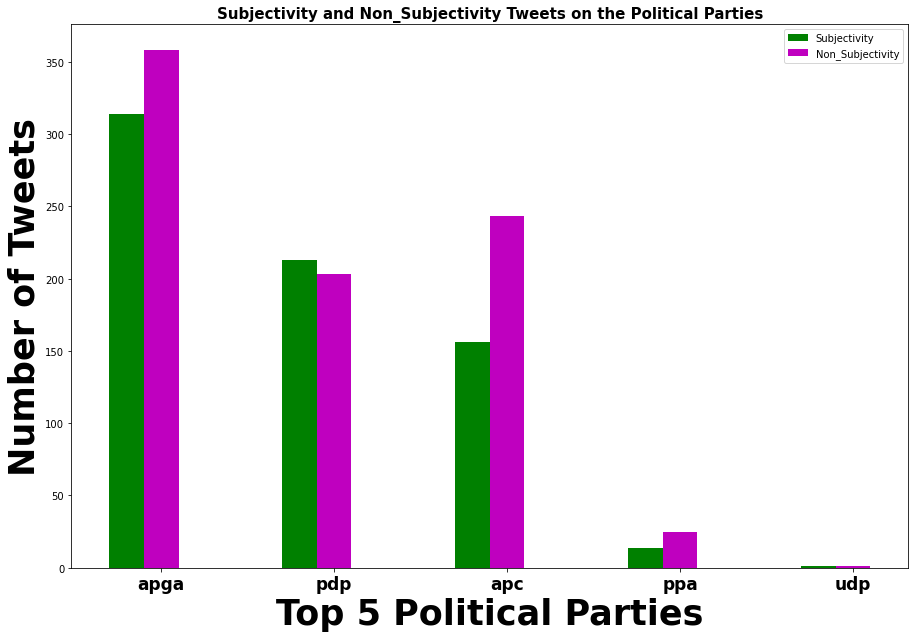

In [115]:
multiple_bars=plt.figure()

tweets_by_name_subj = [subj_df['apga'].value_counts()[True], 
                  subj_df['pdp'].value_counts()[True], 
                  subj_df['apc'].value_counts()[True], 
                  subj_df['ppa'].value_counts()[True],
                  subj_df['udp'].value_counts()[True]]

tweets_by_name_non_subj = [non_subj_df['apga'].value_counts()[True], 
                  non_subj_df['pdp'].value_counts()[True], 
                  non_subj_df['apc'].value_counts()[True], 
                  non_subj_df['ppa'].value_counts()[True],
                  non_subj_df['udp'].value_counts()[True]]

x=['apga','pdp','apc','ppa','udp']
ind=np.arange(len(x))
subj = tweets_by_name_subj
non_subj = tweets_by_name_non_subj

width = 0.8
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Subjectivity and Non_Subjectivity Tweets on the Political Parties", fontsize=15, fontweight='bold')
ax=plt.subplot(111)
ax.bar(ind-.2, subj, width=.2, color='g', align='center', label='Subjectivity')
ax.bar(ind, non_subj, width=.2, color='m', align='center', label='Non_Subjectivity')

ax.set_xticks(ind)
ax.set_xticklabels(x,fontsize=17,fontweight='bold')
ax.set_ylabel('Number of Tweets',fontsize=35,fontweight='bold')
ax.set_xlabel('Top 5 Political Parties',fontsize=35,fontweight='bold')
ax.legend(loc='best')

<Figure size 432x288 with 0 Axes>

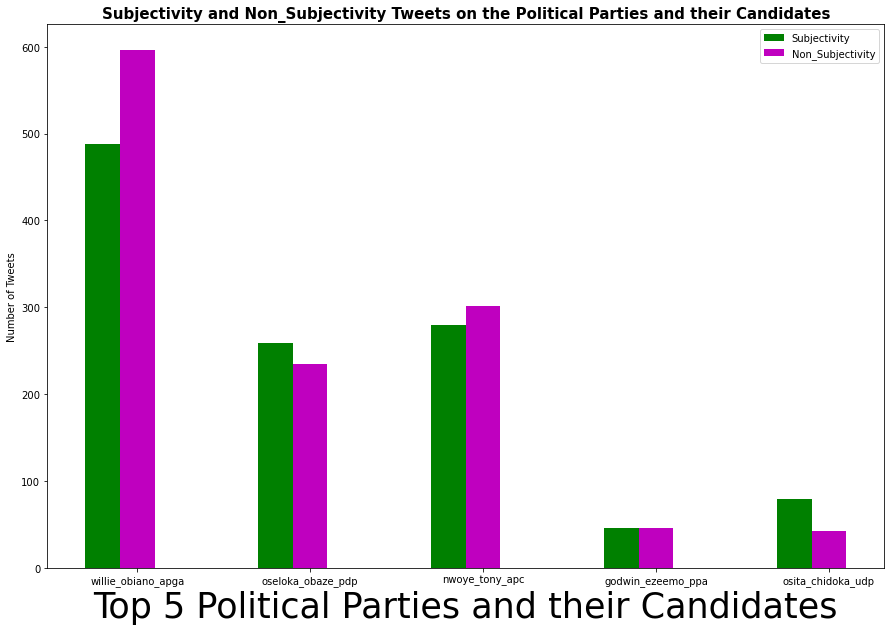

In [116]:
multiple_bars=plt.figure()

tweets_by_name_subj = [subj_df['willie_obiano_apga'].value_counts()[True], 
                  subj_df['oseloka_obaze_pdp'].value_counts()[True], 
                  subj_df['nwoye_tony_apc'].value_counts()[True], 
                  subj_df['godwin_ezeemo_ppa'].value_counts()[True],
                  subj_df['osita_chidoka_udp'].value_counts()[True]]

tweets_by_name_non_subj = [non_subj_df['willie_obiano_apga'].value_counts()[True], 
                  non_subj_df['oseloka_obaze_pdp'].value_counts()[True], 
                  non_subj_df['nwoye_tony_apc'].value_counts()[True], 
                  non_subj_df['godwin_ezeemo_ppa'].value_counts()[True],
                  non_subj_df['osita_chidoka_udp'].value_counts()[True]]

x=['willie_obiano_apga','oseloka_obaze_pdp','nwoye_tony_apc','godwin_ezeemo_ppa','osita_chidoka_udp']
ind=np.arange(len(x))
subj = tweets_by_name_subj
non_subj = tweets_by_name_non_subj

width = 0.8
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Subjectivity and Non_Subjectivity Tweets on the Political Parties and their Candidates", fontsize=15, fontweight='bold')
ax=plt.subplot(111)
ax.bar(ind-.2, subj, width=.2, color='g', align='center', label='Subjectivity')
ax.bar(ind, non_subj, width=.2, color='m', align='center', label='Non_Subjectivity')

ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Top 5 Political Parties and their Candidates',fontsize=35)
ax.legend(loc='best')

# Average senti polarity for each party and contestants

In [117]:
#['willie_obiano','oseloka_obaze','nwoye_tony','godwin_ezeemo','osita_chidoka']

contestants_val = []
partynames_vals = []
for i in range(0,len(originals.willie_obiano)):
    if originals.willie_obiano[i] == True:
        contestants_val.append(1)
    elif originals.oseloka_obaze[i] == True:
        contestants_val.append(2)
    elif originals.nwoye_tony[i] == True:
        contestants_val.append(3)
    elif originals.godwin_ezeemo[i] == True:
        contestants_val.append(4)
    elif originals.osita_chidoka[i] == True:
        contestants_val.append(5)
    else:
        contestants_val.append(0)
    
    if originals.apga[i] == True:
        partynames_vals.append(1)
    elif originals.pdp[i] == True:
        partynames_vals.append(2)
    elif originals.apc[i] == True:
        partynames_vals.append(3)
    elif originals.ppa[i] == True:
        partynames_vals.append(4)
    elif originals.udp[i] == True:
        partynames_vals.append(5)
    else:
        partynames_vals.append(0)

In [118]:
originals['contestants_val'] = contestants_val
originals['partynames_vals'] = partynames_vals
originals.head()

id                            date query_string  \
0  930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1  931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2  931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3  931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4  931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   

         location         user  \
0  Lagos, Nigeria  Oluwatomiwa   
1  Lagos, Nigeria  Oluwatomiwa   
2  Lagos, Nigeria  Oluwatomiwa   
3  Lagos, Nigeria  Oluwatomiwa   
4  Lagos, Nigeria  Oluwatomiwa   

                                                text   apga    pdp    apc  \
0  #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1  At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2  #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
3  I'm rooting for you osita chidoka today as #An...  False  False  False   
4  #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   

     ppa  ...  ezeemo_ppa_tokens  \
0  False  ...                      
1  False  ...                      
2  False  ...                      
3  False  ...                      
4  False  ...                      

                                  chidoka_udp_tokens  Sentiment_Polarity  \
0                                                               0.000000   
1                                                               0.000000   
2                                                               0.000000   
3  [I'm, rooting, for, you, osita, chidoka, today...            0.766667   
4                                                               0.187500   

   Sentiment_Subjectivity  Sentiment_Polarity_Vals  \
0                0.000000                        0   
1                0.000000                        0   
2                0.000000                        0   
3                0.433333                        2   
4                0.437500                        2   

   Sentiment_Subjectivity_Vals  sc_sentiwordnet  pol_sentiwordnet  \
0                            0                1            -1.000   
1                            0                1            -0.250   
2                            0                2             0.375   
3                            2                2             1.125   
4                            2                2             0.375   

   contestants_val  partynames_vals  
0                1                3  
1                0                1  
2                2                2  
3                5                0  
4                0                2  

[5 rows x 46 columns]

<AxesSubplot:xlabel='contestants_val', ylabel='count'>

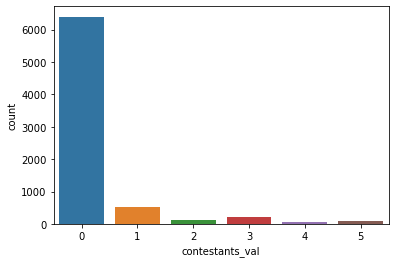

In [119]:
sns.countplot(x='contestants_val', data=originals)

<AxesSubplot:xlabel='partynames_vals', ylabel='count'>

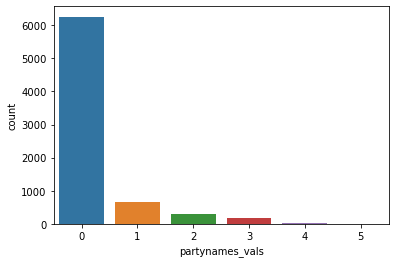

In [120]:
sns.countplot(x='partynames_vals', data=originals)

<AxesSubplot:xlabel='contestants_val', ylabel='Sentiment_Polarity'>

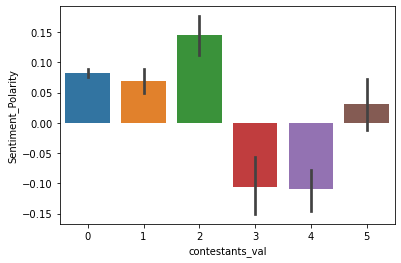

In [121]:
sns.barplot(x='contestants_val', y='Sentiment_Polarity', data=originals)

<AxesSubplot:xlabel='partynames_vals', ylabel='Sentiment_Polarity'>

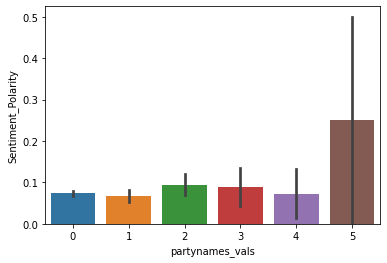

In [122]:
sns.barplot(x='partynames_vals', y='Sentiment_Polarity', data=originals)

# Average senti polarity for parties + contestants

In [123]:
#['willie_obiano_apga','oseloka_obaze_pdp','nwoye_tony_apc','godwin_ezeemo_ppa','osita_chidoka_udp']
partynames_contestants_vals = []
pnames = []
for i in range(0,len(originals.willie_obiano_apga)):
    if originals.willie_obiano_apga[i] == True:
        partynames_contestants_vals.append(1)
        pnames.append('apga')
    elif originals.oseloka_obaze_pdp[i] == True:
        partynames_contestants_vals.append(2)
        pnames.append('pdp')
    elif originals.nwoye_tony_apc[i] == True:
        partynames_contestants_vals.append(3)
        pnames.append('apc')
    elif originals.godwin_ezeemo_ppa[i] == True:
        partynames_contestants_vals.append(4)
        pnames.append('ppa')
    elif originals.osita_chidoka_udp[i] == True:
        partynames_contestants_vals.append(5)
        pnames.append('udp')
    else:
        partynames_contestants_vals.append(0)
        pnames.append('non')

In [124]:
originals['partynames_contestants_vals'] = partynames_contestants_vals
originals['pnames'] = pnames
originals.head()

id                            date query_string  \
0  930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1  931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2  931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3  931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4  931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   

         location         user  \
0  Lagos, Nigeria  Oluwatomiwa   
1  Lagos, Nigeria  Oluwatomiwa   
2  Lagos, Nigeria  Oluwatomiwa   
3  Lagos, Nigeria  Oluwatomiwa   
4  Lagos, Nigeria  Oluwatomiwa   

                                                text   apga    pdp    apc  \
0  #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1  At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2  #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
3  I'm rooting for you osita chidoka today as #An...  False  False  False   
4  #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   

     ppa  ...  Sentiment_Polarity  Sentiment_Subjectivity  \
0  False  ...            0.000000                0.000000   
1  False  ...            0.000000                0.000000   
2  False  ...            0.000000                0.000000   
3  False  ...            0.766667                0.433333   
4  False  ...            0.187500                0.437500   

   Sentiment_Polarity_Vals  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
0                        0                            0                1   
1                        0                            0                1   
2                        0                            0                2   
3                        2                            2                2   
4                        2                            2                2   

   pol_sentiwordnet  contestants_val  partynames_vals  \
0            -1.000                1                3   
1            -0.250                0                1   
2             0.375                2                2   
3             1.125                5                0   
4             0.375                0                2   

   partynames_contestants_vals  pnames  
0                            1    apga  
1                            1    apga  
2                            2     pdp  
3                            5     udp  
4                            2     pdp  

[5 rows x 48 columns]

In [125]:
c0=0
for v in originals.partynames_contestants_vals:
    if v == 2:
        c0+=2
print(c0)

c1=0
for v in originals.contestants_val:
    if v == 2:
        c1+=2
print(c1)

660
268


<AxesSubplot:xlabel='partynames_contestants_vals', ylabel='count'>

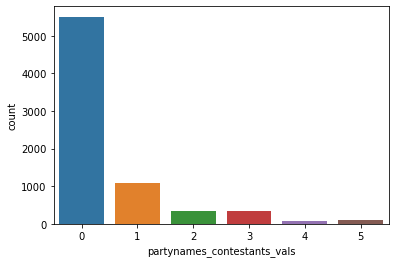

In [126]:
sns.countplot(x='partynames_contestants_vals', data=originals)

<AxesSubplot:xlabel='partynames_contestants_vals', ylabel='Sentiment_Polarity'>

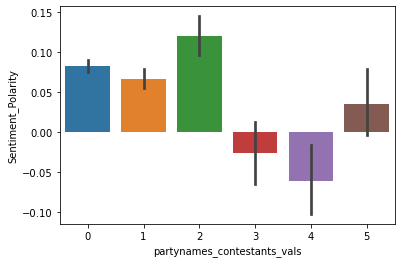

In [127]:
sns.barplot(x='partynames_contestants_vals', y='Sentiment_Polarity', data=originals)

# date time range example

In [128]:
df = pd.DataFrame({'full_date': pd.date_range('2016-1-1 10:00:00.123', periods=10, freq='1H')})

In [129]:
df

full_date
0 2016-01-01 10:00:00.123
1 2016-01-01 11:00:00.123
2 2016-01-01 12:00:00.123
3 2016-01-01 13:00:00.123
4 2016-01-01 14:00:00.123
5 2016-01-01 15:00:00.123
6 2016-01-01 16:00:00.123
7 2016-01-01 17:00:00.123
8 2016-01-01 18:00:00.123
9 2016-01-01 19:00:00.123

In [130]:
df['date'] = df['full_date'].dt.date

In [131]:
df['time'] = df['full_date'].dt.time

# Time series sentiment analysis

In [136]:
# reloads libraries when their hash changes
%load_ext autoreload
%autoreload 2

import logging
logging.basicConfig(level="WARN")

import itertools as it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Our libraries
from tweet_parser.tweet import Tweet
from searchtweets import ResultStream, gen_rule_payload

from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell

# load the methods from our auxillary file
from timeseries_utils import (get_frequent_terms,
                               plot_ts,
                               summarize_tweet_text,
                               make_normalplot,
                               pop_star_rules,
                               spotify_popular_artists_rule,
                               spotify_charts_rule)

# the following makes working in a notebook a bit easier
# as you don't have to have new cells for all output
InteractiveShell.ast_node_interactivity = "all"

# allows for inline plotting
%matplotlib inline

# pretty plots
plt.style.use("bmh")

# better sizing for the notebook
plt.rcParams['figure.figsize'] = (10, 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'timeseries_utils'

### willie_obiano 535 oseloka_obaze 147 nwoye_tony 235 godwin_ezeemo 77 osita_chidoka 118 apga 668 pdp 412 apc 394 ppa 39 udp 2 willie_obiano_apga 1079 oseloka_obaze_pdp 489 nwoye_tony_apc 577 godwin_ezeemo_ppa 92 osita_chidoka_udp 120

In [135]:
data_for_time_series = originals.copy()
data_for_time_series

id                            date query_string  \
0     930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1     931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2     931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3     931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4     931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   
...                  ...                             ...          ...   
7433  932021133653827584  Sat Nov 18 23:02:09 +0000 2017      anambra   
7434  932021150519087105  Sat Nov 18 23:02:13 +0000 2017      anambra   
7435  932021173474471937  Sat Nov 18 23:02:18 +0000 2017      anambra   
7436  932021225609625601  Sat Nov 18 23:02:30 +0000 2017      anambra   
7437  932021257947762688  Sat Nov 18 23:02:38 +0000 2017      anambra   

            location             user  \
0     Lagos, Nigeria      Oluwatomiwa   
1     Lagos, Nigeria      Oluwatomiwa   
2     Lagos, Nigeria      Oluwatomiwa   
3     Lagos, Nigeria      Oluwatomiwa   
4     Lagos, Nigeria      Oluwatomiwa   
...              ...              ...   
7433             USA        Maria Eke   
7434  Garden of Eden            Dozay   
7435  Lagos, Nigeria  247CODED.COM.NG   
7436      WAR STREET           KINGG♔   
7437            None             Kodo   

                                                   text   apga    pdp    apc  \
0     #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1     At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2     #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
3     I'm rooting for you osita chidoka today as #An...  False  False  False   
4     #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   
...                                                 ...    ...    ...    ...   
7433  Anambra election : IPOB says low turnout sign ...  False  False  False   
7434  Lol . . . charity begins at home https://t.co/...  False  False  False   
7435  Anambra Election : “ Vote & amp ; Die ” Charms...  False  False  False   
7436                       Awka https://t.co/qronzgnV1H  False  False  False   
7437                          😂 https://t.co/VAUJwKuzth  False  False  False   

        ppa  ...  Sentiment_Polarity_Vals  Sentiment_Subjectivity_Vals  \
0     False  ...                        0                            0   
1     False  ...                        0                            0   
2     False  ...                        0                            0   
3     False  ...                        2                            2   
4     False  ...                        2                            2   
...     ...  ...                      ...                          ...   
7433  False  ...                        0                            2   
7434  False  ...                        2                            2   
7435  False  ...                        0                            0   
7436  False  ...                        0                            0   
7437  False  ...                        0                            0   

      sc_sentiwordnet  pol_sentiwordnet  sc_sentivader  pol_sentivader  \
0                   1            -1.000              1         -0.8847   
1                   1            -0.250              1         -0.1027   
2                   2             0.375              1         -0.2263   
3                   2             1.125              2          0.9590   
4                   2             0.375              2          0.3400   
...               ...               ...            ...             ...   
7433                1            -0.250              1         -0.5267   
7434                2             0.500              2          0.6808   
7435                2             0.625              1         -0.2500   
7436                0             0.000              0        

In [136]:
data_for_time_series = data_for_time_series.loc[data_for_time_series['date'] != 'None']

In [137]:
data_for_time_series = data_for_time_series.copy()
data_for_time_series

id                            date query_string  \
0     930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1     931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2     931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3     931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4     931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   
...                  ...                             ...          ...   
7433  932021133653827584  Sat Nov 18 23:02:09 +0000 2017      anambra   
7434  932021150519087105  Sat Nov 18 23:02:13 +0000 2017      anambra   
7435  932021173474471937  Sat Nov 18 23:02:18 +0000 2017      anambra   
7436  932021225609625601  Sat Nov 18 23:02:30 +0000 2017      anambra   
7437  932021257947762688  Sat Nov 18 23:02:38 +0000 2017      anambra   

            location             user  \
0     Lagos, Nigeria      Oluwatomiwa   
1     Lagos, Nigeria      Oluwatomiwa   
2     Lagos, Nigeria      Oluwatomiwa   
3     Lagos, Nigeria      Oluwatomiwa   
4     Lagos, Nigeria      Oluwatomiwa   
...              ...              ...   
7433             USA        Maria Eke   
7434  Garden of Eden            Dozay   
7435  Lagos, Nigeria  247CODED.COM.NG   
7436      WAR STREET           KINGG♔   
7437            None             Kodo   

                                                   text   apga    pdp    apc  \
0     #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1     At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2     #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
3     I'm rooting for you osita chidoka today as #An...  False  False  False   
4     #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   
...                                                 ...    ...    ...    ...   
7433  Anambra election : IPOB says low turnout sign ...  False  False  False   
7434  Lol . . . charity begins at home https://t.co/...  False  False  False   
7435  Anambra Election : “ Vote & amp ; Die ” Charms...  False  False  False   
7436                       Awka https://t.co/qronzgnV1H  False  False  False   
7437                          😂 https://t.co/VAUJwKuzth  False  False  False   

        ppa  ...  Sentiment_Polarity_Vals  Sentiment_Subjectivity_Vals  \
0     False  ...                        0                            0   
1     False  ...                        0                            0   
2     False  ...                        0                            0   
3     False  ...                        2                            2   
4     False  ...                        2                            2   
...     ...  ...                      ...                          ...   
7433  False  ...                        0                            2   
7434  False  ...                        2                            2   
7435  False  ...                        0                            0   
7436  False  ...                        0                            0   
7437  False  ...                        0                            0   

      sc_sentiwordnet  pol_sentiwordnet  sc_sentivader  pol_sentivader  \
0                   1            -1.000              1         -0.8847   
1                   1            -0.250              1         -0.1027   
2                   2             0.375              1         -0.2263   
3                   2             1.125              2          0.9590   
4                   2             0.375              2          0.3400   
...               ...               ...            ...             ...   
7433                1            -0.250              1         -0.5267   
7434                2             0.500              2          0.6808   
7435                2             0.625              1         -0.2500   
7436                0             0.000              0        

In [138]:
data_for_time_series['created_at'] = [d.split()[5]+'-'+'11'+'-'+d.split()[2]+' '+d.split()[3] for d in data_for_time_series.date]

In [139]:
data_for_time_series

id                            date query_string  \
0     930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1     931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
2     931856855525246976  Sat Nov 18 07:15:00 +0000 2017      anambra   
3     931856855555246976  Sat Nov 18 10:17:00 +0000 2017      anambra   
4     931856843525556976  Sat Nov 18 10:44:00 +0000 2017      anambra   
...                  ...                             ...          ...   
7433  932021133653827584  Sat Nov 18 23:02:09 +0000 2017      anambra   
7434  932021150519087105  Sat Nov 18 23:02:13 +0000 2017      anambra   
7435  932021173474471937  Sat Nov 18 23:02:18 +0000 2017      anambra   
7436  932021225609625601  Sat Nov 18 23:02:30 +0000 2017      anambra   
7437  932021257947762688  Sat Nov 18 23:02:38 +0000 2017      anambra   

            location             user  \
0     Lagos, Nigeria      Oluwatomiwa   
1     Lagos, Nigeria      Oluwatomiwa   
2     Lagos, Nigeria      Oluwatomiwa   
3     Lagos, Nigeria      Oluwatomiwa   
4     Lagos, Nigeria      Oluwatomiwa   
...              ...              ...   
7433             USA        Maria Eke   
7434  Garden of Eden            Dozay   
7435  Lagos, Nigeria  247CODED.COM.NG   
7436      WAR STREET           KINGG♔   
7437            None             Kodo   

                                                   text   apga    pdp    apc  \
0     #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1     At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
2     #AnambraDecides2017 Anambra people pls go out ...  False   True  False   
3     I'm rooting for you osita chidoka today as #An...  False  False  False   
4     #AnambraDecides2017 Today is Anambra Gubernato...  False   True  False   
...                                                 ...    ...    ...    ...   
7433  Anambra election : IPOB says low turnout sign ...  False  False  False   
7434  Lol . . . charity begins at home https://t.co/...  False  False  False   
7435  Anambra Election : “ Vote & amp ; Die ” Charms...  False  False  False   
7436                       Awka https://t.co/qronzgnV1H  False  False  False   
7437                          😂 https://t.co/VAUJwKuzth  False  False  False   

        ppa  ...  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
0     False  ...                            0                1   
1     False  ...                            0                1   
2     False  ...                            0                2   
3     False  ...                            2                2   
4     False  ...                            2                2   
...     ...  ...                          ...              ...   
7433  False  ...                            2                1   
7434  False  ...                            2                2   
7435  False  ...                            0                2   
7436  False  ...                            0                0   
7437  False  ...                            0                0   

      pol_sentiwordnet  sc_sentivader  pol_sentivader  contestants_val  \
0               -1.000              1         -0.8847                1   
1               -0.250              1         -0.1027                0   
2                0.375              1         -0.2263                2   
3                1.125              2          0.9590                5   
4                0.375              2          0.3400                0   
...                ...            ...             ...              ...   
7433            -0.250              1         -0.5267                0   
7434             0.500              2          0.6808                0   
7435             0.625              1         -0.2500                0   
7436             0.000              0          0.0000                0   
7437             0.000              0          0.0000                0   

      par

In [140]:
candidates_parties=['willie','obiano','oseloka','obaze','nwoye','tony','godwin','ezeemo', 'osita','chidoka', 'apga','pdp','apc', 'ppa','udp']

# willie obiano wo

In [141]:
time_series_data_wo = data_for_time_series.loc[data_for_time_series['willie_obiano'] == True]
time_series_data_wo = time_series_data_wo.copy()

In [142]:
time_series_data_wo.shape

(536, 51)

In [143]:
candidates_parties_wo=['oseloka','obaze','nwoye','tony','godwin','ezeemo','osita','chidoka','apga','pdp','apc','ppa','udp']

In [144]:
pre = set()
for tweet in time_series_data_wo['text']:
    words = [w.lower() for w in tweet.split()]
    
    for w in words:
        if w.lower() in candidates_parties_wo:
            pre.add(tweet)

In [145]:
for tweet in time_series_data_wo['text']:
    if not tweet in pre:
        print(tweet)

Anambra Election : Obiano ‘ breaches ’ electoral law , addresses voters at polling centre : . . . https://t.co/nFoEjUP7VJ
Anambra guber : I ’ ll win with a landslide victory – Governor Obiano - . . . https://t.co/N4tgcXRDiU
Anambra Election : Obiano ‘ breaches ’ electoral law , addresses voters at polling centre : https://t.co/EXBvvf7jbQ
. @ApgaHQ candidate and gov Obiano cast his votes at his polling unit around 1.00 pm . He is confident of remaining in … https://t.co/SG1Wxiy46c
. ApgaHQ candidate and gov Obiano cast his votes at his polling unit around 1.00 pm . He is confident of remaining in … https://t.co/ZcKc6UeHwL
[ IN THE NEWS ] Anambra election : Obiano urges voters come out , vote ; decries INEC ’ s late arrival in Ihiala https://t.co/dFs0RFw6JY
Anambra Election : Obiano complains about failing card readers after voting-https :/ / t . co / esorQjaFlp https://t.co/gOGABrsWX5
Photos : Obiano thrills electorates with dancing steps - https://t.co/Z4wv5PvRq7 Willie Obiano Of Anamb

In [146]:
time_series_data_wo_only = time_series_data_wo[time_series_data_wo.text.isin(pre)==False].dropna()

In [147]:
i = 0
for text in time_series_data_wo_only['text']:
    if text != ' ':
        print(i, text)
        
        i += 1

0 Anambra Election : Obiano ‘ breaches ’ electoral law , addresses voters at polling centre : . . . https://t.co/nFoEjUP7VJ
1 Anambra guber : I ’ ll win with a landslide victory – Governor Obiano - . . . https://t.co/N4tgcXRDiU
2 Anambra Election : Obiano ‘ breaches ’ electoral law , addresses voters at polling centre : https://t.co/EXBvvf7jbQ
3 . @ApgaHQ candidate and gov Obiano cast his votes at his polling unit around 1.00 pm . He is confident of remaining in … https://t.co/SG1Wxiy46c
4 . ApgaHQ candidate and gov Obiano cast his votes at his polling unit around 1.00 pm . He is confident of remaining in … https://t.co/ZcKc6UeHwL
5 [ IN THE NEWS ] Anambra election : Obiano urges voters come out , vote ; decries INEC ’ s late arrival in Ihiala https://t.co/dFs0RFw6JY
6 Anambra Election : Obiano complains about failing card readers after voting-https :/ / t . co / esorQjaFlp https://t.co/gOGABrsWX5
7 Photos : Obiano thrills electorates with dancing steps - https://t.co/Z4wv5PvRq7 Willie

In [148]:
# UTC for date time at default
time_series_data_wo['created_at'] = pd.to_datetime(time_series_data_wo['created_at'])
# print("Negative Tweets Monitor: ")
# for index, tweets in time_series_data_wo[time_series_data_wo['Sentiment_Polarity_Vals'] == 2].iterrows():
#     print("  " +str(tweets[46]) + "  " + tweets[5])

In [149]:
# UTC for date time at default
time_series_data_wo_only['created_at'] = pd.to_datetime(time_series_data_wo_only['created_at'])
# print("Negative Tweets Monitor: ")
# for index, tweets in time_series_data_wo_only[time_series_data_wo_only['Sentiment_Polarity_Vals'] == 2].iterrows():
#     print("  " +str(tweets[46]) + "  " + tweets[5])

In [150]:
# Clean and transform data to enable time series
result = time_series_data_wo.groupby([pd.Grouper(key='created_at', freq='2h'), 'Sentiment_Polarity_Vals']).count() \
        .unstack(fill_value=0).stack().reset_index()

In [151]:
# Clean and transform data to enable time series
result2 = time_series_data_wo_only.groupby([pd.Grouper(key='created_at', freq='2h'), 'Sentiment_Polarity_Vals']).count() \
        .unstack(fill_value=0).stack().reset_index()

In [152]:
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))

In [153]:
result2['created_at'] = pd.to_datetime(result2['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))

In [154]:
TRACK_WORDS = ['willie_obiano']
TABLE_NAME = "willie_obiano"
TABLE_ATTRIBUTES = "id_str VARCHAR(255), created_at DATETIME, text VARCHAR(255), \
            polarity INT, subjectivity INT, user_created_at VARCHAR(255), user_location VARCHAR(255), \
            user_description VARCHAR(255), user_followers_count INT, longitude DOUBLE, latitude DOUBLE, \
            retweet_count INT, favorite_count INT"

In [157]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "co",'will','anambra','election','nwoye','tony','obiano','willie','obaze','oseloka',
                 'godwin','ezeemo','chidoka','osita','apga','apc','pdp','ppa','udp','peter','obi','chidoka_osita'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(wotoks)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.title("Most Frequent Words Associated with Chidoka Osita Cum his Party UDP", fontsize=35)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 4000x2000 with 0 Axes>

Text(0.5, 1.0, 'Most Frequent Words Associated with Chidoka Osita Cum his Party UDP')

(-0.5, 399.5, 199.5, -0.5)

# 06am to 13 breakfast

In [158]:
list_of_pola_plots = set()
list_of_subj_plots = set()
def ave(v):
    sumsc = sum(v)
    no_of_tweets = len(v)
    avesc = (sumsc/no_of_tweets)*100
    return avesc,sumsc,no_of_tweets

In [159]:
start_date = pd.to_datetime('2017-11-18 06:00:00')
end_date = pd.to_datetime('2017-11-18 13:00:00')
df_wo_06_13 = time_series_data_wo_only.loc[(time_series_data_wo_only['created_at'] > start_date) & (time_series_data_wo_only['created_at'] < end_date)]

In [160]:
df_wo_06_13

id                            date query_string  \
61   931858046267076608  Sat Nov 18 12:14:05 +0000 2017      anambra   
73   931858293571629057  Sat Nov 18 12:15:04 +0000 2017      anambra   
81   931858440779124737  Sat Nov 18 12:15:40 +0000 2017      anambra   
105  931859323076120581  Sat Nov 18 12:19:10 +0000 2017      anambra   
128  931859871250690051  Sat Nov 18 12:21:21 +0000 2017      anambra   
178  931860404367749120  Sat Nov 18 12:23:28 +0000 2017      anambra   
354  931861136919670784  Sat Nov 18 12:26:22 +0000 2017      anambra   
360  931861382336827393  Sat Nov 18 12:27:21 +0000 2017      anambra   
361  931861434140590080  Sat Nov 18 12:27:33 +0000 2017      anambra   
362  931861442025984000  Sat Nov 18 12:27:35 +0000 2017      anambra   
382  931861935720681472  Sat Nov 18 12:29:33 +0000 2017      anambra   
398  931862384360161281  Sat Nov 18 12:31:20 +0000 2017      anambra   
410  931862647544348672  Sat Nov 18 12:32:23 +0000 2017      anambra   
418  931862803568300032  Sat Nov 18 12:33:00 +0000 2017      anambra   
583  931862976570757120  Sat Nov 18 12:33:41 +0000 2017      anambra   
598  931863440339193856  Sat Nov 18 12:35:32 +0000 2017      anambra   
606  931863566130573312  Sat Nov 18 12:36:02 +0000 2017      anambra   
608  931863590067425280  Sat Nov 18 12:36:07 +0000 2017      anambra   
687  931864615176298496  Sat Nov 18 12:40:12 +0000 2017      anambra   
690  931864719253692418  Sat Nov 18 12:40:36 +0000 2017      anambra   
691  931864724538408960  Sat Nov 18 12:40:38 +0000 2017      anambra   
692  931864744541032448  Sat Nov 18 12:40:42 +0000 2017      anambra   
693  931864763457454080  Sat Nov 18 12:40:47 +0000 2017      anambra   
723  931865300705869824  Sat Nov 18 12:42:55 +0000 2017      anambra   
755  931865873194745856  Sat Nov 18 12:45:12 +0000 2017      anambra   
758  931865956212727808  Sat Nov 18 12:45:31 +0000 2017      anambra   
826  931867233181106176  Sat Nov 18 12:50:36 +0000 2017      anambra   
855  931867684656082944  Sat Nov 18 12:52:23 +0000 2017      anambra   
882  931868172503912448  Sat Nov 18 12:54:20 +0000 2017      anambra   
894  931868372198817793  Sat Nov 18 12:55:07 +0000 2017      anambra   
895  931868373650104320  Sat Nov 18 12:55:08 +0000 2017      anambra   
918  931868835107483648  Sat Nov 18 12:56:58 +0000 2017      anambra   
923  931868865096749056  Sat Nov 18 12:57:05 +0000 2017      anambra   
926  931868877306417152  Sat Nov 18 12:57:08 +0000 2017      anambra   

                    location                  user  \
61                   Nigeria                 PTCIJ   
73              Aba, Nigeria           Puo Reports   
81                   Nigeria                 PTCIJ   
105           Lagos, Nigeria              NAIJ.com   
128                  Nigeria            Dhiqrullah   
178                  Africa.  Glitz&Glamour Online   
354                   Africa             ceoafrica   
360                #AYTA2017      #AYTA2017Season9   
361                     None             Afropages   
362                     None             Afropages   
382         Around the world         Joy Zee Emedo   
398          Lagos - Nigeria   Nglifestyle-Nigeria   
410                Worldwide     Sahara Cable .com   
418           Baltimore, USA      African Examiner   
583                   Africa             ceoafrica   
598                  Nigeria     Djliskid Official   
606           Abuja, Nigeria               Markson   
608           Abuja, Nigeria          #SnapAndSend   
687           Abuja, Nigeria          24Naijamusic   
690     Lagos/Abuja, Nigeria     Digital Promovers   
691                    Lagos        Spicy Teddyval   
692                  Nigeria           Kilode News   
693                  Lasgidi            Mide Banks   
723  contentformax@gmail.com       Abụ m ònye Ịgbọ   
755                    Abuja               Maryees   
758  Lagos, ok am @yah back    CBN Gov Akinsola Ak   
826            Osun, Nigeria     FolapNige

In [161]:
wo_pol = ave(df_wo_06_13['Sentiment_Polarity'])

In [162]:
list_of_pola_plots.add( (wo_pol[0],'wopol','breakfast') )
print(list_of_pola_plots,wo_pol[1],wo_pol[2])

{(11.323529411764707, 'wopol', 'breakfast')} 3.8500000000000005 34


In [163]:
wo_subj = ave(df_wo_06_13['Sentiment_Subjectivity'])

In [164]:
list_of_subj_plots.add( (wo_subj[0],'wosubj','breakfast') )
print(list_of_subj_plots,wo_subj[1],wo_subj[2])

{(31.993464052287578, 'wosubj', 'breakfast')} 10.877777777777776 34


# 13 to 19 lunch/tea

In [165]:
start_date = pd.to_datetime('2017-11-18 13:00:00')
end_date = pd.to_datetime('2017-11-18 19:00:00')
df_wo_13_19 = time_series_data_wo_only.loc[(time_series_data_wo_only['created_at'] > start_date) & (time_series_data_wo_only['created_at'] < end_date)]
df_wo_13_19

wo_pol = ave(df_wo_13_19['Sentiment_Polarity'])
list_of_pola_plots.add( (wo_pol[0],'wopol','lunch_tea') )
print(list_of_pola_plots,wo_pol[1],wo_pol[2])

wo_subj = ave(df_wo_13_19['Sentiment_Subjectivity'])
list_of_subj_plots.add( (wo_subj[0],'wosub','lunch_tea') )
print(list_of_subj_plots,wo_subj[1],wo_subj[2])

id                            date query_string  \
1031  931870693318447104  Sat Nov 18 13:04:21 +0000 2017      anambra   
1215  931871581986545665  Sat Nov 18 13:07:53 +0000 2017      anambra   
1229  931872036548378627  Sat Nov 18 13:09:41 +0000 2017      anambra   
1240  931872179888820224  Sat Nov 18 13:10:15 +0000 2017      anambra   
1272  931872715933351936  Sat Nov 18 13:12:23 +0000 2017      anambra   
...                  ...                             ...          ...   
5292  931955328496820224  Sat Nov 18 18:40:39 +0000 2017      anambra   
5389  931957602870857729  Sat Nov 18 18:49:42 +0000 2017      anambra   
5410  931958190928998404  Sat Nov 18 18:52:02 +0000 2017      anambra   
5497  931959701100642304  Sat Nov 18 18:58:02 +0000 2017      anambra   
5514  931960104345317381  Sat Nov 18 18:59:38 +0000 2017      anambra   

                  location                  user  \
1031                  None      Tertulia Digital   
1215        Abuja, Nigeria           Daily Trust   
1229  Federal Height Court               King K™   
1240              Universe               Oscrape   
1272         Kano Nigeria              Bee Bello   
...                    ...                   ...   
5292                Abuja          George Chimzi   
5389  #VoteOHO #Anambra1st  Republican. #VoteOHO   
5410        Abuja, Nigeria                    Ik   
5497                 Abuja           ScannewsNGR   
5514               Nigeria      Fresh News Int'l   

                                                   text   apga    pdp    apc  \
1031  https://t.co/k4h2jPz0jZ https://t.co/OgeRSTqWP...  False  False  False   
1215  PHOTOS : #Anambrapoll : @WillieMObiano votes a...   True  False  False   
1229  @Chinedum_ @Ruud_bishop Obiano , governor of A...  False  False  False   
1240  Anambra Decides 2017 - Gov Obiano Has Voted . ...  False  False  False   
1272  daily_trust : PHOTOS : #Anambrapoll : WillieMO...   True  False  False   
...                                                 ...    ...    ...    ...   
5292  Anambra people have done very well by re elect...  False  False  False   
5389  I do not like Willie's performance and I wish ...  False  False  False   
5410  Unofficial results from Anambra shows that Wil...  False  False  False   
5497  Anambra election : Obiano casts vote at Otuoch...  False  False  False   
5514  Anambra Election : Bianca Ojukwu celebrate Obi...  False  False  False   

        ppa  ...  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
1031  False  ...                            0                2   
1215  False  ...                            2                1   
1229  False  ...                            0                0   
1240  False  ...                            0                0   
1272  False  ...                            2                1   
...     ...  ...                          ...              ...   
5292  False  ...                            2                2   
5389  False  ...                            2                2   
5410  False  ...                            0                1   
5497  False  ...                            0                0   
5514  False  ...                            0                0   

      pol_sentiwordnet  sc_sentivader  pol_sentivader  contestants_val  \
1031             0.125              1         -0.7096                1   
1215            -0.125              1         -0.2960                1   
1229             0.000              0          0.0000                1   
1240             0.000              0          0.0000                1   
1272            -0.125              1         -0.2960                1   
...                ...            ...             ...              ...   
5292             0.750              2          0.3384                1   
5389             0.750              2          0.8017                1   
5410            -0.750              0          0.0000                1   
5497             0.000    

{(11.323529411764707, 'wopol', 'breakfast'), (9.23323948595688, 'wopol', 'lunch_tea')} 19.11280573593074 207
{(28.44287247910436, 'wosub', 'lunch_tea'), (31.993464052287578, 'wosubj', 'breakfast')} 58.87674603174602 207


# super 19 to 24

In [166]:
start_date = pd.to_datetime('2017-11-18 19:00:00')
end_date = pd.to_datetime('2017-11-18 23:59:59')
df_wo_19_00 = time_series_data_wo_only.loc[(time_series_data_wo_only['created_at'] > start_date) & (time_series_data_wo_only['created_at'] < end_date)]
df_wo_19_00

wo_pol = ave(df_wo_19_00['Sentiment_Polarity'])
list_of_pola_plots.add( (wo_pol[0],'wopol','supper') )
print(list_of_pola_plots,wo_pol[1],wo_pol[2])

wo_subj = ave(df_wo_19_00['Sentiment_Subjectivity'])
list_of_subj_plots.add( (wo_subj[0],'wosub','supper') )
print(list_of_subj_plots,wo_subj[1],wo_subj[2])

id                            date query_string  \
5521  931960327016730625  Sat Nov 18 19:00:31 +0000 2017      anambra   
5523  931960370679504897  Sat Nov 18 19:00:42 +0000 2017      anambra   
5527  931960558290657280  Sat Nov 18 19:01:26 +0000 2017      anambra   
5543  931960886125789184  Sat Nov 18 19:02:44 +0000 2017      anambra   
5573  931961616006107136  Sat Nov 18 19:05:38 +0000 2017      anambra   
...                  ...                             ...          ...   
7401  932019602741014528  Sat Nov 18 22:56:04 +0000 2017      anambra   
7419  932020357589975040  Sat Nov 18 22:59:04 +0000 2017      anambra   
7420  932020359397761024  Sat Nov 18 22:59:04 +0000 2017      anambra   
7421  932020477958111232  Sat Nov 18 22:59:32 +0000 2017      anambra   
7424  932020554126807046  Sat Nov 18 22:59:50 +0000 2017      anambra   

            location                user  \
5521          Africa      Adebayo Salami   
5523          Africa           ceoafrica   
5527  Lagos, Nigeria    Naija NewsPapers   
5543           Abuja       ikenna victor   
5573            None            LADY EVA   
...              ...                 ...   
7401         Nigeria  Daily Nigeria News   
7419  Lagos, Nigeria            sabinews   
7420           LAGOS            TONI KAN   
7421  Lagos, Nigeria            sabinews   
7424         Nigeria      Top Naija News   

                                                   text   apga    pdp    apc  \
5521  From every indication , Gov Willie Obiano is o...  False  False  False   
5523  Anambra poll : I will win by a landslide , say...  False  False  False   
5527  [ News Update ] Anambra Election : Bianca Ojuk...  False  False  False   
5543  Anambra Guber poll records good turn out of Vo...  False  False  False   
5573                Willie will work again in Anambra 😛  False  False  False   
...                                                 ...    ...    ...    ...   
7401  Anambra election : Obiano coasting to victory ...  False  False  False   
7419  Anambra election : Obiano coasting to victory ...  False  False  False   
7420  Anambra election : Obiano coasting to victory ...  False  False  False   
7421  Anambra election : Obiano coasting to victory ...  False  False  False   
7424  Anambra election : Obiano coasting to victory ...  False  False  False   

        ppa  ...  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
5521  False  ...                            0                0   
5523  False  ...                            2                0   
5527  False  ...                            0                2   
5543  False  ...                            2                2   
5573  False  ...                            0                0   
...     ...  ...                          ...              ...   
7401  False  ...                            0                0   
7419  False  ...                            0                2   
7420  False  ...                            0                2   
7421  False  ...                            0                2   
7424  False  ...                            0                0   

      pol_sentiwordnet  sc_sentivader  pol_sentivader  contestants_val  \
5521             0.000              0          0.0000                1   
5523             0.000              2          0.3400                1   
5527             0.625              2          0.7579                1   
5543             0.750              2          0.4404                1   
5573             0.000              0          0.0000                1   
...                ...            ...             ...              ...   
7401             0.000              0          0.0000                1   
7419             0.375              0          0.0000                1   
7420             0.375              0          0.0000                1   
7421             0.375              0          0.0000                1   
7424             0.000              0          0

{(11.323529411764707, 'wopol', 'breakfast'), (9.23323948595688, 'wopol', 'lunch_tea'), (3.4420486920486937, 'wopol', 'supper')} 4.474663299663302 130
{(28.44287247910436, 'wosub', 'lunch_tea'), (12.488215488215488, 'wosub', 'supper'), (31.993464052287578, 'wosubj', 'breakfast')} 16.234680134680133 130


In [167]:
list_of_pola_plots

{(3.4420486920486937, 'wopol', 'supper'),
 (9.23323948595688, 'wopol', 'lunch_tea'),
 (11.323529411764707, 'wopol', 'breakfast')}

# APGA

In [169]:
time_series_data_apga = data_for_time_series.loc[data_for_time_series['apga'] == True]
time_series_data_apga = time_series_data_apga.copy()

In [170]:
candidates_parties_apga=['willie','obiano','oseloka','obaze','nwoye','tony','godwin','ezeemo', 'osita','chidoka','pdp','apc', 'ppa','udp']

In [171]:
pre = set()
for tweet in time_series_data_apga['text']:
    words = [w.lower() for w in tweet.split()]
    
    for w in words:
        if w.lower() in candidates_parties_apga:
            pre.add(tweet)

In [172]:
for tweet in time_series_data_apga['text']:
    if not tweet in pre:
        print(tweet)

UPDATE : OTUOCHA FORCED AND THREATENED TO VOTE , RECORDS LOW TURN OUT The home of the APGA candidate for the Anambra … https://t.co/7Kg0hHple6
Anambra Election : Deputy Gov Nkem Okeke votes @rave917fm @ApgaHQ #AnambraDecides2017
@OfficialPDPNig @ApgaHQ @inecnigeria @PoliceNG @WillieMObiano will win by landslide . Anambra is @ApgaHQ #AnambraDecides2017
S . O to the Anambra corpers that'll make the usual APGA soft 50 k today .
anambra At 1.18 pm , APGA agent sharing gala and malt at pu020 / pu021 . Community primary school 1 / 2 Abatete .
Just in . . . . Deputy Governor of Anambra State Dr Nkem Okeke just exercised his civic right ( By Voting APGA ) at . . . https://t.co/RkyA0GvXY9
PHOTOS : #Anambrapoll : @WillieMObiano votes after card reader's complaint https://t.co/zS8BVRoSuz @ApgaHQ @inec https://t.co/lCEeabgiq4
Anambra Poll : Election observers , APGA , UPP commend timely distribution of materials READ MORE https://t.co/2XU38oaBDw
daily_trust : PHOTOS : #Anambrapoll : WillieMObiano 

In [173]:
time_series_data_apga_only = time_series_data_apga[time_series_data_apga.text.isin(pre)==False].dropna()
time_series_data_apga_only

id                            date query_string  \
33    931857325371068416  Sat Nov 18 12:11:14 +0000 2017      anambra   
350   931861047996223488  Sat Nov 18 12:26:01 +0000 2017      anambra   
382   931861935720681472  Sat Nov 18 12:29:33 +0000 2017      anambra   
634   931863941852155904  Sat Nov 18 12:37:31 +0000 2017      anambra   
774   931866394790191104  Sat Nov 18 12:47:16 +0000 2017      anambra   
...                  ...                             ...          ...   
7309  932014376168624130  Sat Nov 18 22:35:17 +0000 2017      anambra   
7338  932016103370514432  Sat Nov 18 22:42:09 +0000 2017      anambra   
7372  932017494386147328  Sat Nov 18 22:47:41 +0000 2017      anambra   
7388  932018856209432576  Sat Nov 18 22:53:06 +0000 2017      anambra   
7398  932019574131888128  Sat Nov 18 22:55:57 +0000 2017      anambra   

                     location                  user  \
33                       None               Chilobe   
350                     Lagos  Youngest Egalitarian   
382          Around the world         Joy Zee Emedo   
634                      None                     -   
774   Lagos, ok am @yah back    CBN Gov Akinsola Ak   
...                       ...                   ...   
7309           Enugu, Nigeria                  Thor   
7338           Ikeja, Nigeria            Onwa Nnewi   
7372                     None   Nigerian Expression   
7388           Lagos, Nigeria             Conceived   
7398                  Nigeria          Tommy Divine   

                                                   text  apga    pdp    apc  \
33    UPDATE : OTUOCHA FORCED AND THREATENED TO VOTE...  True  False  False   
350   Anambra Election : Deputy Gov Nkem Okeke votes...  True  False  False   
382   @OfficialPDPNig @ApgaHQ @inecnigeria @PoliceNG...  True   True  False   
634   S . O to the Anambra corpers that'll make the ...  True  False  False   
774   anambra At 1.18 pm , APGA agent sharing gala a...  True  False  False   
...                                                 ...   ...    ...    ...   
7309  @OfficialPDPNig @ApgaHQ @inecnigeria @PoliceNG...  True   True  False   
7338  @perfectskones No Baba we no need that kind ch...  True  False  False   
7372  Anambra guber poll : APGA decries malfunctioni...  True  False  False   
7388  Anambra election : Bianca Ojukwu celebrates AP...  True  False  False   
7398           APGA and Anambra https://t.co/6crdhZLURz  True  False  False   

        ppa  ...  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
33    False  ...                            2                2   
350   False  ...                            0                0   
382   False  ...                            2                0   
634   False  ...                            2                0   
774   False  ...                            2                2   
...     ...  ...                          ...              ...   
7309  False  ...                            2                2   
7338  False  ...                            2                2   
7372  False  ...                            0                0   
7388  False  ...                            0                2   
7398  False  ...                            0                0   

      pol_sentiwordnet  sc_sentivader  pol_sentivader  contestants_val  \
33               0.125              1         -0.8833                0   
350              0.000              0          0.0000                0   
382              0.000              2          0.5859                1   
634              0.000              0          0.0000                0   
774              0.875              2          0.4215                0   
...                ...            ...             ...              ...   
7309             1.125              0          0.0000                0   
7338             0.750              2          0.7096                0   
7372             0.000              0          0.0000                0   
73

In [174]:
# UTC for date time at default
time_series_data_apga['created_at'] = pd.to_datetime(time_series_data_apga['created_at'])
# print("APGA Negative Tweets Monitor: ")
# for index, tweets in time_series_data_apga[time_series_data_apga['Sentiment_Polarity_Vals'] == 1].iterrows():
#     print("  " +str(tweets[46]) + "  " + tweets[5])

In [175]:
# UTC for date time at default
time_series_data_apga_only['created_at'] = pd.to_datetime(time_series_data_apga_only['created_at'])
print("APGA Negative Tweets Monitor: ")
for index, tweets in time_series_data_apga_only[time_series_data_apga_only['Sentiment_Polarity_Vals'] == 1].iterrows():
    print("  " +str(tweets[46]) + "  " + tweets[5])

APGA Negative Tweets Monitor: 
  0  UPDATE : OTUOCHA FORCED AND THREATENED TO VOTE , RECORDS LOW TURN OUT The home of the APGA candidate for the Anambra … https://t.co/7Kg0hHple6
  0  S . O to the Anambra corpers that'll make the usual APGA soft 50 k today .
  1  PHOTOS : #Anambrapoll : @WillieMObiano votes after card reader's complaint https://t.co/zS8BVRoSuz @ApgaHQ @inec https://t.co/lCEeabgiq4
  1  daily_trust : PHOTOS : #Anambrapoll : WillieMObiano votes after card reader's complaint https://t.co/rA15Pod271 ApgaH … https://t.co/UDIWZ2UjQn
  0  @OfficialPDPNig @ApgaHQ @inecnigeria @PoliceNG Give it up guys . You have been roundly thrashed . Results are trickli … https://t.co/5C5sgeP9sA
  1  Anambra Election : L 😂 L ! I'm Just Crying Joyfully . #AnambraIsAPGA #ObianoLeads https://t.co/iySxDP7qZE
  0  Anambra Poll : Police Apprehend APGA Agent Over Alleged Monetary Inducement https://t.co/1ETxzcsay1
  0  Anambra election : APGA decries allegedly malfunctioning card readers https://t.

In [176]:
# Clean and transform data to enable time series
result = time_series_data_apga.groupby([pd.Grouper(key='created_at', freq='2h'), 'Sentiment_Polarity_Vals']).count() \
        .unstack(fill_value=0).stack().reset_index()

result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))

In [177]:
# Clean and transform data to enable time series
result2 = time_series_data_apga_only.groupby([pd.Grouper(key='created_at', freq='2h'), 'Sentiment_Polarity_Vals']).count() \
        .unstack(fill_value=0).stack().reset_index()

result2['created_at'] = pd.to_datetime(result2['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))

In [178]:
TRACK_WORDS = ['APGA']
TABLE_NAME = "APGA"
TABLE_ATTRIBUTES = "id_str VARCHAR(255), created_at DATETIME, text VARCHAR(255), \
            polarity INT, subjectivity INT, user_created_at VARCHAR(255), user_location VARCHAR(255), \
            user_description VARCHAR(255), user_followers_count INT, longitude DOUBLE, latitude DOUBLE, \
            retweet_count INT, favorite_count INT"

In [180]:
toks = time_series_data_apga_only['tweet_tokens']
apgatoks = " ".join(" ".join(t) for t in toks)
print ("There are {} words in the combination of all tweets.".format(len(apgatoks)))

There are 43123 words in the combination of all tweets.


In [182]:
# start_date = pd.to_datetime('2017-11-18 06:00:00')
# end_date = pd.to_datetime('2017-11-18 13:00:00')
# df_apga_06_13 = time_series_data_apga_only.loc[(time_series_data_apga_only['created_at'] > start_date) & (time_series_data_apga_only['created_at'] < end_date)]
# df_apga_06_13

# apga_pol = ave(df_apga_06_13['Sentiment_Polarity'])
# list_of_pola_plots.add( (apga_pol[0],'wo','breakfast') )
# list_of_pola_plots

# willie obiano apga

In [183]:
time_series_data_wo_apga = data_for_time_series.loc[data_for_time_series['willie_obiano_apga'] == True]
time_series_data_wo_apga = time_series_data_wo_apga.copy()
time_series_data_wo_apga

id                            date query_string  \
0     930056843525246976  Sat Nov 18 09:19:00 +0000 2017      anambra   
1     931856843525555576  Sat Nov 18 06:13:00 +0000 2017      anambra   
5     931856843525888876  Sat Nov 18 11:13:00 +0000 2017      anambra   
6     931859999525246976  Sat Nov 18 11:23:00 +0000 2017      anambra   
7     931856843525211116  Sat Nov 18 11:10:00 +0000 2017      anambra   
...                  ...                             ...          ...   
7419  932020357589975040  Sat Nov 18 22:59:04 +0000 2017      anambra   
7420  932020359397761024  Sat Nov 18 22:59:04 +0000 2017      anambra   
7421  932020477958111232  Sat Nov 18 22:59:32 +0000 2017      anambra   
7422  932020477983379460  Sat Nov 18 22:59:32 +0000 2017      anambra   
7424  932020554126807046  Sat Nov 18 22:59:50 +0000 2017      anambra   

            location            user  \
0     Lagos, Nigeria     Oluwatomiwa   
1     Lagos, Nigeria     Oluwatomiwa   
5     Lagos, Nigeria     Oluwatomiwa   
6     Lagos, Nigeria     Oluwatomiwa   
7     Lagos, Nigeria     Oluwatomiwa   
...              ...             ...   
7419  Lagos, Nigeria        sabinews   
7420           LAGOS        TONI KAN   
7421  Lagos, Nigeria        sabinews   
7422         Nigeria            Woye   
7424         Nigeria  Top Naija News   

                                                   text   apga    pdp    apc  \
0     #AnambraDecides2017 Anambra will fare bether u...  False  False   True   
1     At the visit of @MBuhari to Ebonyi , Elechi , ...   True   True   True   
5     #AnambraDecides2017 APC and Apga agents seen l...   True  False   True   
6     Anambra election : APC , APGA agents paying 2,...   True   True   True   
7     Vote and write your name in order to collect m...   True  False   True   
...                                                 ...    ...    ...    ...   
7419  Anambra election : Obiano coasting to victory ...  False  False  False   
7420  Anambra election : Obiano coasting to victory ...  False  False  False   
7421  Anambra election : Obiano coasting to victory ...  False  False  False   
7422  @emmaikumeh I am happy APGA won . What we gain...   True  False   True   
7424  Anambra election : Obiano coasting to victory ...  False  False  False   

        ppa  ...  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
0     False  ...                            0                1   
1     False  ...                            0                1   
5     False  ...                            0                2   
6     False  ...                            0                2   
7     False  ...                            0                2   
...     ...  ...                          ...              ...   
7419  False  ...                            0                2   
7420  False  ...                            0                2   
7421  False  ...                            0                2   
7422  False  ...                            2                2   
7424  False  ...                            0                0   

      pol_sentiwordnet  sc_sentivader  pol_sentivader  contestants_val  \
0               -1.000              1         -0.8847                1   
1               -0.250              1         -0.1027                0   
5                0.750              1         -0.8316                0   
6                0.125              0          0.0000                0   
7                0.125              0          0.0000                0   
...                ...            ...             ...              ...   
7419             0.375              0          0.0000                1   
7420             0.375              0          0.0000                1   
7421             0.375              0          0.0000                1   
7422             0.875              2          0.9062                0   
7424             0.000              0          0.0000                1   

      partynames_vals

In [184]:
candidates_parties_apga_wo=['oseloka','obaze','nwoye','tony','godwin','ezeemo', 'osita','chidoka','pdp','apc', 'ppa','udp']

In [185]:
pre = set()
for tweet in time_series_data_wo_apga['text']:
    words = [w.lower() for w in tweet.split()]
    
    for w in words:
        if w.lower() in candidates_parties_apga_wo:
            pre.add(tweet)

In [186]:
time_series_data_apga_wo_only = time_series_data_wo_apga[time_series_data_wo_apga.text.isin(pre)==False].dropna()
time_series_data_apga_wo_only

id                            date query_string  \
33    931857325371068416  Sat Nov 18 12:11:14 +0000 2017      anambra   
61    931858046267076608  Sat Nov 18 12:14:05 +0000 2017      anambra   
73    931858293571629057  Sat Nov 18 12:15:04 +0000 2017      anambra   
81    931858440779124737  Sat Nov 18 12:15:40 +0000 2017      anambra   
93    931858848830447616  Sat Nov 18 12:17:17 +0000 2017      anambra   
...                  ...                             ...          ...   
7418  932020339428810753  Sat Nov 18 22:58:59 +0000 2017      anambra   
7419  932020357589975040  Sat Nov 18 22:59:04 +0000 2017      anambra   
7420  932020359397761024  Sat Nov 18 22:59:04 +0000 2017      anambra   
7421  932020477958111232  Sat Nov 18 22:59:32 +0000 2017      anambra   
7424  932020554126807046  Sat Nov 18 22:59:50 +0000 2017      anambra   

            location            user  \
33              None         Chilobe   
61           Nigeria           PTCIJ   
73      Aba, Nigeria     Puo Reports   
81           Nigeria           PTCIJ   
93     Abuja,nigeria        #History   
...              ...             ...   
7418  Lagos, Nigeria         Gidilag   
7419  Lagos, Nigeria        sabinews   
7420           LAGOS        TONI KAN   
7421  Lagos, Nigeria        sabinews   
7424         Nigeria  Top Naija News   

                                                   text   apga    pdp    apc  \
33    UPDATE : OTUOCHA FORCED AND THREATENED TO VOTE...   True  False  False   
61    Anambra Election : Obiano ‘ breaches ’ elector...  False  False  False   
73    Anambra guber : I ’ ll win with a landslide vi...  False  False  False   
81    Anambra Election : Obiano ‘ breaches ’ elector...  False  False  False   
93    Gov Obiano ( APGA ) has violated electoral law...   True  False  False   
...                                                 ...    ...    ...    ...   
7418  #anambradecides2017 Polling Unit Results Show ...   True  False  False   
7419  Anambra election : Obiano coasting to victory ...  False  False  False   
7420  Anambra election : Obiano coasting to victory ...  False  False  False   
7421  Anambra election : Obiano coasting to victory ...  False  False  False   
7424  Anambra election : Obiano coasting to victory ...  False  False  False   

        ppa  ...  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
33    False  ...                            2                2   
61    False  ...                            0                0   
73    False  ...                            2                2   
81    False  ...                            0                0   
93    False  ...                            0                0   
...     ...  ...                          ...              ...   
7418  False  ...                            0                0   
7419  False  ...                            0                2   
7420  False  ...                            0                2   
7421  False  ...                            0                2   
7424  False  ...                            0                0   

      pol_sentiwordnet  sc_sentivader  pol_sentivader  contestants_val  \
33               0.125              1         -0.8833                0   
61               0.000              0          0.0000                1   
73               0.500              2          0.5859                1   
81               0.000              0          0.0000                1   
93               0.000              1         -0.5267                1   
...                ...            ...             ...              ...   
7418             0.000              2          0.5719                1   
7419             0.375              0          0.0000                1   
7420             0.375              0          0.0000                1   
7421             0.375              0          0.0000                1   
7424             0.000              0          0.0000                1   

      partynames_vals

In [187]:
# UTC for date time at default
time_series_data_wo_apga['created_at'] = pd.to_datetime(time_series_data_wo_apga['created_at'])
# print("APGA Negative Tweets Monitor: ")
# for index, tweets in time_series_data_wo_apga[time_series_data_wo_apga['Sentiment_Polarity_Vals'] == 1].iterrows():
#     print("  " +str(tweets[46]) + "  " + tweets[5])

In [188]:
# UTC for date time at default
time_series_data_apga_wo_only['created_at'] = pd.to_datetime(time_series_data_apga_wo_only['created_at'])
# print("APGA Negative Tweets Monitor: ")
# for index, tweets in time_series_data_wo_apga[time_series_data_wo_apga['Sentiment_Polarity_Vals'] == 1].iterrows():
#     print("  " +str(tweets[46]) + "  " + tweets[5])

In [199]:
for index, tweets in data_for_time_series[data_for_time_series['Sentiment_Polarity_Vals'] == 2].iterrows():
    print("  " +str(tweets[46]) + "  " + tweets[5])

  5  I'm rooting for you osita chidoka today as #AnambraDecides . You ran a superb , issues-based campaign and I wish you all the best today . Your success is Anambra's gain .
  0  #AnambraDecides2017 Today is Anambra Gubernatorial Election , one of the most anticipated elections in Nigeria and we call on @inecnigeria the @PoliceNG and other security agencies in the state to remain neutral . We urge Ndi Anambra to come out and vote . PDP . . . power to the people
  0  Osumoghu Ihiala , Anambra , BIAFRA . Biafrans didn't come out to vote . We are Biafrans and not Nigerians ! Free BIAFRA https://t.co/0TCaeP2nwB
  0  @Breakingpost_ng How many re they there ? How many people re they giving the money ? Anambra people really boycotted the election !
  0  #hisprideblog Large Turnout as Anambra Voters Defy IPOB Threats : By David-Chyddy Eleke in … https://t.co/AlMy4B2w2S
  0  Good luck to Anambra peeps . May the best man win . In other news , hope Chelsea wins at West Brom . And I miss my Mum 

  0  You have taken me home ! ! ! Thanks https://t.co/ThqUZNBQrT
  1  Anambra election : I ’ ll win with a landslide victory – Governor Obiano https://t.co/bJ3YJPtkeG
  5  Anambra election : Chidoka says his chances high with massive turnout in Anambra Central https://t.co/jq9CD09JnE https://t.co/3gMqnX3VC7
  0  Anambra guber poll records impressive turnout — Nigeria — The Guardian Nigeria Newspaper – Nigeria and World News https://t.co/d760SwlBU3
  5  Anambra election : Chidoka says his chances high with massive turnout in Anambra Central https://t.co/TjF5RzsrGv https://t.co/zWFBQbejR5
  0   @Amaka_Ekwo : Anambra Election : IPOB thanks electorates for ‘ boycotting ’ governorship poll - Daily Post Nigeria https://t.co/4BbQJ7Pamw 
  0  Anambra 2017 : Large Turnout of Voters Recorded at Polling Centres https://t.co/Czleq7mlt3 https://t.co/HjY4AXMsur
  0  Anambra 2017 : Large Turnout of Voters Recorded at Polling Centres https://t.co/9Adyx60HYx https://t.co/LC6feYabcr
  0  Anambra 2017 : 

  1  Anambra election : I will win , says Obiano https://t.co/Hx2f0JFQSW
  0  Dear Lord , all I want is that the next Governor of Anambra look into the issue of high dropout rate of boys from sec sch #AnambraDecides2017
  0  Anambra Election : Yul Edochie Denies Stepping Down , Threatens Legal Action ( Pic ) https://t.co/tM1xLOi4VO
  0  Lol . @akaebube , you always excite ! https://t.co/WpsN52rhD6
  2  Obaze : I will be Anambra governor if there ’ s no tampering … I ran hard to win | TheCable https://t.co/YzD1kedzM4 … https://t.co/0xBr1HKpIe
  1  Anambra Election : Obiano Breaches Electoral Law , Addresses Voters In Polling Center READ MORE : … https://t.co/jE5oro8BNB
  0  * Live Updates : Anambra election ( Punch ) * Election : Anambra witnesses water-tight security ( Guardian ) : SABINEWS … https://t.co/hpm1LnckrH
  0  Dear Lord , open the eyes of the next Governor of Anambra to know that every child has the right to access excellent #edu #AnambraDecides2017
  0  First of , why do he

  0  Anambra Guber : PDP Wins in Peter Obi's Agulu Ward Two https://t.co/JyL2jK8Ihp https://t.co/DJwu4U3B1y
  1  Anambra Guber poll records good turn out of Voter as results trickle in @WillieMObiano @NGRPresident @MBuhari … https://t.co/CJ7j4zmE1a
  0  @julietkego You easily showed welcome to Anambra but find it difficult to show were people are voting . . .
  1  Anambra election : APGA's Obiano leads in early ' results ' as APC's Nwoye cries foul : Ballot counting has begun in … … https://t.co/utsM53vHke
  1  Anambra election : APGA's Obiano leads in early ' results ' as APC's Nwoye cries foul https://t.co/4LGsk5ofBf https://t.co/zQwcDHTS93
  1  Anambra election : APGA's Obiano leads in early ' results ' as APC's Nwoye cries foul https://t.co/OWlkdU2mIR https://t.co/4gvWu3ENr9
  1  Anambra election : APGA's Obiano leads in early ' results ' as APC's Nwoye cries foul https://t.co/mrQmfe30GN https://t.co/1obffXb6TB
  1  Anambra election : APGA's Obiano leads in early ' results ' as APC

  0  I missed most of the Anambra Election coverage why ? I had a deadline for a software to finish off . @BWemimoTVC @EstherTVCnews @tvcnewsng
  0  Politics : Counting ongoing in most areas in Anambra poll https://t.co/V0UbmOps8l
  0  Anambra Election : Yul Edochie Denies Stepping Down , Threatens Legal Action https://t.co/CeyCG1XwGb
  2  Anambra : I ’ ll win if election is credible , says Obaze https://t.co/cKaIbFF8bh
  0  Anambra poll : Speaker commends peaceful conduct https://t.co/xduuPjF2nM
  0  CLASSIC : See Inside The Elegant And Exquisite Palace Of A King In Anambra State ( Photos ) https://t.co/SKJP2sIbRV #BongoByEbiscoSugar
  0  Anambra Poll : Speaker Commends Peaceful Conduct https://t.co/zrAIz7L7cN https://t.co/BvJXkzI317
  3  When a nauseating PMB went to Anambra to campaign for Nwoye , was he going there to show the very intelligent . . . https://t.co/LsCV5YFhcp
  0  Anambra Election : Yul Edochie Denies Stepping Down , Threatens Legal Action https://t.co/uqA6Vv0nDC
  0 

# Topic Tracking with Natural Language Processing using RE & NLTK

#### In order to tracking the hottest words or the most frequency tokens in the tweets, we join all tweet texts, remove the urls, clean the ‘RT’ and ‘&’ (a.k.a. ‘&amp;’ )symbols, and convert all characters into lowercases.

In [210]:
content = ' '.join(originals["text"])
content = re.sub(r"http\S+", "", content)
content = content.replace('RT ', ' ').replace('&amp;', 'and')
content = re.sub('[^A-Za-z0-9]+', ' ', content)
content = content.lower()

In [211]:
from nltk.corpus import stopwords

tokenized_word = word_tokenize(content)
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
fdist = FreqDist(filtered_sent)
fd = pd.DataFrame(fdist.most_common(15),                    \
    columns = ["Word","Frequency"]).drop([0]).reindex()

In [137]:
# fig = px.bar(fd, x="Word", y="Frequency")
# fig.update_traces(marker_color='rgb(240,128,128)',          \
#     marker_line_color='rgb(8,48,107)',                      \
#     marker_line_width=1.5, opacity=0.8)
# fig.show()

In [213]:
time_series_data_wo_only

id                            date query_string  \
61    931858046267076608  Sat Nov 18 12:14:05 +0000 2017      anambra   
73    931858293571629057  Sat Nov 18 12:15:04 +0000 2017      anambra   
81    931858440779124737  Sat Nov 18 12:15:40 +0000 2017      anambra   
105   931859323076120581  Sat Nov 18 12:19:10 +0000 2017      anambra   
128   931859871250690051  Sat Nov 18 12:21:21 +0000 2017      anambra   
...                  ...                             ...          ...   
7401  932019602741014528  Sat Nov 18 22:56:04 +0000 2017      anambra   
7419  932020357589975040  Sat Nov 18 22:59:04 +0000 2017      anambra   
7420  932020359397761024  Sat Nov 18 22:59:04 +0000 2017      anambra   
7421  932020477958111232  Sat Nov 18 22:59:32 +0000 2017      anambra   
7424  932020554126807046  Sat Nov 18 22:59:50 +0000 2017      anambra   

            location                user  \
61           Nigeria               PTCIJ   
73      Aba, Nigeria         Puo Reports   
81           Nigeria               PTCIJ   
105   Lagos, Nigeria            NAIJ.com   
128          Nigeria          Dhiqrullah   
...              ...                 ...   
7401         Nigeria  Daily Nigeria News   
7419  Lagos, Nigeria            sabinews   
7420           LAGOS            TONI KAN   
7421  Lagos, Nigeria            sabinews   
7424         Nigeria      Top Naija News   

                                                   text   apga    pdp    apc  \
61    Anambra Election : Obiano ‘ breaches ’ elector...  False  False  False   
73    Anambra guber : I ’ ll win with a landslide vi...  False  False  False   
81    Anambra Election : Obiano ‘ breaches ’ elector...  False  False  False   
105   . @ApgaHQ candidate and gov Obiano cast his vo...   True  False  False   
128   . ApgaHQ candidate and gov Obiano cast his vot...   True  False  False   
...                                                 ...    ...    ...    ...   
7401  Anambra election : Obiano coasting to victory ...  False  False  False   
7419  Anambra election : Obiano coasting to victory ...  False  False  False   
7420  Anambra election : Obiano coasting to victory ...  False  False  False   
7421  Anambra election : Obiano coasting to victory ...  False  False  False   
7424  Anambra election : Obiano coasting to victory ...  False  False  False   

        ppa  ...  Sentiment_Subjectivity_Vals  sc_sentiwordnet  \
61    False  ...                            0                0   
73    False  ...                            2                2   
81    False  ...                            0                0   
105   False  ...                            2                2   
128   False  ...                            2                2   
...     ...  ...                          ...              ...   
7401  False  ...                            0                0   
7419  False  ...                            0                2   
7420  False  ...                            0                2   
7421  False  ...                            0                2   
7424  False  ...                            0                0   

      pol_sentiwordnet  sc_sentivader  pol_sentivader  contestants_val  \
61               0.000              0          0.0000                1   
73               0.500              2          0.5859                1   
81               0.000              0          0.0000                1   
105              0.500              2          0.4939                1   
128              0.500              2          0.4939                1   
...                ...            ...             ...              ...   
7401             0.000              0          0.0000                1   
7419             0.375              0          0.0000                1   
7420             0.375              0          0.0000                1   
7421             0.375              0          0.0000                1   
7424             0.000              0          0

In [214]:
dfs = [(time_series_data_wo_only,'Willie Obiano'),(time_series_data_apga_only,'APGA'),(time_series_data_apga_wo_only,'willie Obiano+APGA'),
       (time_series_data_obaze_only,'Obaze Oseloka'),(time_series_data_pdp_only,'PDP'),(time_series_data_pdp_obaze_only,'Obaze Oseloka+PDP'),
      (time_series_data_tony_only,'Tony Nwoye'),(time_series_data_apc_only,'APC'),(time_series_data_apc_tony_only,'Tony Nwoye+APC')]

list_of_pola_plots = []
list_of_subj_plots = []
# time_range = [
#                 ('2017-11-18 06:00:00','2017-11-18 13:00:00','breakfast'),
#                 ('2017-11-18 13:00:00','2017-11-18 19:00:00','lunch_tea'),
#                 ('2017-11-18 19:00:00','2017-11-18 23:59:59','supper')
#             ]

time_range =  [
                    ('2017-11-18 06:00:00','2017-11-18 08:00:00','6-8'),
                    ('2017-11-18 08:00:00','2017-11-18 10:00:00','8-10'),
                    ('2017-11-18 10:00:00','2017-11-18 12:00:00','10-12'),
                    ('2017-11-18 12:00:00','2017-11-18 14:00:00','12-14'),
                    ('2017-11-18 14:00:00','2017-11-18 16:00:00','14-16'),
                    ('2017-11-18 16:00:00','2017-11-18 18:00:00','16-18'),
                    ('2017-11-18 18:00:00','2017-11-18 20:00:00','18-20'),
                    ('2017-11-18 20:00:00','2017-11-18 23:59:59','20-00')
                ]

# time_range = [
#                 ('2017-11-18 06:00:00','2017-11-18 07:00:00','6-7'),
#                 ('2017-11-18 07:00:00','2017-11-18 08:00:00','7-8'),
#                 ('2017-11-18 08:00:00','2017-11-18 09:00:00','8-9'),
#                 ('2017-11-18 09:00:00','2017-11-18 10:00:00','9-10'),
#                 ('2017-11-18 10:00:00','2017-11-18 11:00:00','10-11'),
#                 ('2017-11-18 11:00:00','2017-11-18 12:00:00','11-12'),
#                 ('2017-11-18 12:00:00','2017-11-18 13:00:00','12-13'),
#                 ('2017-11-18 13:00:00','2017-11-18 14:00:00','13-14'),
#                 ('2017-11-18 14:00:00','2017-11-18 15:00:00','14-15'),
#                 ('2017-11-18 15:00:00','2017-11-18 16:00:00','15-16'),
#                 ('2017-11-18 16:00:00','2017-11-18 17:00:00','16-17'),
#                 ('2017-11-18 17:00:00','2017-11-18 18:00:00','17-18'),
#                 ('2017-11-18 18:00:00','2017-11-18 19:00:00','18-19'),
#                 ('2017-11-18 19:00:00','2017-11-18 20:00:00','19-20'),
#                 ('2017-11-18 20:00:00','2017-11-18 21:00:00','20-21'),
#                 ('2017-11-18 21:00:00','2017-11-18 22:00:00','21-22'),
#                 ('2017-11-18 22:00:00','2017-11-18 23:59:59','22-00')
#             ]

dic_words = defaultdict(list)

def ave(v):
    sumsc = sum(v)
    no_of_tweets = len(v)
    if no_of_tweets != 0:
        avesc = (sumsc/no_of_tweets)*100
    else:
        avesc = 0
    return avesc,sumsc,no_of_tweets


def clean_tok(text):
    content = ' '.join(text)
    content = re.sub(r"http\S+", "", content)
    content = content.replace('RT ', ' ').replace('&amp;', 'and')
    content = re.sub('[^A-Za-z0-9]+', ' ', content)
    content = content.lower()
    tokenized_word = word_tokenize(content)
    return tokenized_word



In [215]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
stop_words.update(["https", "co",'will','anambra','election','nwoye','tony','obiano','willie','obaze','oseloka',
                 'godwin','ezeemo','chidoka','osita','apga','apc','pdp','ppa','udp','peter','obi','chidoka_osita',
                  'votes','vote','governor','oselokahobaze','officialpdpnig','apcnigeria','anambranews','voters',
                   'polling','poling','unit','ward','apgahq','2','6','anambradecides2017'])

for df,name in dfs:
    for t in time_range:
        start_date = pd.to_datetime(t[0])
        end_date = pd.to_datetime(t[1])
        
        print('=====================================')
        print(start_date,end_date)

        key = name+' '+t[2]
        print(key)

        df_slice = df.loc[(df['created_at'] > start_date) & (df['created_at'] < end_date)]
        print(df_slice["text"])
    
        list_words = clean_tok(df_slice["text"])
        print(list_words)
        for w in list_words:
            w = w.lower()
            if w not in stop_words:
                dic_words[key].append(w)
        
        
        wo_pol = ave(df_slice['Sentiment_Polarity'])
        list_of_pola_plots.append( (wo_pol[0],name,t[2]) )
#         print(list_of_pola_plots,wo_pol[1],wo_pol[2])

        wo_subj = ave(df_slice['Sentiment_Subjectivity'])
        list_of_subj_plots.append( (wo_subj[0],name,t[2]) )
#         print(list_of_subj_plots,wo_subj[1],wo_subj[2])

2017-11-18 06:00:00 2017-11-18 08:00:00
Willie Obiano 6-8
Series([], Name: text, dtype: object)
[]
2017-11-18 08:00:00 2017-11-18 10:00:00
Willie Obiano 8-10
Series([], Name: text, dtype: object)
[]
2017-11-18 10:00:00 2017-11-18 12:00:00
Willie Obiano 10-12
Series([], Name: text, dtype: object)
[]
2017-11-18 12:00:00 2017-11-18 14:00:00
Willie Obiano 12-14
61      Anambra Election : Obiano ‘ breaches ’ elector...
73      Anambra guber : I ’ ll win with a landslide vi...
81      Anambra Election : Obiano ‘ breaches ’ elector...
105     . @ApgaHQ candidate and gov Obiano cast his vo...
128     . ApgaHQ candidate and gov Obiano cast his vot...
                              ...                        
1857    Ndị Anambra is voting 😁 #ReElectObiano https:/...
1872    Anambra Election : Obiano ‘ breaches ’ elector...
1895    Anambra Election : Did Obiano Violate Nigeria'...
1900    Nigeria : Anambra Election – Obiano ' Breaches...
1901    Anambra election : I ’ ll win with a landslide...
Na

['anambra', 'guber', 'poll', 'apga', 'decries', 'malfunctioning', 'card', 'readers', 'it', 'appears', 'anambra', 'voters', 'don', 't', 'watch', 'debates', 'but', 'know', 'their', 'own', 'debate', 'or', 'no', 'debates', 'willie', 'obiano', 'is', 'coasting', 'to', 'victory', 'anambra', 'election', 'obiano', 'urges', 'voters', 'come', 'out', 'vote', 'decries', 'inec', 's', 'late', 'ar', 'nigeria', 'news', 'newspapers', 'nairanews', 'hisprideblog', 'anambra', 'guber', 'poll', 'apga', 'decries', 'malfunctioning', 'card', 'readers', 'the', 'all', 'anambra', 'guber', 'poll', 'apga', 'decries', 'malfunctioning', 'card', 'readers', 'anambra', 'guber', 'poll', 'apga', 'decries', 'malfunctioning', 'card', 'readers', 'anambra', 'guber', 'poll', 'apga', 'decries', 'malfunctioning', 'card', 'readers', 'anambra', 'guber', 'poll', 'apga', 'decries', 'malfunctioning', 'card', 'readers', 'continue', 'here', 'anambra', 'decides', 'results', 'nibo', 'ward', '3', 'pu', '008', 'nkwoumuagbobia', 'apga', '95'

6137    Anambra decides : Questionable incidents going...
6146    INTELLIGENT GIST : DR . TONY NWOYE : Biography...
6162    Anambra Election : Nwoye ’ s spokesperson says...
6163    Anambra Election : Nwoye ’ s spokesperson says...
6306    NWOYE ’ S SPOKESMAN ON ANAMBRA POLL : QUESTION...
6486    Congrats in advance to my incoming Governor of...
6605    A yoruba man in Lagos is schooling us on Tony ...
6724    Anambra Guber : How Tony Nwoye and the Chris U...
7053    When a nauseating PMB went to Anambra to campa...
7303    Tony Nwoye should not have brought @MBuhari to...
7392    @bashiryusuf Where did Tony Nwoye get the mill...
Name: text, dtype: object
['anambra', 'decides', 'questionable', 'incidents', 'going', 'on', 'in', 'anambra', 'election', 'nwoye', 's', 'spokesman', 'more', 'trending', 'stor', 'intelligent', 'gist', 'dr', 'tony', 'nwoye', 'biography', 'of', 'anambra', 'state', '2017', 'gu', 'anambra', 'election', 'nwoye', 's', 'spokesperson', 'says', 'questionable', 'incident

In [216]:
list_of_pola_plots

[(0, 'Willie Obiano', '6-8'),
 (0, 'Willie Obiano', '8-10'),
 (0, 'Willie Obiano', '10-12'),
 (7.752808988764044, 'Willie Obiano', '12-14'),
 (8.084415584415586, 'Willie Obiano', '14-16'),
 (9.879084967320258, 'Willie Obiano', '16-18'),
 (9.776252210231085, 'Willie Obiano', '18-20'),
 (2.8108393168634134, 'Willie Obiano', '20-00'),
 (0, 'APGA', '6-8'),
 (0, 'APGA', '8-10'),
 (0, 'APGA', '10-12'),
 (12.896825396825395, 'APGA', '12-14'),
 (16.423400673400675, 'APGA', '14-16'),
 (5.304805871212119, 'APGA', '16-18'),
 (5.686131386861314, 'APGA', '18-20'),
 (11.777371933621929, 'APGA', '20-00'),
 (0, 'willie Obiano+APGA', '6-8'),
 (0, 'willie Obiano+APGA', '8-10'),
 (0, 'willie Obiano+APGA', '10-12'),
 (8.10382916053019, 'willie Obiano+APGA', '12-14'),
 (10.34341347357876, 'willie Obiano+APGA', '14-16'),
 (7.128252635046114, 'willie Obiano+APGA', '16-18'),
 (6.076762678419312, 'willie Obiano+APGA', '18-20'),
 (6.939506857189784, 'willie Obiano+APGA', '20-00'),
 (0, 'Obaze Oseloka', '6-8'),


In [217]:
#Plot a line graph
d1 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'Willie Obiano']
d2 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'APGA']
d3 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'willie Obiano+APGA']
d4 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'Obaze Oseloka']
d5 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'PDP']
d6 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'Obaze Oseloka+PDP']
d7 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'Tony Nwoye']
d8 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'APC']
d9 = [sc[0] for sc in list_of_pola_plots if sc[1] == 'Tony Nwoye+APC']

x = ['6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-00']
# x = ['6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16',
#      '16-17','17-18','18-19','19-20','20-21','21-22','22-00']
# Define plot space
fig, ax = plt.subplots(figsize=(18, 15))

# Define x and y axes
ax.plot(x, d1,'-o', label='Willie Obiano',linewidth=2,markersize=8)
ax.plot(x, d2,'-o', label='APGA',linewidth=2,markersize=8)
ax.plot(x, d3,'-o', label='willie Obiano+APGA',linewidth=2,markersize=8)
ax.plot(x, d4,'-o', label='Obaze Oseloka',linewidth=2,markersize=8)
ax.plot(x, d5,'-o', label='PDP',linewidth=2,markersize=8)
ax.plot(x, d6,'-s', label='Obaze Oseloka+PDP',linewidth=2,markersize=8)
ax.plot(x, d7,'-o', label='Tony Nwoye',linewidth=2,markersize=8)
ax.plot(x, d8,'-x', label='APC',linewidth=2,markersize=8)
ax.plot(x, d9,'-o', label='Tony Nwoye+APC',linewidth=2,markersize=8)

ax.set_xticks(x)
ax.set_xticklabels(x,fontsize=17,fontweight='bold')
# plt.title('My title')
plt.xlabel('Time Series',fontsize=35)
plt.ylabel('Polarity',fontsize=35)

leg = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [218]:
list_of_subj_plots

[(0, 'Willie Obiano', '6-8'),
 (0, 'Willie Obiano', '8-10'),
 (0, 'Willie Obiano', '10-12'),
 (29.263420724094868, 'Willie Obiano', '12-14'),
 (30.396825396825395, 'Willie Obiano', '14-16'),
 (22.359477124183005, 'Willie Obiano', '16-18'),
 (27.56036217303823, 'Willie Obiano', '18-20'),
 (6.708449961462007, 'Willie Obiano', '20-00'),
 (0, 'APGA', '6-8'),
 (0, 'APGA', '8-10'),
 (0, 'APGA', '10-12'),
 (32.06349206349206, 'APGA', '12-14'),
 (28.17676767676768, 'APGA', '14-16'),
 (13.911153950216443, 'APGA', '16-18'),
 (10.424574209245744, 'APGA', '18-20'),
 (23.17573051948055, 'APGA', '20-00'),
 (0, 'willie Obiano+APGA', '6-8'),
 (0, 'willie Obiano+APGA', '8-10'),
 (0, 'willie Obiano+APGA', '10-12'),
 (29.00016363933889, 'willie Obiano+APGA', '12-14'),
 (28.582728107521486, 'willie Obiano+APGA', '14-16'),
 (17.50824236150323, 'willie Obiano+APGA', '16-18'),
 (14.236756550009563, 'willie Obiano+APGA', '18-20'),
 (13.919818099696158, 'willie Obiano+APGA', '20-00'),
 (0, 'Obaze Oseloka', '6-

In [219]:
#Plot a line graph
d1 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'Willie Obiano']
d2 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'APGA']
d3 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'willie Obiano+APGA']
d4 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'Obaze Oseloka']
d5 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'PDP']
d6 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'Obaze Oseloka+PDP']
d7 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'Tony Nwoye']
d8 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'APC']
d9 = [sc[0] for sc in list_of_subj_plots if sc[1] == 'Tony Nwoye+APC']
x = ['6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-00']
# x = ['6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16',
#      '16-17','17-18','18-19','19-20','20-21','21-22','22-00']
# Define plot space
fig, ax = plt.subplots(figsize=(18, 15))

# Define x and y axes
ax.plot(x, d1,'-o', label='Willie Obiano',linewidth=2,markersize=8)
ax.plot(x, d2,'-o', label='APGA',linewidth=2,markersize=8)
ax.plot(x, d3,'-o', label='willie Obiano+APGA',linewidth=2,markersize=8)
ax.plot(x, d4,'-o', label='Obaze Oseloka',linewidth=2,markersize=8)
ax.plot(x, d5,'-o', label='PDP',linewidth=2,markersize=8)
ax.plot(x, d6,'-s', label='Obaze Oseloka+PDP',linewidth=2,markersize=8)
ax.plot(x, d7,'-o', label='Tony Nwoye',linewidth=2,markersize=8)
ax.plot(x, d8,'-x', label='APC',linewidth=2,markersize=8)
ax.plot(x, d9,'-o', label='Tony Nwoye+APC',linewidth=2,markersize=8)

ax.set_xticks(x)
ax.set_xticklabels(x,fontsize=17,fontweight='bold')
# plt.title('My title')
plt.xlabel('Time Series',fontsize=35)
plt.ylabel('Subjectivity',fontsize=35)

leg = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [224]:
from collections import Counter

for k,v in dic_words.items():
    key = k.split()
    if key[-1] == '6-8':
        if len(key) > 2:
            print(" ".join(key[:2]))
        else:
            print(key[0])
    

Obaze Oseloka+PDP


In [225]:
dic_words

defaultdict(list,
            {'Willie Obiano 12-14': ['breaches',
              'electoral',
              'law',
              'addresses',
              'centre',
              'guber',
              'win',
              'landslide',
              'victory',
              'breaches',
              'electoral',
              'law',
              'addresses',
              'centre',
              'candidate',
              'gov',
              'cast',
              'around',
              '1',
              '00',
              'pm',
              'confident',
              'remaining',
              'candidate',
              'gov',
              'cast',
              'around',
              '1',
              '00',
              'pm',
              'confident',
              'remaining',
              'news',
              'urges',
              'come',
              'decries',
              'inec',
              'late',
              'arrival',
              'ihiala',
              

In [226]:
wlist = set()
for k,v in dic_words.items():
    vdic = Counter(v)
    vdic = sorted(vdic.items(), key=lambda item: item[1],reverse=True)[:5]
    for w,sc in vdic:
        wlist.add(w)

In [227]:
wordlist = list(wlist)
len(wordlist)
wordlist

83

['going',
 'celebrate',
 'hqnigerianarmy',
 'results',
 'casts',
 'incidents',
 'average',
 'pleads',
 'inec',
 'centre',
 'jonathan',
 'credible',
 'addresses',
 'card',
 'manipulated',
 'win',
 'pics',
 'today',
 'early',
 'ojukwu',
 'questionable',
 'go',
 'photos',
 'police',
 'gt',
 'one',
 'ran',
 'tracking',
 'much',
 'know',
 'news',
 'buying',
 'readers',
 'ipob',
 'nsugbe',
 'nkem',
 'next',
 '1',
 'gubernatorial',
 'result',
 'yet',
 'victory',
 'involved',
 'wins',
 'tampering',
 'decides',
 'electoral',
 'winning',
 'spokesman',
 'refuse',
 'deputy',
 'confident',
 'fyi',
 'breaches',
 'photo',
 'celebrates',
 'pls',
 'williemobiano',
 'anticipated',
 'guber',
 'okeke',
 'agulu',
 'shares',
 'coasting',
 'breaking',
 'rice',
 'law',
 'state',
 'bianca',
 'give',
 'malfunctioning',
 'candidate',
 'governorship',
 'poll',
 'hard',
 'two',
 'elections',
 'policeng',
 'inecnigeria',
 'peacefully',
 'says',
 'people',
 'decries']

In [228]:
df_dic = defaultdict(list)

for k,v in dic_words.items():
    vdic = Counter(v)
#     print(k,'===========')
    for w in wlist:
        if w in vdic:
#             print(w,vdic[w])
            df_dic[k].append(vdic[w])
        else:
#             print(w,0)
           df_dic[k].append(0)
        

In [229]:
df_dic

defaultdict(list,
            {'Willie Obiano 12-14': [0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              7,
              16,
              0,
              0,
              19,
              13,
              0,
              10,
              0,
              2,
              0,
              0,
              0,
              0,
              4,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              4,
              0,
              9,
              2,
              0,
              0,
              0,
              2,
              0,
              0,
              0,
              11,
              0,
              0,
              0,
              10,
              28,
              0,
              0,
              0,
              0,
              6,
              0,
              17,
              0,
              0,

In [230]:
df_dic['Willie Obiano 10-12']

[]

In [231]:
wordlist=list(wlist)

In [232]:
df_heatman = pd.DataFrame.from_dict(df_dic, orient='index',columns=wordlist)
df_heatman

going  celebrate  hqnigerianarmy  results  casts  \
Willie Obiano 12-14         0.0        0.0             0.0      0.0    0.0   
Willie Obiano 14-16         0.0        0.0             0.0      7.0    1.0   
Willie Obiano 16-18         0.0        0.0             0.0      5.0    6.0   
Willie Obiano 18-20         0.0       17.0             0.0     17.0    1.0   
Willie Obiano 20-00         1.0        2.0             0.0      2.0    0.0   
APGA 12-14                  0.0        0.0             0.0      0.0    0.0   
APGA 14-16                  0.0        0.0             1.0     11.0    0.0   
APGA 16-18                  0.0        0.0             0.0     34.0    0.0   
APGA 18-20                  0.0        1.0             0.0      8.0    0.0   
APGA 20-00                  0.0        0.0             0.0      4.0    0.0   
willie Obiano+APGA 12-14    0.0        0.0             0.0      0.0    0.0   
willie Obiano+APGA 14-16    0.0        0.0             1.0     18.0    1.0   
willie Obiano+APGA 16-18    0.0        0.0             0.0     40.0    6.0   
willie Obiano+APGA 18-20    0.0       18.0             0.0     52.0    1.0   
willie Obiano+APGA 20-00    1.0        2.0             0.0     40.0    0.0   
Obaze Oseloka 12-14         0.0        0.0             0.0      0.0    1.0   
Obaze Oseloka 14-16         0.0        0.0             0.0      0.0    0.0   
Obaze Oseloka 16-18         0.0        0.0             0.0      0.0    0.0   
Obaze Oseloka 18-20         0.0        0.0             0.0      0.0    0.0   
Obaze Oseloka 20-00         0.0        0.0             0.0      0.0    0.0   
PDP 10-12                   0.0        0.0             0.0      0.0    0.0   
PDP 12-14                   0.0        0.0             3.0      0.0    0.0   
PDP 14-16                   0.0        0.0             1.0      2.0    0.0   
PDP 16-18                   0.0        0.0             0.0      3.0    0.0   
PDP 18-20                   0.0        0.0             1.0      0.0    0.0   
PDP 20-00                   0.0        0.0             0.0      0.0    0.0   
Obaze Oseloka+PDP 6-8       0.0        0.0             0.0      0.0    0.0   
Obaze Oseloka+PDP 10-12     0.0        0.0             0.0      0.0    0.0   
Obaze Oseloka+PDP 12-14     0.0        0.0             3.0      0.0    2.0   
Obaze Oseloka+PDP 14-16     0.0        0.0             1.0      2.0    4.0   
Obaze Oseloka+PDP 16-18     0.0        0.0             0.0      3.0    2.0   
Obaze Oseloka+PDP 18-20     0.0        0.0             1.0      0.0    0.0   
Obaze Oseloka+PDP 20-00     0.0        0.0             0.0      0.0    1.0   
Tony Nwoye 12-14            8.0        0.0             0.0      0.0    9.0   
Tony Nwoye 14-16           50.0        0.0             0.0      1.0    3.0   
Tony Nwoye 16-18            3.0        0.0             0.0      0.0    0.0   
Tony Nwoye 18-20            5.0        0.0             0.0      0.0    0.0   
Tony Nwoye 20-00            4.0        0.0             0.0      0.0    0.0   
APC 12-14                   1.0        0.0             3.0      2.0    0.0   
APC 14-16                   2.0        0.0             1.0      0.0    0.0   
APC 16-18                   0.0        0.0             0.0      0.0    0.0   
APC 18-20                   0.0        0.0             1.0      2.0    0.0   
APC 20-00                   0.0        0.0             0.0      3.0    0.0   
Tony Nwoye+APC 12-14        1.0        0.0             3.0      2.0    0.0   
Tony Nwoye+APC 14-16        4.0        0.0             1.0      0.0    0.0   
Tony Nwoye+APC 16-18        0.0        0.0             0.0      0.0    0.0   
Tony Nwoye+APC 18-20        2.0        0.0             1.0      2.0    0.0   
Tony Nwoye+APC 20-00        1.0        0.0             0.0      3.0    0.0   
Willie Obiano 10-12         NaN        NaN             NaN      NaN    NaN   

                          incidents  average  pleads  inec  centre  ...  poll  \
Willie Obiano 12-14             0.0      0.0

In [233]:
# df1,df2,df3,df4,df5,df6,df7,df8 = np.array_split(df_heatman, 8)
df1,df2,df3 = np.array_split(df_heatman, 3)

In [234]:
dff1=df1.loc[:, (df1 != 0).any()]
dff1wl = []
for col in dff1.columns: 
    dff1wl.append(col) 

In [235]:
dff2=df2.loc[:, (df2 != 0).any()]
dff2wl = []
for col in dff2.columns: 
    dff2wl.append(col)

In [236]:
dff3=df3.loc[:, (df3 != 0).any()]
dff3wl = []
for col in dff3.columns: 
    dff3wl.append(col)

In [237]:
# dff4=df4.loc[:, (df4 != 0).any()]
# dff4wl = []
# for col in dff4.columns: 
#     dff4wl.append(col)

In [238]:
# # Libraries
# import seaborn as sns

# # plot
# sns.clustermap(df_heatman, metric="correlation", method="single", cmap="Blues", linewidths=.1,standard_scale=1)

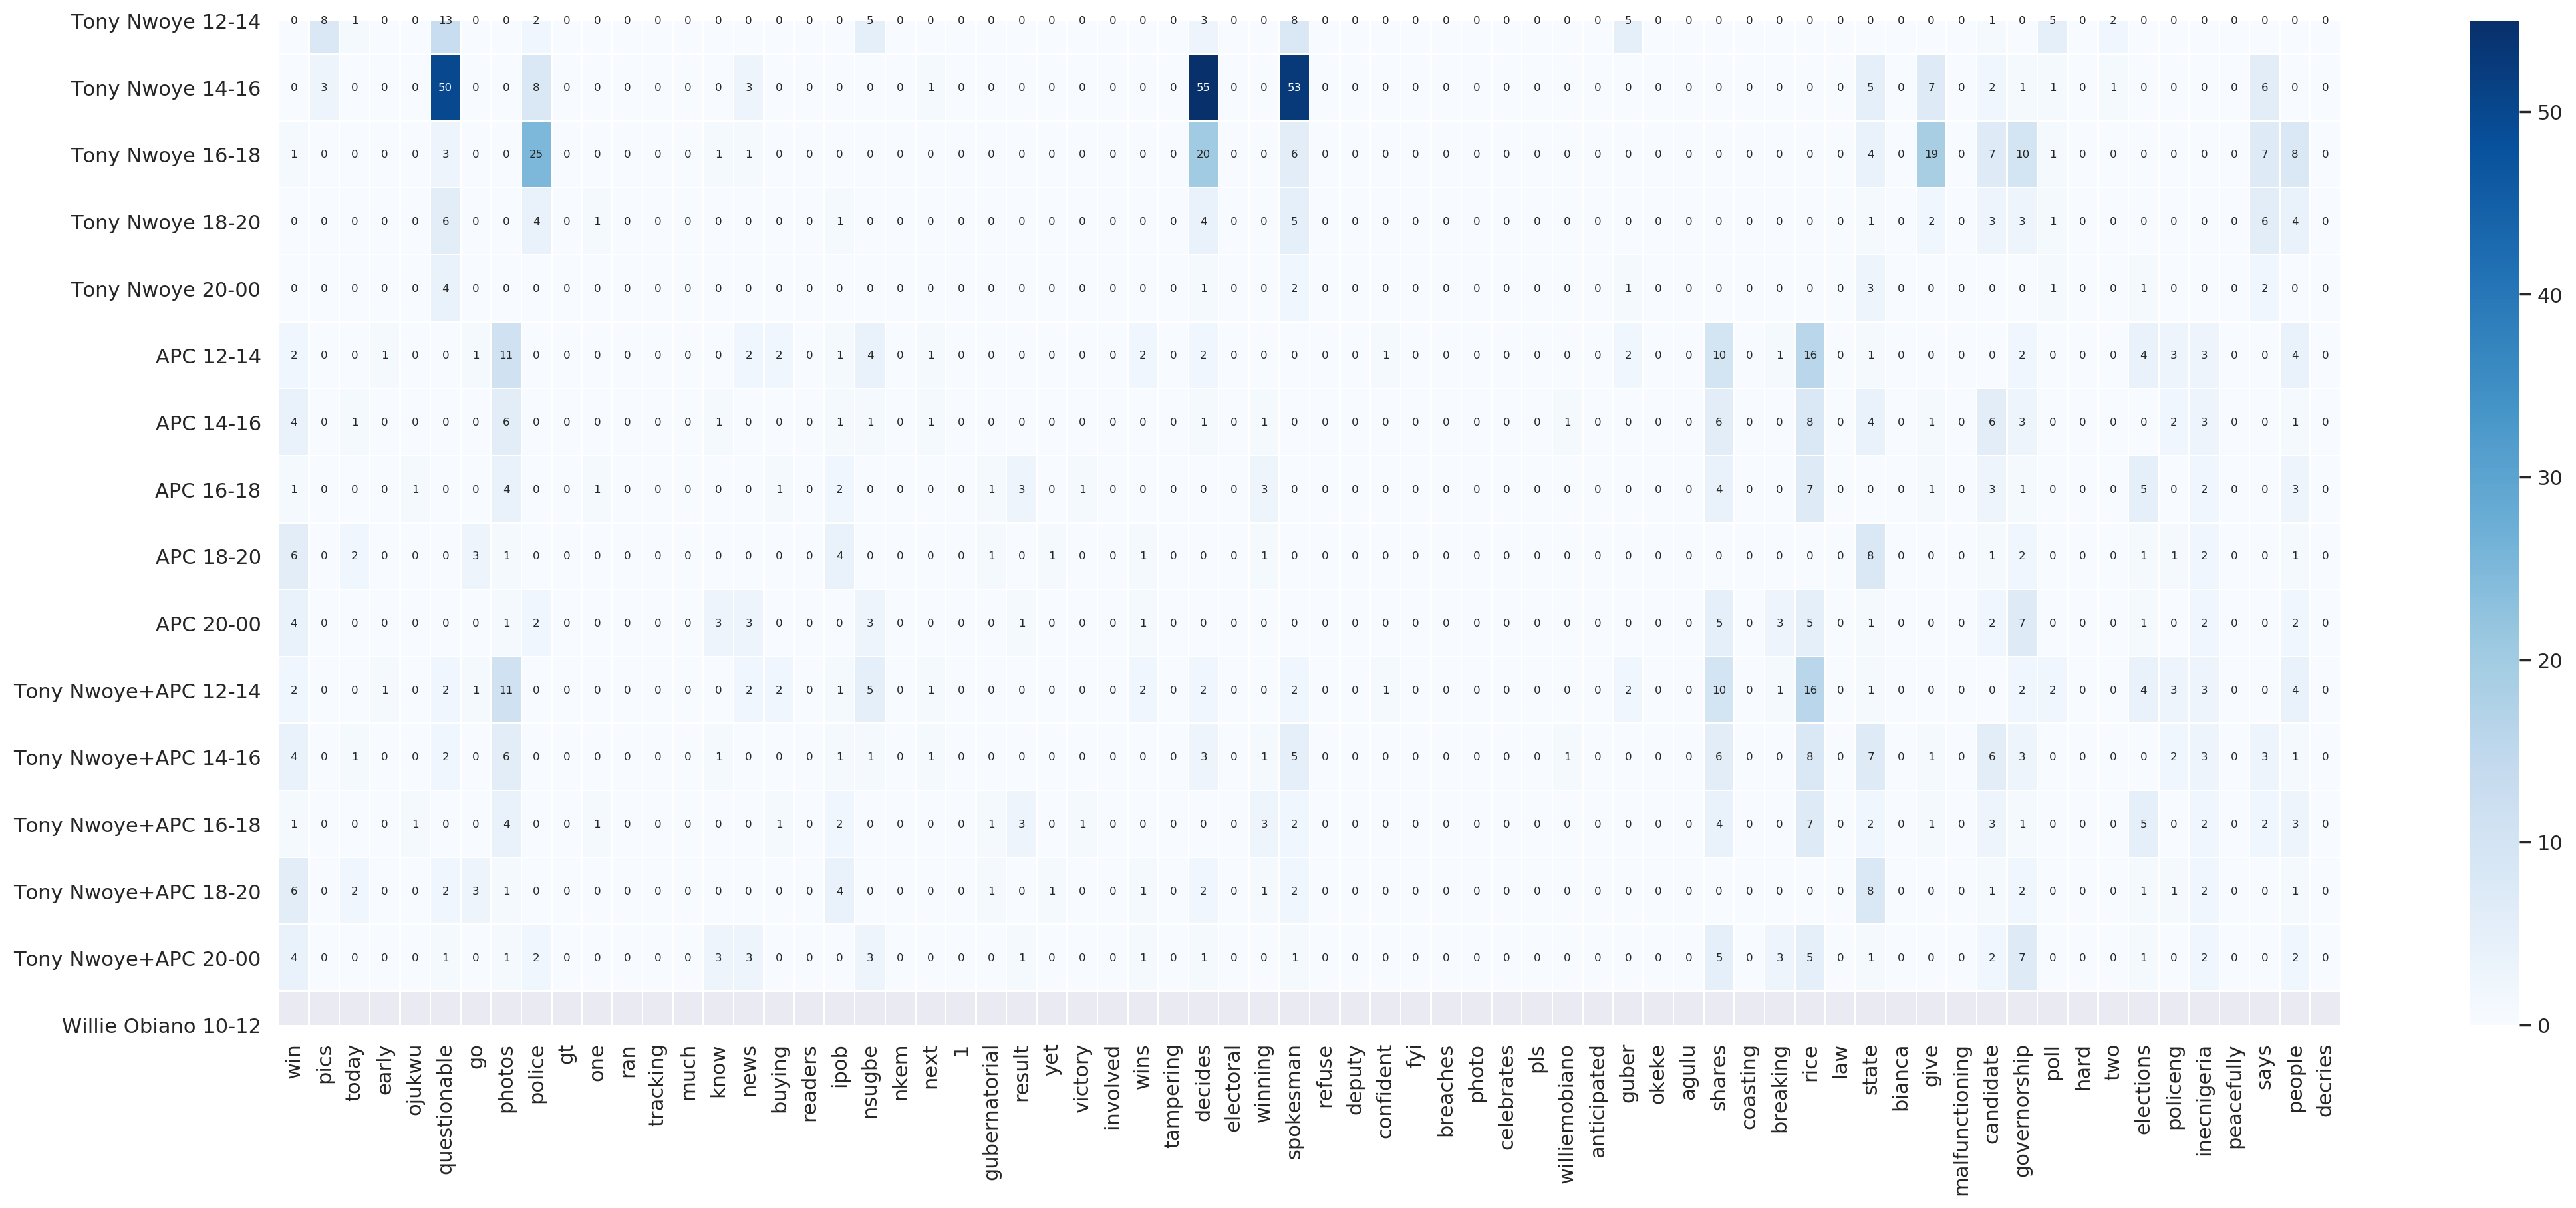

In [239]:
fig, ax = plt.subplots(figsize=(25,10))         # Sample figsize in inches
sns.heatmap(dff3[dff3wl[15:100]],cbar=True, cmap='Blues',linewidths=.5, annot=True,annot_kws={"size": 6},ax=ax)
sns.set(font_scale=1.4)

In [240]:
df=pd.DataFrame(np.random.random((7,7)),columns=['a','b','c','d','e','f','g'])
df

a         b         c         d         e         f         g
0  0.566482  0.522306  0.526517  0.066308  0.500779  0.643330  0.012138
1  0.685910  0.176784  0.710560  0.777129  0.247435  0.954518  0.559435
2  0.736748  0.477539  0.862775  0.062224  0.754279  0.659075  0.758592
3  0.030701  0.476068  0.612726  0.519275  0.492722  0.533465  0.556017
4  0.910220  0.536552  0.678496  0.190804  0.333866  0.699149  0.059307
5  0.352657  0.514068  0.870251  0.160995  0.246814  0.456856  0.613064
6  0.283689  0.174817  0.255737  0.188422  0.420782  0.529199  0.425170

# Topic Modelling with Latent Dirichlet Allocation (LDA)

In [242]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim import corpora, models

%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim

tokenizer = RegexpTokenizer(r'\w+')

In [243]:
newstops = ["https","co",'will','anambra','election','nwoye','tony','obiano','willie','obaze','oseloka',
                 'godwin','ezeemo','chidoka','osita','apga','apc','pdp','ppa','udp','chidoka_osita',
                  'votes','voter','voters','vote','governor','oselokahobaze','officialpdpnig','apcnigeria','anambranews','voters',
                   'polling','poling','unit','ward','apgahq','2','6','anambradecides2017','s','t']

In [244]:
# create English stop words list
en_stop = get_stop_words('en')+newstops

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [245]:
# dfs = [(time_series_data_wo_only,'Willie Obiano'),(time_series_data_apga_only,'APGA'),(time_series_data_apga_wo_only,'willie Obiano+APGA'),
#        (time_series_data_obaze_only,'Obaze Oseloka'),(time_series_data_pdp_only,'PDP'),(time_series_data_pdp_obaze_only,'Obaze Oseloka+PDP'),
#       (time_series_data_tony_only,'Tony Nwoye'),(time_series_data_apc_only,'APC'),(time_series_data_apc_tony_only,'Tony Nwoye+APC')]

In [246]:
df_lda = time_series_data_apc_only[['id','date','text']]

In [247]:
def strip_links(text):
    link_regex    = re.compile(r'((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [248]:
tweet_texts = df_lda['text'].tolist()

In [249]:
df_lda['text_strip'] = [emoji_pattern.sub(r'',strip_all_entities(strip_links(t))) for t in tweet_texts]

/home/iykeln/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [250]:
df_lda[['apga','pdp','apc','willie_obiano','oseloka_obaze',
                    'nwoye_tony','willie_obiano_apga','oseloka_obaze_pdp', 'nwoye_tony_apc',
                    'Sentiment_Polarity','Sentiment_Subjectivity', 'Sentiment_Polarity_Vals',
                    'Sentiment_Subjectivity_Vals']] = time_series_data_apc_only[['apga','pdp','apc','willie_obiano','oseloka_obaze',
                    'nwoye_tony','willie_obiano_apga','oseloka_obaze_pdp', 'nwoye_tony_apc',
                    'Sentiment_Polarity','Sentiment_Subjectivity', 'Sentiment_Polarity_Vals',
                    'Sentiment_Subjectivity_Vals']]

/home/iykeln/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [251]:
# create sample documents
# compile sample documents into a list

doc_set = df_lda['text_strip'].tolist()

In [252]:
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stopped_tokens)

# First LDA Experiment ...

In [253]:
# turn our tokenized documents into a id <-> term dictionary
LDA_dictionary = corpora.Dictionary(texts)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
#We remove rare words and common words based on their document frequency. 
#Below we remove words that appear in less than 20 documents or in more than 50% of the documents. 
#Consider trying to remove words only based on their frequency, or maybe combining that with this approach.
LDA_dictionary.filter_extremes(no_below=1, no_above=0.8)
    
# convert tokenized documents into a document-term matrix
corpus = [LDA_dictionary.doc2bow(text) for text in texts]

In [254]:
# generate LDA model
# num_topics = 20
# %time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
#                                   id2word=LDA_dictionary, \
#                                   passes=4, alpha=[0.01]*num_topics, \
#                                   eta=[0.01]*len(LDA_dictionary.keys()))

# Set training parameters.
num_topics = 10
chunksize = 200
passes = 20
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

%time lda_model = models.LdaModel(corpus=corpus,\
                                    id2word=LDA_dictionary,\
                                    chunksize=chunksize,\
                                    alpha='auto',\
                                    eta='auto',\
                                    iterations=iterations,\
                                    num_topics=num_topics,\
                                    passes=passes,\
                                    eval_every=eval_every)


CPU times: user 605 ms, sys: 109 µs, total: 606 ms
Wall time: 672 ms


In [255]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.019*"win" + 0.019*"go" + 0.013*"news" + 0.013*"breaking" + 0.013*"results" + 0.013*"never" + 0.013*"rig" + 0.013*"money" + 0.013*"know" + 0.007*"n"

1: 0.117*"rice" + 0.103*"photos" + 0.096*"shares" + 0.041*"elections" + 0.015*"cooked" + 0.014*"result" + 0.013*"sharing" + 0.009*"inec" + 0.009*"can" + 0.009*"coming"

2: 0.025*"cooked" + 0.023*"win" + 0.022*"rice" + 0.020*"just" + 0.020*"abito" + 0.020*"agents" + 0.020*"illo" + 0.020*"distributing" + 0.020*"let" + 0.013*"square"

3: 0.018*"governorship" + 0.018*"candidate" + 0.014*"buhari" + 0.014*"can" + 0.014*"results" + 0.014*"must" + 0.014*"state" + 0.014*"dog" + 0.014*"spotted" + 0.014*"banner"

4: 0.044*"boycott" + 0.037*"update" + 0.037*"devastating" + 0.037*"ogbaru" + 0.037*"picked" + 0.037*"chiarman" + 0.030*"biafra" + 0.015*"declared" + 0.015*"kags" + 0.008*"d"

5: 0.025*"buhari" + 0.017*"won" + 0.017*"people" + 0.017*"eneukwu" + 0.017*"visit" + 0.017*"guber" + 0.017*"chances" + 0.017*"boost" + 0.009*"treatment" + 0.009*"f

In [256]:
doc_set[0]

'Apc is allegedly sharing food and money  to voters to buy their votes they must really want anambra so bad'

In [257]:
lda_model[corpus[0]] # corpus[0] means the first document.

[(2, 0.9533849)]

In [258]:
willie_df = df_lda.loc[df_lda['apga'] == True]
new_text = willie_df['text_strip'].tolist()

In [259]:
for t in new_text:
    tokens = [p_stemmer.stem(token) for token in tokenizer.tokenize(t.lower()) if token not in en_stop]
    lda_model[LDA_dictionary.doc2bow(tokens)]
    t

[(0, 0.01766517),
 (1, 0.031701624),
 (2, 0.8223404),
 (3, 0.021665044),
 (4, 0.01853441),
 (5, 0.016111987),
 (6, 0.020356359),
 (7, 0.019658346),
 (8, 0.015746212),
 (9, 0.016220381)]

'They should collect the mon …'

[(1, 0.014378988), (5, 0.7359827), (7, 0.19097556)]

'Foolish people this was the reason why took power from …'

[(1, 0.014378779), (3, 0.9205623)]

'if like let them share more than 2 k Anambra is and is Anambra Case closed'

[(1, 0.017582526),
 (2, 0.23330471),
 (3, 0.23465768),
 (4, 0.45579875),
 (6, 0.011290154),
 (7, 0.010903018)]

'APC was destined to lose in Anambra all the way Too many cases of vote buying When will Nigerians change'

[(0, 0.012603432),
 (1, 0.022617912),
 (2, 0.013660819),
 (3, 0.015457191),
 (4, 0.8728094),
 (5, 0.011495294),
 (6, 0.014523494),
 (7, 0.014025487),
 (8, 0.011234327),
 (9, 0.01157263)]

'kags Boycott is not d same with Disruption IPOB declared …'

[(0, 0.08975896),
 (1, 0.16107996),
 (2, 0.09728945),
 (3, 0.11008282),
 (4, 0.09417568),
 (5, 0.08186704),
 (6, 0.10343324),
 (7, 0.09988654),
 (8, 0.080008484),
 (9, 0.08241781)]

'kags is as the he Declared was …'

[(0, 0.9006541),
 (1, 0.017580668),
 (2, 0.010618413),
 (3, 0.012014714),
 (4, 0.010278568),
 (6, 0.01128896),
 (7, 0.010901866)]

'is wining go to hell and die and owns Anambra State'

[(1, 0.017580591),
 (2, 0.010618326),
 (3, 0.012014615),
 (4, 0.010278484),
 (5, 0.8997934),
 (6, 0.011288868),
 (7, 0.010901776)]

'I have the feeling that both and won t mind if wins Anambra What they won t to …'

[(0, 0.012603315),
 (1, 0.0226177),
 (2, 0.013660692),
 (3, 0.015457045),
 (4, 0.013223478),
 (5, 0.011495186),
 (6, 0.014523358),
 (7, 0.87361246),
 (8, 0.011234222),
 (9, 0.011572522)]

'No way for in Anambra State or But no way'

[(0, 0.029520113),
 (1, 0.052977655),
 (2, 0.031996757),
 (3, 0.7073208),
 (4, 0.030972691),
 (5, 0.0269246),
 (6, 0.034017336),
 (7, 0.032850888),
 (8, 0.026313355),
 (9, 0.02710574)]

'Can someone authenticate this …'

[(0, 0.0176653),
 (1, 0.03170186),
 (2, 0.019147363),
 (3, 0.021665204),
 (4, 0.42010096),
 (5, 0.016112106),
 (6, 0.020356512),
 (7, 0.42128384),
 (8, 0.015746327),
 (9, 0.016220503)]

'It s better than in Anambra State'

[(0, 0.7306711), (1, 0.20245606)]

'Base on the available results hardly to win the Anambra Election against we still await the to announce'

In [260]:
# vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=LDA_dictionary)
# pyLDAvis.enable_notebook()
# pyLDAvis.display(vis)

# Second LDA Experiment ...

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from nltk.stem.snowball import SnowballStemmer
from nltk import PorterStemmer as pstemmer
import Stemmer
import lda as LDA
from sklearn import decomposition
from time import time

In [262]:
df_lda

id                            date  \
18    931857140326846464  Sat Nov 18 12:10:29 +0000 2017   
95    931859019152707584  Sat Nov 18 12:17:57 +0000 2017   
148   931860304870350848  Sat Nov 18 12:23:04 +0000 2017   
164   931860310113206273  Sat Nov 18 12:23:05 +0000 2017   
173   931860305998577665  Sat Nov 18 12:23:04 +0000 2017   
...                  ...                             ...   
7213  932010327138385921  Sat Nov 18 22:19:12 +0000 2017   
7317  932014952365338624  Sat Nov 18 22:37:35 +0000 2017   
7336  932015862378389505  Sat Nov 18 22:41:12 +0000 2017   
7359  932016881355116544  Sat Nov 18 22:45:15 +0000 2017   
7371  932017363154763776  Sat Nov 18 22:47:10 +0000 2017   

                                                   text  \
18    Apc is allegedly sharing food and money 💰 to v...   
95    APC = Anambra People's Cook . @nnekei @NGRWail...   
148   Anambra Election : APC Shares Rice To Voters (...   
164   BIAFRA : ANAMBRA ELECTION UPDATE : OGBARU APC ...   
173   BIAFRA : ANAMBRA ELECTION UPDATE : OGBARU APC ...   
...                                                 ...   
7213  Breaking News : Police DIG , INEC , APC Begins...   
7317  Breaking News : Police DIG , INEC APC Begins R...   
7336  Erection with No Lefelendum , meanwhile where ...   
7359             APC is a no no https://t.co/KU4ZvvM6Bz   
7371  Earlier thought APC won't have good outing but...   

                                             text_strip   apga    pdp   apc  \
18    Apc is allegedly sharing food and money  to vo...  False  False  True   
95                  APC Anambra People s Cook chidoka …  False   True  True   
148   Anambra Election APC Shares Rice To Voters Photos  False  False  True   
164   BIAFRA ANAMBRA ELECTION UPDATE OGBARU APC CHIA...  False  False  True   
173   BIAFRA ANAMBRA ELECTION UPDATE OGBARU APC CHIA...  False  False  True   
...                                                 ...    ...    ...   ...   
7213  Breaking News Police DIG INEC APC Begins Re Wr...  False  False  True   
7317  Breaking News Police DIG INEC APC Begins Re Wr...  False  False  True   
7336  Erection with No Lefelendum meanwhile where di...  False  False  True   
7359                                     APC is a no no  False  False  True   
7371     Earlier thought APC won t have good outing but  False  False  True   

      willie_obiano  oseloka_obaze  nwoye_tony  willie_obiano_apga  \
18            False          False       False               False   
95            False           True       False               False   
148           False          False       False               False   
164           False          False       False               False   
173           False          False       False               False   
...             ...            ...         ...                 ...   
7213          False          False       False               False   
7317          False          False       False               False   
7336          False          False       False               False   
7359          False          False       False               False   
7371          False          False       False               False   

      oseloka_obaze_pdp  nwoye_tony_apc  Sentiment_Polarity  \
18                False            True               -0.20   
95                 True            True                0.00   
148               False            True                0.00   
164               False            True               -1.00   
173               False            True               -1.00   
...                 ...             ...                 ...   
7213              False            True                0.75   
7317              False            True                0.00   
7336              False            True                0.00   
7359              False            True                0.00   
7371              False            True                0.35   

      Sentiment_Subjectivity  Sentiment_Polar

In [263]:
newstops = ["https","co",'will','anambra','election','nwoye','tony','obiano','willie','obaze','oseloka',
                 'godwin','ezeemo','chidoka','osita','apga','apc','pdp','ppa','udp','chidoka_osita',
                  'votes','voter','voters','vote','governor','oselokahobaze','officialpdpnig','apcnigeria','anambranews','voters',
                   'polling','poling','unit','ward','apgahq','2','6','anambradecides2017','s','t','inec','ipob',
           'biafra','biafran','poll']

punc = list("!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~£€«»–—’…")
stopwords = nltk.corpus.stopwords.words('english')+punc+['anambra']

#stemming technologies
stemmer = SnowballStemmer("english")
english_stemmer = Stemmer.Stemmer('en')
pstemmer = PorterStemmer()

In [264]:
tot_w = []
for thread in df_lda.text_strip:
    for w in thread.split():
        if w not in punc:
            tot_w.append(w.lower())
tot_count = len(tot_w)
w_count = Counter(tot_w)

In [265]:
len(tot_w)

2304

In [266]:
len(w_count)

671

In [267]:
#Feature Selection for LDA.
n_features = 320000
class StemmedTfidfVectorizer(TfidfVectorizer):
     def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: english_stemmer.stemWords(analyzer(doc))

In [268]:
#tvec = TfidfVectorizer(min_df=3, max_df=0.90, stop_words='english')
tvec = StemmedTfidfVectorizer(min_df=3, max_df=0.90, stop_words=stopwords, analyzer='word')

In [269]:
dtm_tfidf = tvec.fit_transform(df_lda.text_strip)

In [270]:
vocabs = np.array(tvec.get_feature_names())    #This is a vocabulary

In [271]:
dtm_tfidf.shape

(168, 82)

In [272]:
len(vocabs)

82

In [279]:
#fitting the models
n_topics = 10
n_top_words = 10

In [280]:
print("Fitting LDA models with tf-idf/tf features")

lda = decomposition.LatentDirichletAllocation(n_components=n_topics, 
#                                                 max_iter=20,
                                                verbose=1, 
                                                evaluate_every=1,
                                                learning_method='online',
                                                learning_offset=50.,
                                                random_state=1)

# lda = LDA.LDA(n_topics=n_topics,n_iter=100,random_state=1)

t0 = time()
lda_model = lda.fit(dtm_tfidf)

print("done in %0.3fs." % (time() - t0))

Fitting LDA models with tf-idf/tf features
iteration: 1 of max_iter: 10, perplexity: 5920.0609
iteration: 2 of max_iter: 10, perplexity: 4155.8744
iteration: 3 of max_iter: 10, perplexity: 3176.3254
iteration: 4 of max_iter: 10, perplexity: 2568.8134
iteration: 5 of max_iter: 10, perplexity: 2139.2734
iteration: 6 of max_iter: 10, perplexity: 1809.6787
iteration: 7 of max_iter: 10, perplexity: 1555.8198
iteration: 8 of max_iter: 10, perplexity: 1358.7697
iteration: 9 of max_iter: 10, perplexity: 1197.7918
iteration: 10 of max_iter: 10, perplexity: 1064.2838
done in 0.494s.


In [281]:
doctopic_lda = lda.transform(dtm_tfidf)

##### To make the analysis and visualization of models components - topic proportions, we will scale the document-component matrix such that the component values associated with each document sum to one.¶

In [282]:
# print words associated with topics
topic_words = []  
for topic in lda_model.components_:
    word_idx = np.argsort(topic)[::-1][0:n_top_words]
    topic_words.append([vocabs[i] for i in word_idx])

In [283]:
#Printing topic ids and list of associated words
for t in range(len(topic_words)):
    print("{} & {} & \\\\".format(t, ' '.join(topic_words[t][:13])))

0 & know let money state apc member facebook abuja boycott inec & \\
1 & apc elect win share voter rice photo vote governorship candid & \\
2 & peopl bribe voter cook apc happen obvious agent done money & \\
3 & abito agent illo distribut cook nsugb rice spot apc money & \\
4 & inec result break news apc rig write go must never & \\
5 & good result campaign spot banner apc dog poll unit state & \\
6 & state visit decid vote go inec apc buhari way true & \\
7 & plate take elect nsugb apc jollof boycott ndi governorship declar & \\
8 & candid governorship make true like peopl cook rice peac share & \\
9 & second apc way buhari illo jollof like candid write spot & \\


In [284]:
sum(doctopic_lda[9])

1.0000000000000002

#### Analysis and Visualization

In [285]:
#scale the document-component matrix such that the component values associated with each document sum to one
doctopic_lda = doctopic_lda / np.sum(doctopic_lda, axis=1, keepdims=True)

In [286]:
#display scores of each topic per post. rows are posts and cols are topics
doctopic_orig = doctopic_lda.copy() #copy the array to keep original

In [287]:
doctopic_orig[0,:]

array([0.02716044, 0.75555742, 0.02715974, 0.02715848, 0.02717565,
       0.02715708, 0.02715732, 0.02715818, 0.02715796, 0.02715771])

In [288]:
doctopic_orig.shape #gives total number of posts and number of topics

(168, 10)

In [289]:
doc_names = [pid for pid in df_lda.index] #list of all the posts.

In [290]:
len(doc_names) #total number of posts

168

In [291]:
df_tweets_topics = pd.DataFrame(doctopic_lda, index=doc_names)

In [292]:
df_tweets_topics

0         1         2         3         4         5         6  \
18    0.027160  0.755557  0.027160  0.027158  0.027176  0.027157  0.027157   
95    0.038422  0.038442  0.654180  0.038425  0.038424  0.038421  0.038421   
148   0.029609  0.733509  0.029610  0.029610  0.029610  0.029610  0.029609   
164   0.025899  0.025901  0.025899  0.025899  0.025899  0.025899  0.025899   
173   0.025899  0.025901  0.025899  0.025899  0.025899  0.025899  0.025899   
...        ...       ...       ...       ...       ...       ...       ...   
7213  0.031884  0.031886  0.031884  0.031884  0.713040  0.031885  0.031884   
7317  0.029982  0.029985  0.029982  0.029982  0.730158  0.029983  0.029982   
7336  0.038305  0.655255  0.038304  0.038304  0.038310  0.038304  0.038307   
7359  0.050003  0.549976  0.050003  0.050001  0.050006  0.050002  0.050002   
7371  0.045043  0.045081  0.045043  0.045040  0.045049  0.594569  0.045043   

             7         8         9  
18    0.027158  0.027158  0.027158  
95    0.038424  0.038421  0.038422  
148   0.029614  0.029610  0.029609  
164   0.766907  0.025899  0.025899  
173   0.766907  0.025899  0.025899  
...        ...       ...       ...  
7213  0.031884  0.031884  0.031884  
7317  0.029982  0.029982  0.029982  
7336  0.038304  0.038304  0.038304  
7359  0.050006  0.050000  0.050002  
7371  0.045049  0.045040  0.045043  

[168 rows x 10 columns]